# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

Site #    WGS84 N   WGS 84 E Origin  Origin_ID Dominant_specias  Species_ID  \
0      1  51.435741  30.107979      n          0            Birch           2   
1      2  51.434093  30.108523      a          1             Pine           0   
2      3  51.434163  30.109196      a          1             Pine           0   
3      4  51.434217  30.110484      a          1             Pine           0   
4      5  51.434056  30.111980      a          1             Pine           0   

   Cs_wood_Bq/kg  ln_Cs_wood  Sr_wood_Bq/kg  ...  idm_g_Q25  idm_g_Q50  \
0            920       6.824          10300  ...   0.042167   0.050549   
1           3600       8.189          15100  ...   0.040919   0.048889   
2           4360       8.380          14600  ...   0.042397   0.050463   
3           3420       8.137          12700  ...   0.043719   0.052974   
4           2200       7.696          12100  ...   0.040659   0.049303   

   idm_g_Q75  idm_b_MIN  idm_b_MAX idm_b_MEAN  idm_b_STD  idm_b_Q25  \
0   0.062270   0.017730   0.408966   0.059749   0.030217   0.043539   
1   0.060698   0.020078   0.258602   0.057223   0.025515   0.043035   
2   0.060603   0.020761   0.156265   0.056571   0.016629   0.045142   
3   0.066027   0.017239   0.327465   0.060880   0.023964   0.046111   
4   0.061803   0.014276   0.274420   0.057902   0.024283   0.043045   

   idm_b_Q50  idm_b_Q75  
0   0.052312   0.064544  
1   0.050941   0.062608  
2   0.053495   0.064635  
3   0.055601   0.069182  
4   0.051566   0.065078  

[5 rows x 163 columns]

# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'r_MIN', 'contr_b_MAX', 'contr_b_STD'])

# Show the first five columns
select.head()

ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  ln_Tag_Sr  \
0       6.824       9.240           1912            784      -0.73       2.58   
1       8.189       9.622           2005            818       0.59       2.92   
2       8.380       9.589           2001            818       0.78       2.88   
3       8.137       9.449           2040            833       0.52       2.72   
4       7.696       9.401           1758            717       0.22       2.83   

   AEDR_mean  r_MIN  contr_b_MAX  contr_b_STD  
0       2.33     13  2713.600586   332.963753  
1       2.47     24  1793.493042   293.868420  
2       2.44     18  1761.097900   272.526176  
3       2.55     15  2518.435303   299.595643  
4       2.14      8  2525.819336   327.599176

# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   r_MIN          103 non-null    int64  
 8   contr_b_MAX    103 non-null    float64
 9   contr_b_STD    103 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 8.2 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_12248/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m   ln_Tag_Cs  \
count   103.00000  103.000000     103.000000     103.000000  103.000000   
mean      7.04933    8.656485    3014.359223    1136.436893   -0.251845   
std       1.64946    1.472424    4988.505540    2019.773384    1.104536   
min       3.52600    6.075000     423.000000      98.000000   -3.030000   
25%       6.31900    7.664000     635.500000     199.500000   -0.725000   
50%       6.95700    8.472000    1145.000000     362.000000   -0.020000   
75%       7.91350    9.421000    2423.500000     966.000000    0.520000   
max      11.36700   13.864000   25173.000000   10477.000000    1.650000   

        ln_Tag_Sr   AEDR_mean       r_MIN  contr_b_MAX  contr_b_STD  
count  103.000000  103.000000  103.000000   103.000000   103.000000  
mean     2.464854    3.570291   11.378641  2712.352866   349.854034  
std      0.904757    6.089170    9.139568   864.116297    93.673105  
min      0.390000    0.480000    2.000000   832.155518   109.232976  
25%      1.805000    0.710000    5.000000  2123.614868   292.544440  
50%      2.600000    1.290000    8.000000  2601.248047   341.904211  
75%      3.160000    2.960000   15.000000  3045.944336   427.359073  
max      4.660000   36.590000   56.000000  6252.923340   588.661708

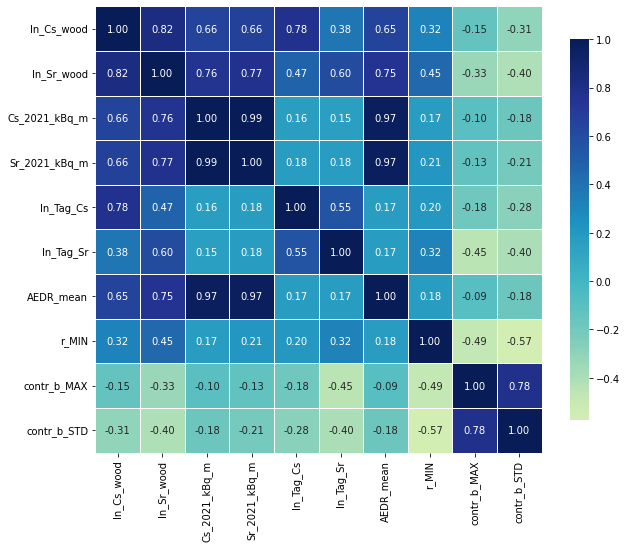

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Sr_2021_kBq_m'])
y = pd.DataFrame(select, columns= ['ln_Sr_wood'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

Sr_2021_kBq_m
0            784
1            818
2            818
3            833
4            717

In [11]:
# Columns in "y" data collections
y.head()

ln_Sr_wood
0       9.240
1       9.622
2       9.589
3       9.449
4       9.401

# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.6038154642747919, 0.3980379260198702, 0.46348756701242577]
    Mean: 0.488
    Std: 0.086

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.0210975 1.0353713 0.9500468]
    Mean: 1.002
    Std: 0.037

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7815956770760673, 0.9025491156858555, 0.6930539112091063]
    Mean: 0.792
    Std: 0.086

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [ ]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


In [21]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.62661786, 0.44367533, 0.43662949, ..., 0.32803645, 0.53257494,
       0.3016736 ]), 'std_fit_time': array([0.11489514, 0.01793304, 0.0146984 , ..., 0.00418012, 0.07270512,
       0.00377819]), 'mean_score_time': array([0.00793076, 0.00623107, 0.00609131, ..., 0.00682335, 0.00722179,
       0.00688133]), 'std_score_time': array([4.24676668e-03, 5.18115094e-04, 4.92153700e-05, ...,
       3.83942458e-05, 4.35020309e-04, 8.61158667e-05]), 'param_colsample_bytree': masked_array(data=[0.4915787611156235, 0.10394014047289618,
                   0.43468623290003156, ..., 0.11371512268771333,
                   0.41724436270172655, 0.47725946122916046],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.38578149884241764, 0.3083698834106356,
                   0.42377416205074886, ..., 0.2159222984003749,
                   0.3739619769748155, 0.13959748110693265],
 

In [22]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.567640749675812
Gamma: 0.07387036752295428
Learning_rate: 0.11447010678160813
Max_depth: 2
N_estimators: 90
Subsample: 0.7983544034380838


# Estimation of a basic XGBoost model using Loops

In [23]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [24]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:7.29799	validation_1-rmse:7.77444
[1]	validation_0-rmse:6.50133	validation_1-rmse:6.95766
[2]	validation_0-rmse:5.79010	validation_1-rmse:6.23073
[3]	validation_0-rmse:5.17057	validation_1-rmse:5.61605


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:4.61605	validation_1-rmse:5.04727
[5]	validation_0-rmse:4.13151	validation_1-rmse:4.56985
[6]	validation_0-rmse:3.69794	validation_1-rmse:4.12348
[7]	validation_0-rmse:3.31756	validation_1-rmse:3.74794
[8]	validation_0-rmse:2.97500	validation_1-rmse:3.40409
[9]	validation_0-rmse:2.67205	validation_1-rmse:3.10323
[10]	validation_0-rmse:2.40409	validation_1-rmse:2.83914
[11]	validation_0-rmse:2.17539	validation_1-rmse:2.60440
[12]	validation_0-rmse:1.97115	validation_1-rmse:2.40143
[13]	validation_0-rmse:1.78845	validation_1-rmse:2.21923
[14]	validation_0-rmse:1.62951	validation_1-rmse:2.05995
[15]	validation_0-rmse:1.48408	validation_1-rmse:1.90714
[16]	validation_0-rmse:1.37051	validation_1-rmse:1.78862
[17]	validation_0-rmse:1.26612	validation_1-rmse:1.67562
[18]	validation_0-rmse:1.18236	validation_1-rmse:1.59445
[19]	validation_0-rmse:1.10132	validation_1-rmse:1.49963
[20]	validation_0-rmse:1.02842	validation_1-rmse:1.41984
[21]	validation_0-rmse:0.96874	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.51771	validation_1-rmse:1.38945
[16]	validation_0-rmse:1.40775	validation_1-rmse:1.27528
[17]	validation_0-rmse:1.29412	validation_1-rmse:1.16824
[18]	validation_0-rmse:1.20447	validation_1-rmse:1.07764
[19]	validation_0-rmse:1.12583	validation_1-rmse:1.00916
[20]	validation_0-rmse:1.06021	validation_1-rmse:0.94542
[21]	validation_0-rmse:1.00202	validation_1-rmse:0.89569
[22]	validation_0-rmse:0.95325	validation_1-rmse:0.85018
[23]	validation_0-rmse:0.90972	validation_1-rmse:0.81966
[24]	validation_0-rmse:0.87339	validation_1-rmse:0.78659
[25]	validation_0-rmse:0.84381	validation_1-rmse:0.76113
[26]	validation_0-rmse:0.81956	validation_1-rmse:0.74338
[27]	validation_0-rmse:0.79812	validation_1-rmse:0.72730
[28]	validation_0-rmse:0.77822	validation_1-rmse:0.71083
[29]	validation_0-rmse:0.76529	validation_1-rmse:0.69852
[30]	validation_0-rmse:0.75132	validation_1-rmse:0.68790
[31]	validation_0-rmse:0.73157	validation_1-rmse:0.67686
[32]	validation_0-rmse:0.72079	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:2.70393	validation_1-rmse:2.82827
[10]	validation_0-rmse:2.43615	validation_1-rmse:2.55477
[11]	validation_0-rmse:2.20461	validation_1-rmse:2.31000
[12]	validation_0-rmse:1.99270	validation_1-rmse:2.07264
[13]	validation_0-rmse:1.80833	validation_1-rmse:1.85492
[14]	validation_0-rmse:1.65959	validation_1-rmse:1.67918
[15]	validation_0-rmse:1.51900	validation_1-rmse:1.51665
[16]	validation_0-rmse:1.41040	validation_1-rmse:1.39431
[17]	validation_0-rmse:1.29798	validation_1-rmse:1.26405
[18]	validation_0-rmse:1.22540	validation_1-rmse:1.18194
[19]	validation_0-rmse:1.14986	validation_1-rmse:1.12034
[20]	validation_0-rmse:1.07846	validation_1-rmse:1.03668
[21]	validation_0-rmse:1.01752	validation_1-rmse:0.98525
[22]	validation_0-rmse:0.97911	validation_1-rmse:0.93879
[23]	validation_0-rmse:0.93633	validation_1-rmse:0.89414
[24]	validation_0-rmse:0.89753	validation_1-rmse:0.84845
[25]	validation_0-rmse:0.87001	validation_1-rmse:0.83649
[26]	validation_0-rmse:0.84236	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.32159	validation_1-rmse:1.23101
[18]	validation_0-rmse:1.23254	validation_1-rmse:1.15073
[19]	validation_0-rmse:1.15697	validation_1-rmse:1.07831
[20]	validation_0-rmse:1.08930	validation_1-rmse:1.02638
[21]	validation_0-rmse:1.02430	validation_1-rmse:0.98024
[22]	validation_0-rmse:0.97170	validation_1-rmse:0.94350
[23]	validation_0-rmse:0.93315	validation_1-rmse:0.92250
[24]	validation_0-rmse:0.89743	validation_1-rmse:0.90486
[25]	validation_0-rmse:0.86808	validation_1-rmse:0.88278
[26]	validation_0-rmse:0.83918	validation_1-rmse:0.86899
[27]	validation_0-rmse:0.81565	validation_1-rmse:0.85930
[28]	validation_0-rmse:0.79600	validation_1-rmse:0.84088
[29]	validation_0-rmse:0.77720	validation_1-rmse:0.83611
[30]	validation_0-rmse:0.76063	validation_1-rmse:0.83264
[31]	validation_0-rmse:0.74564	validation_1-rmse:0.82256
[32]	validation_0-rmse:0.73400	validation_1-rmse:0.81075
[33]	validation_0-rmse:0.72395	validation_1-rmse:0.80763
[34]	validation_0-rmse:0.71319	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.39849	validation_1-rmse:1.15339
[17]	validation_0-rmse:1.29373	validation_1-rmse:1.08189
[18]	validation_0-rmse:1.19920	validation_1-rmse:1.00868
[19]	validation_0-rmse:1.12143	validation_1-rmse:0.96246
[20]	validation_0-rmse:1.05354	validation_1-rmse:0.92281
[21]	validation_0-rmse:0.99654	validation_1-rmse:0.88275
[22]	validation_0-rmse:0.94481	validation_1-rmse:0.85849
[23]	validation_0-rmse:0.90120	validation_1-rmse:0.83869
[24]	validation_0-rmse:0.85873	validation_1-rmse:0.82388
[25]	validation_0-rmse:0.82274	validation_1-rmse:0.81310
[26]	validation_0-rmse:0.79605	validation_1-rmse:0.80581
[27]	validation_0-rmse:0.77275	validation_1-rmse:0.80331
[28]	validation_0-rmse:0.75590	validation_1-rmse:0.79516
[29]	validation_0-rmse:0.73406	validation_1-rmse:0.78540
[30]	validation_0-rmse:0.71295	validation_1-rmse:0.78708
[31]	validation_0-rmse:0.70215	validation_1-rmse:0.78784
[32]	validation_0-rmse:0.69330	validation_1-rmse:0.78405
[33]	validation_0-rmse:0.68186	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.13154	validation_1-rmse:1.11849
[20]	validation_0-rmse:1.06519	validation_1-rmse:1.05905
[21]	validation_0-rmse:1.00276	validation_1-rmse:0.99373
[22]	validation_0-rmse:0.95277	validation_1-rmse:0.95040
[23]	validation_0-rmse:0.90951	validation_1-rmse:0.91602
[24]	validation_0-rmse:0.87514	validation_1-rmse:0.88698
[25]	validation_0-rmse:0.84386	validation_1-rmse:0.85927
[26]	validation_0-rmse:0.81349	validation_1-rmse:0.82733
[27]	validation_0-rmse:0.79130	validation_1-rmse:0.81275
[28]	validation_0-rmse:0.77250	validation_1-rmse:0.79912
[29]	validation_0-rmse:0.75380	validation_1-rmse:0.78103
[30]	validation_0-rmse:0.73979	validation_1-rmse:0.76898
[31]	validation_0-rmse:0.72371	validation_1-rmse:0.75667
[32]	validation_0-rmse:0.71446	validation_1-rmse:0.74950
[33]	validation_0-rmse:0.69708	validation_1-rmse:0.73447
[34]	validation_0-rmse:0.69065	validation_1-rmse:0.73395
[35]	validation_0-rmse:0.68363	validation_1-rmse:0.73314
[36]	validation_0-rmse:0.67678	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.15597	validation_1-rmse:1.12888
[20]	validation_0-rmse:1.08638	validation_1-rmse:1.06432
[21]	validation_0-rmse:1.02656	validation_1-rmse:1.00969
[22]	validation_0-rmse:0.97339	validation_1-rmse:0.96124
[23]	validation_0-rmse:0.92664	validation_1-rmse:0.91916
[24]	validation_0-rmse:0.89005	validation_1-rmse:0.88463
[25]	validation_0-rmse:0.84947	validation_1-rmse:0.85920
[26]	validation_0-rmse:0.82597	validation_1-rmse:0.84435
[27]	validation_0-rmse:0.80388	validation_1-rmse:0.81626
[28]	validation_0-rmse:0.78447	validation_1-rmse:0.80077
[29]	validation_0-rmse:0.76913	validation_1-rmse:0.78796
[30]	validation_0-rmse:0.75722	validation_1-rmse:0.78334
[31]	validation_0-rmse:0.73995	validation_1-rmse:0.77623
[32]	validation_0-rmse:0.73021	validation_1-rmse:0.76919
[33]	validation_0-rmse:0.71887	validation_1-rmse:0.76421
[34]	validation_0-rmse:0.70596	validation_1-rmse:0.75746
[35]	validation_0-rmse:0.69448	validation_1-rmse:0.75152
[36]	validation_0-rmse:0.68870	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.95213	validation_1-rmse:1.29266
[22]	validation_0-rmse:0.90590	validation_1-rmse:1.25471
[23]	validation_0-rmse:0.86125	validation_1-rmse:1.21379
[24]	validation_0-rmse:0.82618	validation_1-rmse:1.17224
[25]	validation_0-rmse:0.78989	validation_1-rmse:1.13235
[26]	validation_0-rmse:0.76490	validation_1-rmse:1.10776
[27]	validation_0-rmse:0.73773	validation_1-rmse:1.07558
[28]	validation_0-rmse:0.72347	validation_1-rmse:1.05299
[29]	validation_0-rmse:0.70440	validation_1-rmse:1.03849
[30]	validation_0-rmse:0.69176	validation_1-rmse:1.02287
[31]	validation_0-rmse:0.68082	validation_1-rmse:1.01127
[32]	validation_0-rmse:0.66563	validation_1-rmse:0.99279
[33]	validation_0-rmse:0.65700	validation_1-rmse:0.97757
[34]	validation_0-rmse:0.64843	validation_1-rmse:0.97348
[35]	validation_0-rmse:0.64289	validation_1-rmse:0.96176
[36]	validation_0-rmse:0.63339	validation_1-rmse:0.95375
[37]	validation_0-rmse:0.63041	validation_1-rmse:0.94596
[38]	validation_0-rmse:0.62490	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.11112	validation_1-rmse:1.13780
[20]	validation_0-rmse:1.04636	validation_1-rmse:1.08727
[21]	validation_0-rmse:0.99076	validation_1-rmse:1.03866
[22]	validation_0-rmse:0.93236	validation_1-rmse:0.98961
[23]	validation_0-rmse:0.89595	validation_1-rmse:0.96407
[24]	validation_0-rmse:0.86364	validation_1-rmse:0.94138
[25]	validation_0-rmse:0.83419	validation_1-rmse:0.92092
[26]	validation_0-rmse:0.80627	validation_1-rmse:0.90266
[27]	validation_0-rmse:0.77767	validation_1-rmse:0.87773
[28]	validation_0-rmse:0.76147	validation_1-rmse:0.86832
[29]	validation_0-rmse:0.74652	validation_1-rmse:0.86287
[30]	validation_0-rmse:0.73447	validation_1-rmse:0.85905
[31]	validation_0-rmse:0.72308	validation_1-rmse:0.85361
[32]	validation_0-rmse:0.70920	validation_1-rmse:0.83927
[33]	validation_0-rmse:0.69056	validation_1-rmse:0.82943
[34]	validation_0-rmse:0.67920	validation_1-rmse:0.82710
[35]	validation_0-rmse:0.67363	validation_1-rmse:0.82573
[36]	validation_0-rmse:0.65842	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.05103	validation_1-rmse:1.23408
[21]	validation_0-rmse:0.98963	validation_1-rmse:1.17638
[22]	validation_0-rmse:0.93443	validation_1-rmse:1.12775
[23]	validation_0-rmse:0.89677	validation_1-rmse:1.09079
[24]	validation_0-rmse:0.85979	validation_1-rmse:1.05000
[25]	validation_0-rmse:0.83125	validation_1-rmse:1.01965
[26]	validation_0-rmse:0.80623	validation_1-rmse:0.99100
[27]	validation_0-rmse:0.78118	validation_1-rmse:0.95687
[28]	validation_0-rmse:0.76151	validation_1-rmse:0.94649
[29]	validation_0-rmse:0.74562	validation_1-rmse:0.93966
[30]	validation_0-rmse:0.72487	validation_1-rmse:0.91483
[31]	validation_0-rmse:0.71345	validation_1-rmse:0.89938
[32]	validation_0-rmse:0.70292	validation_1-rmse:0.88976
[33]	validation_0-rmse:0.69045	validation_1-rmse:0.88052
[34]	validation_0-rmse:0.67708	validation_1-rmse:0.86955
[35]	validation_0-rmse:0.66804	validation_1-rmse:0.85654
[36]	validation_0-rmse:0.66272	validation_1-rmse:0.85194
[37]	validation_0-rmse:0.65598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.28776	validation_1-rmse:1.57256
[18]	validation_0-rmse:1.19720	validation_1-rmse:1.46998
[19]	validation_0-rmse:1.11968	validation_1-rmse:1.38421
[20]	validation_0-rmse:1.04906	validation_1-rmse:1.30762
[21]	validation_0-rmse:0.98710	validation_1-rmse:1.24887
[22]	validation_0-rmse:0.93515	validation_1-rmse:1.18488
[23]	validation_0-rmse:0.89262	validation_1-rmse:1.15371
[24]	validation_0-rmse:0.85646	validation_1-rmse:1.10722
[25]	validation_0-rmse:0.82621	validation_1-rmse:1.07107
[26]	validation_0-rmse:0.79236	validation_1-rmse:1.04223
[27]	validation_0-rmse:0.76999	validation_1-rmse:1.03110
[28]	validation_0-rmse:0.75798	validation_1-rmse:1.01802
[29]	validation_0-rmse:0.73831	validation_1-rmse:1.01388
[30]	validation_0-rmse:0.72591	validation_1-rmse:0.99639
[31]	validation_0-rmse:0.71642	validation_1-rmse:0.97965
[32]	validation_0-rmse:0.70870	validation_1-rmse:0.96607
[33]	validation_0-rmse:0.69992	validation_1-rmse:0.95499
[34]	validation_0-rmse:0.69238	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.00371	validation_1-rmse:1.45629
[21]	validation_0-rmse:0.95037	validation_1-rmse:1.39402
[22]	validation_0-rmse:0.90240	validation_1-rmse:1.35118
[23]	validation_0-rmse:0.85949	validation_1-rmse:1.30029
[24]	validation_0-rmse:0.82108	validation_1-rmse:1.25226
[25]	validation_0-rmse:0.79288	validation_1-rmse:1.22002
[26]	validation_0-rmse:0.76592	validation_1-rmse:1.19157
[27]	validation_0-rmse:0.74185	validation_1-rmse:1.16127
[28]	validation_0-rmse:0.72541	validation_1-rmse:1.13677
[29]	validation_0-rmse:0.70310	validation_1-rmse:1.11581
[30]	validation_0-rmse:0.69032	validation_1-rmse:1.09750
[31]	validation_0-rmse:0.67973	validation_1-rmse:1.07790
[32]	validation_0-rmse:0.67131	validation_1-rmse:1.06445
[33]	validation_0-rmse:0.66250	validation_1-rmse:1.05708
[34]	validation_0-rmse:0.65249	validation_1-rmse:1.04478
[35]	validation_0-rmse:0.64793	validation_1-rmse:1.03131
[36]	validation_0-rmse:0.64246	validation_1-rmse:1.01875
[37]	validation_0-rmse:0.63704	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.28040	validation_1-rmse:1.22535
[18]	validation_0-rmse:1.18686	validation_1-rmse:1.14506
[19]	validation_0-rmse:1.10454	validation_1-rmse:1.08062
[20]	validation_0-rmse:1.03621	validation_1-rmse:1.02455
[21]	validation_0-rmse:0.98159	validation_1-rmse:0.98142
[22]	validation_0-rmse:0.93327	validation_1-rmse:0.93837
[23]	validation_0-rmse:0.88681	validation_1-rmse:0.90256
[24]	validation_0-rmse:0.85281	validation_1-rmse:0.88582
[25]	validation_0-rmse:0.82014	validation_1-rmse:0.86228
[26]	validation_0-rmse:0.79350	validation_1-rmse:0.84429
[27]	validation_0-rmse:0.77332	validation_1-rmse:0.83222
[28]	validation_0-rmse:0.75570	validation_1-rmse:0.82213
[29]	validation_0-rmse:0.74226	validation_1-rmse:0.81636
[30]	validation_0-rmse:0.73065	validation_1-rmse:0.80838
[31]	validation_0-rmse:0.71575	validation_1-rmse:0.79623
[32]	validation_0-rmse:0.70605	validation_1-rmse:0.79110
[33]	validation_0-rmse:0.69980	validation_1-rmse:0.78560
[34]	validation_0-rmse:0.68598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.29516	validation_1-rmse:1.08904
[18]	validation_0-rmse:1.19947	validation_1-rmse:1.01247
[19]	validation_0-rmse:1.11950	validation_1-rmse:0.94112
[20]	validation_0-rmse:1.05488	validation_1-rmse:0.89207
[21]	validation_0-rmse:0.99549	validation_1-rmse:0.85068
[22]	validation_0-rmse:0.94677	validation_1-rmse:0.81826
[23]	validation_0-rmse:0.90269	validation_1-rmse:0.78804
[24]	validation_0-rmse:0.86403	validation_1-rmse:0.76663
[25]	validation_0-rmse:0.83426	validation_1-rmse:0.75423
[26]	validation_0-rmse:0.80238	validation_1-rmse:0.74286
[27]	validation_0-rmse:0.78268	validation_1-rmse:0.73192
[28]	validation_0-rmse:0.76154	validation_1-rmse:0.72664
[29]	validation_0-rmse:0.74601	validation_1-rmse:0.72129
[30]	validation_0-rmse:0.72973	validation_1-rmse:0.71972
[31]	validation_0-rmse:0.71655	validation_1-rmse:0.72172
[32]	validation_0-rmse:0.70716	validation_1-rmse:0.72279
[33]	validation_0-rmse:0.69003	validation_1-rmse:0.72309
[34]	validation_0-rmse:0.68309	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.04437	validation_1-rmse:1.15769
[21]	validation_0-rmse:0.99193	validation_1-rmse:1.11112
[22]	validation_0-rmse:0.93800	validation_1-rmse:1.06165
[23]	validation_0-rmse:0.89167	validation_1-rmse:1.02290
[24]	validation_0-rmse:0.85510	validation_1-rmse:0.98879
[25]	validation_0-rmse:0.82451	validation_1-rmse:0.96095
[26]	validation_0-rmse:0.79840	validation_1-rmse:0.93654
[27]	validation_0-rmse:0.77575	validation_1-rmse:0.91437
[28]	validation_0-rmse:0.75542	validation_1-rmse:0.89427
[29]	validation_0-rmse:0.74005	validation_1-rmse:0.87847
[30]	validation_0-rmse:0.72757	validation_1-rmse:0.86578
[31]	validation_0-rmse:0.71677	validation_1-rmse:0.85815
[32]	validation_0-rmse:0.70317	validation_1-rmse:0.84901
[33]	validation_0-rmse:0.68947	validation_1-rmse:0.84332
[34]	validation_0-rmse:0.68045	validation_1-rmse:0.84014
[35]	validation_0-rmse:0.67371	validation_1-rmse:0.83249
[36]	validation_0-rmse:0.66449	validation_1-rmse:0.81218
[37]	validation_0-rmse:0.65715	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12182	validation_1-rmse:1.09172
[20]	validation_0-rmse:1.05220	validation_1-rmse:1.03525
[21]	validation_0-rmse:0.99389	validation_1-rmse:0.99219
[22]	validation_0-rmse:0.94387	validation_1-rmse:0.95034
[23]	validation_0-rmse:0.90133	validation_1-rmse:0.92145
[24]	validation_0-rmse:0.86314	validation_1-rmse:0.89257
[25]	validation_0-rmse:0.83043	validation_1-rmse:0.86867
[26]	validation_0-rmse:0.80361	validation_1-rmse:0.85075
[27]	validation_0-rmse:0.78160	validation_1-rmse:0.83604
[28]	validation_0-rmse:0.76698	validation_1-rmse:0.82642
[29]	validation_0-rmse:0.75128	validation_1-rmse:0.82042
[30]	validation_0-rmse:0.73433	validation_1-rmse:0.82046
[31]	validation_0-rmse:0.71960	validation_1-rmse:0.81688
[32]	validation_0-rmse:0.70955	validation_1-rmse:0.81128
[33]	validation_0-rmse:0.70079	validation_1-rmse:0.80506
[34]	validation_0-rmse:0.69213	validation_1-rmse:0.80016
[35]	validation_0-rmse:0.68627	validation_1-rmse:0.80075
[36]	validation_0-rmse:0.67987	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.28839	validation_1-rmse:1.22857
[18]	validation_0-rmse:1.19491	validation_1-rmse:1.15714
[19]	validation_0-rmse:1.11764	validation_1-rmse:1.09744
[20]	validation_0-rmse:1.04480	validation_1-rmse:1.04734
[21]	validation_0-rmse:0.98432	validation_1-rmse:1.00434
[22]	validation_0-rmse:0.93921	validation_1-rmse:0.98321
[23]	validation_0-rmse:0.89087	validation_1-rmse:0.95946
[24]	validation_0-rmse:0.85511	validation_1-rmse:0.94158
[25]	validation_0-rmse:0.82055	validation_1-rmse:0.92072
[26]	validation_0-rmse:0.79394	validation_1-rmse:0.90824
[27]	validation_0-rmse:0.77080	validation_1-rmse:0.89650
[28]	validation_0-rmse:0.74883	validation_1-rmse:0.88610
[29]	validation_0-rmse:0.73178	validation_1-rmse:0.87699
[30]	validation_0-rmse:0.71390	validation_1-rmse:0.86881
[31]	validation_0-rmse:0.69755	validation_1-rmse:0.86830
[32]	validation_0-rmse:0.68794	validation_1-rmse:0.86919
[33]	validation_0-rmse:0.67494	validation_1-rmse:0.87056
[34]	validation_0-rmse:0.66658	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.06744	validation_1-rmse:1.06617
[21]	validation_0-rmse:1.01259	validation_1-rmse:1.01937
[22]	validation_0-rmse:0.96235	validation_1-rmse:0.97772
[23]	validation_0-rmse:0.92185	validation_1-rmse:0.94339
[24]	validation_0-rmse:0.88578	validation_1-rmse:0.90354
[25]	validation_0-rmse:0.85446	validation_1-rmse:0.87607
[26]	validation_0-rmse:0.83080	validation_1-rmse:0.85288
[27]	validation_0-rmse:0.81043	validation_1-rmse:0.83283
[28]	validation_0-rmse:0.79059	validation_1-rmse:0.81705
[29]	validation_0-rmse:0.77554	validation_1-rmse:0.80060
[30]	validation_0-rmse:0.75835	validation_1-rmse:0.79111
[31]	validation_0-rmse:0.74561	validation_1-rmse:0.78202
[32]	validation_0-rmse:0.73384	validation_1-rmse:0.77163
[33]	validation_0-rmse:0.72057	validation_1-rmse:0.76036
[34]	validation_0-rmse:0.71128	validation_1-rmse:0.75167
[35]	validation_0-rmse:0.69996	validation_1-rmse:0.73702
[36]	validation_0-rmse:0.69349	validation_1-rmse:0.73452
[37]	validation_0-rmse:0.68831	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.00023	validation_1-rmse:1.50975
[21]	validation_0-rmse:0.94008	validation_1-rmse:1.44848
[22]	validation_0-rmse:0.89017	validation_1-rmse:1.39950
[23]	validation_0-rmse:0.84921	validation_1-rmse:1.34747
[24]	validation_0-rmse:0.81675	validation_1-rmse:1.30614
[25]	validation_0-rmse:0.78273	validation_1-rmse:1.27040
[26]	validation_0-rmse:0.75589	validation_1-rmse:1.25292
[27]	validation_0-rmse:0.73101	validation_1-rmse:1.21931
[28]	validation_0-rmse:0.71611	validation_1-rmse:1.20329
[29]	validation_0-rmse:0.70149	validation_1-rmse:1.18911
[30]	validation_0-rmse:0.69018	validation_1-rmse:1.17118
[31]	validation_0-rmse:0.68072	validation_1-rmse:1.15284
[32]	validation_0-rmse:0.66929	validation_1-rmse:1.14234
[33]	validation_0-rmse:0.65786	validation_1-rmse:1.13198
[34]	validation_0-rmse:0.64922	validation_1-rmse:1.11552
[35]	validation_0-rmse:0.63870	validation_1-rmse:1.11220
[36]	validation_0-rmse:0.63432	validation_1-rmse:1.09787
[37]	validation_0-rmse:0.62637	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.08204	validation_1-rmse:1.41886
[20]	validation_0-rmse:1.01203	validation_1-rmse:1.35434
[21]	validation_0-rmse:0.96107	validation_1-rmse:1.31071
[22]	validation_0-rmse:0.90376	validation_1-rmse:1.24835
[23]	validation_0-rmse:0.86031	validation_1-rmse:1.20518
[24]	validation_0-rmse:0.81751	validation_1-rmse:1.16882
[25]	validation_0-rmse:0.78539	validation_1-rmse:1.14741
[26]	validation_0-rmse:0.75820	validation_1-rmse:1.12813
[27]	validation_0-rmse:0.74190	validation_1-rmse:1.10459
[28]	validation_0-rmse:0.72024	validation_1-rmse:1.08661
[29]	validation_0-rmse:0.70016	validation_1-rmse:1.06125
[30]	validation_0-rmse:0.68063	validation_1-rmse:1.04284
[31]	validation_0-rmse:0.66830	validation_1-rmse:1.02367
[32]	validation_0-rmse:0.66130	validation_1-rmse:1.00817
[33]	validation_0-rmse:0.65425	validation_1-rmse:0.99621
[34]	validation_0-rmse:0.64902	validation_1-rmse:0.99137
[35]	validation_0-rmse:0.64420	validation_1-rmse:0.98105
[36]	validation_0-rmse:0.63971	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.18694	validation_1-rmse:1.11436
[19]	validation_0-rmse:1.11234	validation_1-rmse:1.03916
[20]	validation_0-rmse:1.05559	validation_1-rmse:0.98098
[21]	validation_0-rmse:0.99003	validation_1-rmse:0.91477
[22]	validation_0-rmse:0.94522	validation_1-rmse:0.86369
[23]	validation_0-rmse:0.89929	validation_1-rmse:0.81458
[24]	validation_0-rmse:0.86513	validation_1-rmse:0.77781
[25]	validation_0-rmse:0.83929	validation_1-rmse:0.75024
[26]	validation_0-rmse:0.81240	validation_1-rmse:0.71939
[27]	validation_0-rmse:0.78953	validation_1-rmse:0.69418
[28]	validation_0-rmse:0.76950	validation_1-rmse:0.67134
[29]	validation_0-rmse:0.75290	validation_1-rmse:0.65904
[30]	validation_0-rmse:0.74120	validation_1-rmse:0.64522
[31]	validation_0-rmse:0.72868	validation_1-rmse:0.63064
[32]	validation_0-rmse:0.71914	validation_1-rmse:0.62135
[33]	validation_0-rmse:0.71090	validation_1-rmse:0.61430
[34]	validation_0-rmse:0.70435	validation_1-rmse:0.60881
[35]	validation_0-rmse:0.69796	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03467	validation_1-rmse:1.17345
[21]	validation_0-rmse:0.98459	validation_1-rmse:1.13540
[22]	validation_0-rmse:0.93240	validation_1-rmse:1.09536
[23]	validation_0-rmse:0.88829	validation_1-rmse:1.05484
[24]	validation_0-rmse:0.85409	validation_1-rmse:1.03113
[25]	validation_0-rmse:0.82283	validation_1-rmse:1.00763
[26]	validation_0-rmse:0.79614	validation_1-rmse:0.98638
[27]	validation_0-rmse:0.76622	validation_1-rmse:0.95915
[28]	validation_0-rmse:0.75103	validation_1-rmse:0.93700
[29]	validation_0-rmse:0.73651	validation_1-rmse:0.93715
[30]	validation_0-rmse:0.72747	validation_1-rmse:0.92285
[31]	validation_0-rmse:0.71837	validation_1-rmse:0.91412
[32]	validation_0-rmse:0.70895	validation_1-rmse:0.90203
[33]	validation_0-rmse:0.70130	validation_1-rmse:0.89057
[34]	validation_0-rmse:0.69587	validation_1-rmse:0.87699
[35]	validation_0-rmse:0.69007	validation_1-rmse:0.87119
[36]	validation_0-rmse:0.67867	validation_1-rmse:0.85538
[37]	validation_0-rmse:0.66957	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.04000	validation_1-rmse:1.28004
[21]	validation_0-rmse:0.98061	validation_1-rmse:1.22561
[22]	validation_0-rmse:0.92960	validation_1-rmse:1.17345
[23]	validation_0-rmse:0.88424	validation_1-rmse:1.12691
[24]	validation_0-rmse:0.85023	validation_1-rmse:1.08805
[25]	validation_0-rmse:0.81923	validation_1-rmse:1.05177
[26]	validation_0-rmse:0.79871	validation_1-rmse:1.02408
[27]	validation_0-rmse:0.77793	validation_1-rmse:0.99609
[28]	validation_0-rmse:0.75807	validation_1-rmse:0.97018
[29]	validation_0-rmse:0.74539	validation_1-rmse:0.96068
[30]	validation_0-rmse:0.72716	validation_1-rmse:0.95290
[31]	validation_0-rmse:0.71609	validation_1-rmse:0.93457
[32]	validation_0-rmse:0.70361	validation_1-rmse:0.91635
[33]	validation_0-rmse:0.69737	validation_1-rmse:0.90438
[34]	validation_0-rmse:0.68603	validation_1-rmse:0.89521
[35]	validation_0-rmse:0.68104	validation_1-rmse:0.88580
[36]	validation_0-rmse:0.67266	validation_1-rmse:0.88439
[37]	validation_0-rmse:0.66642	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99550	validation_1-rmse:0.87882
[22]	validation_0-rmse:0.94564	validation_1-rmse:0.85543
[23]	validation_0-rmse:0.89693	validation_1-rmse:0.82859
[24]	validation_0-rmse:0.86503	validation_1-rmse:0.81304
[25]	validation_0-rmse:0.82931	validation_1-rmse:0.80153
[26]	validation_0-rmse:0.80245	validation_1-rmse:0.79766
[27]	validation_0-rmse:0.77816	validation_1-rmse:0.78900
[28]	validation_0-rmse:0.76009	validation_1-rmse:0.78592
[29]	validation_0-rmse:0.74218	validation_1-rmse:0.78899
[30]	validation_0-rmse:0.72681	validation_1-rmse:0.79242
[31]	validation_0-rmse:0.71531	validation_1-rmse:0.78867
[32]	validation_0-rmse:0.70437	validation_1-rmse:0.78770
[33]	validation_0-rmse:0.69367	validation_1-rmse:0.79516
[34]	validation_0-rmse:0.67593	validation_1-rmse:0.79768
[35]	validation_0-rmse:0.66084	validation_1-rmse:0.80046
[36]	validation_0-rmse:0.65063	validation_1-rmse:0.80028
[37]	validation_0-rmse:0.64589	validation_1-rmse:0.80540
[38]	validation_0-rmse:0.64157	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07844	validation_1-rmse:0.89533
[21]	validation_0-rmse:1.01779	validation_1-rmse:0.85867
[22]	validation_0-rmse:0.96549	validation_1-rmse:0.82013
[23]	validation_0-rmse:0.91977	validation_1-rmse:0.78039
[24]	validation_0-rmse:0.88373	validation_1-rmse:0.75853
[25]	validation_0-rmse:0.85414	validation_1-rmse:0.74130
[26]	validation_0-rmse:0.82648	validation_1-rmse:0.73240
[27]	validation_0-rmse:0.80115	validation_1-rmse:0.71934
[28]	validation_0-rmse:0.78353	validation_1-rmse:0.70642
[29]	validation_0-rmse:0.76271	validation_1-rmse:0.68754
[30]	validation_0-rmse:0.74312	validation_1-rmse:0.68310
[31]	validation_0-rmse:0.72982	validation_1-rmse:0.67185
[32]	validation_0-rmse:0.72059	validation_1-rmse:0.67169
[33]	validation_0-rmse:0.70582	validation_1-rmse:0.67115
[34]	validation_0-rmse:0.69738	validation_1-rmse:0.66950
[35]	validation_0-rmse:0.68379	validation_1-rmse:0.66625
[36]	validation_0-rmse:0.67805	validation_1-rmse:0.66620
[37]	validation_0-rmse:0.66991	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.19804	validation_1-rmse:1.28682
[19]	validation_0-rmse:1.12822	validation_1-rmse:1.20662
[20]	validation_0-rmse:1.06047	validation_1-rmse:1.14486
[21]	validation_0-rmse:1.00918	validation_1-rmse:1.09594
[22]	validation_0-rmse:0.95689	validation_1-rmse:1.04729
[23]	validation_0-rmse:0.91321	validation_1-rmse:1.01285
[24]	validation_0-rmse:0.87697	validation_1-rmse:0.97702
[25]	validation_0-rmse:0.84710	validation_1-rmse:0.94893
[26]	validation_0-rmse:0.81786	validation_1-rmse:0.92230
[27]	validation_0-rmse:0.79740	validation_1-rmse:0.90583
[28]	validation_0-rmse:0.77962	validation_1-rmse:0.88916
[29]	validation_0-rmse:0.76318	validation_1-rmse:0.87379
[30]	validation_0-rmse:0.75000	validation_1-rmse:0.86254
[31]	validation_0-rmse:0.73201	validation_1-rmse:0.85011
[32]	validation_0-rmse:0.72275	validation_1-rmse:0.84029
[33]	validation_0-rmse:0.71105	validation_1-rmse:0.82385
[34]	validation_0-rmse:0.70326	validation_1-rmse:0.81246
[35]	validation_0-rmse:0.69776	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.98967	validation_1-rmse:0.90707
[22]	validation_0-rmse:0.93689	validation_1-rmse:0.88083
[23]	validation_0-rmse:0.89429	validation_1-rmse:0.85186
[24]	validation_0-rmse:0.86008	validation_1-rmse:0.84439
[25]	validation_0-rmse:0.82787	validation_1-rmse:0.83952
[26]	validation_0-rmse:0.80103	validation_1-rmse:0.83785
[27]	validation_0-rmse:0.77736	validation_1-rmse:0.82620
[28]	validation_0-rmse:0.76188	validation_1-rmse:0.82494
[29]	validation_0-rmse:0.74465	validation_1-rmse:0.81406
[30]	validation_0-rmse:0.73381	validation_1-rmse:0.81757
[31]	validation_0-rmse:0.71874	validation_1-rmse:0.82219
[32]	validation_0-rmse:0.70664	validation_1-rmse:0.82531
[33]	validation_0-rmse:0.69211	validation_1-rmse:0.83305
[34]	validation_0-rmse:0.68363	validation_1-rmse:0.83378
[35]	validation_0-rmse:0.67213	validation_1-rmse:0.83648
[36]	validation_0-rmse:0.66576	validation_1-rmse:0.83982
[37]	validation_0-rmse:0.65971	validation_1-rmse:0.84229
[38]	validation_0-rmse:0.65340	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.00108	validation_1-rmse:1.47745
[21]	validation_0-rmse:0.94436	validation_1-rmse:1.41670
[22]	validation_0-rmse:0.89416	validation_1-rmse:1.37406
[23]	validation_0-rmse:0.85383	validation_1-rmse:1.32497
[24]	validation_0-rmse:0.81601	validation_1-rmse:1.29155
[25]	validation_0-rmse:0.78824	validation_1-rmse:1.25513
[26]	validation_0-rmse:0.76104	validation_1-rmse:1.21675
[27]	validation_0-rmse:0.73780	validation_1-rmse:1.18588
[28]	validation_0-rmse:0.72513	validation_1-rmse:1.16319
[29]	validation_0-rmse:0.70941	validation_1-rmse:1.14230
[30]	validation_0-rmse:0.69926	validation_1-rmse:1.12263
[31]	validation_0-rmse:0.68775	validation_1-rmse:1.10330
[32]	validation_0-rmse:0.67984	validation_1-rmse:1.09003
[33]	validation_0-rmse:0.66619	validation_1-rmse:1.06939
[34]	validation_0-rmse:0.65875	validation_1-rmse:1.05690
[35]	validation_0-rmse:0.65320	validation_1-rmse:1.04765
[36]	validation_0-rmse:0.64886	validation_1-rmse:1.03858
[37]	validation_0-rmse:0.64492	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.92241	validation_1-rmse:0.56576
[24]	validation_0-rmse:0.88478	validation_1-rmse:0.54766
[25]	validation_0-rmse:0.85304	validation_1-rmse:0.53583
[26]	validation_0-rmse:0.82920	validation_1-rmse:0.52941
[27]	validation_0-rmse:0.80935	validation_1-rmse:0.52517
[28]	validation_0-rmse:0.79140	validation_1-rmse:0.52956
[29]	validation_0-rmse:0.77540	validation_1-rmse:0.53522
[30]	validation_0-rmse:0.76155	validation_1-rmse:0.54152
[31]	validation_0-rmse:0.75122	validation_1-rmse:0.54356
[32]	validation_0-rmse:0.74083	validation_1-rmse:0.54478
[33]	validation_0-rmse:0.72423	validation_1-rmse:0.54969
[34]	validation_0-rmse:0.71057	validation_1-rmse:0.55172
[35]	validation_0-rmse:0.70333	validation_1-rmse:0.55569
[36]	validation_0-rmse:0.69847	validation_1-rmse:0.55775
[37]	validation_0-rmse:0.69189	validation_1-rmse:0.56115
[38]	validation_0-rmse:0.68377	validation_1-rmse:0.55781
[39]	validation_0-rmse:0.67382	validation_1-rmse:0.55778
[40]	validation_0-rmse:0.66879	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.13618	validation_1-rmse:1.16362
[20]	validation_0-rmse:1.06926	validation_1-rmse:1.09333
[21]	validation_0-rmse:1.01294	validation_1-rmse:1.04964
[22]	validation_0-rmse:0.95845	validation_1-rmse:0.98416
[23]	validation_0-rmse:0.91710	validation_1-rmse:0.93488
[24]	validation_0-rmse:0.87878	validation_1-rmse:0.90252
[25]	validation_0-rmse:0.84781	validation_1-rmse:0.87003
[26]	validation_0-rmse:0.82033	validation_1-rmse:0.83719
[27]	validation_0-rmse:0.79485	validation_1-rmse:0.82839
[28]	validation_0-rmse:0.77498	validation_1-rmse:0.80664
[29]	validation_0-rmse:0.75992	validation_1-rmse:0.80369
[30]	validation_0-rmse:0.74696	validation_1-rmse:0.79601
[31]	validation_0-rmse:0.73553	validation_1-rmse:0.78526
[32]	validation_0-rmse:0.72344	validation_1-rmse:0.76899
[33]	validation_0-rmse:0.71390	validation_1-rmse:0.76059
[34]	validation_0-rmse:0.70331	validation_1-rmse:0.74822
[35]	validation_0-rmse:0.69629	validation_1-rmse:0.73880
[36]	validation_0-rmse:0.68795	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03732	validation_1-rmse:1.29772
[21]	validation_0-rmse:0.97534	validation_1-rmse:1.23521
[22]	validation_0-rmse:0.91840	validation_1-rmse:1.18715
[23]	validation_0-rmse:0.87967	validation_1-rmse:1.14766
[24]	validation_0-rmse:0.84806	validation_1-rmse:1.11419
[25]	validation_0-rmse:0.81461	validation_1-rmse:1.07450
[26]	validation_0-rmse:0.78256	validation_1-rmse:1.03974
[27]	validation_0-rmse:0.75781	validation_1-rmse:1.01270
[28]	validation_0-rmse:0.73884	validation_1-rmse:0.99071
[29]	validation_0-rmse:0.72445	validation_1-rmse:0.96775
[30]	validation_0-rmse:0.70787	validation_1-rmse:0.95263
[31]	validation_0-rmse:0.69771	validation_1-rmse:0.93601
[32]	validation_0-rmse:0.68955	validation_1-rmse:0.92322
[33]	validation_0-rmse:0.68453	validation_1-rmse:0.91332
[34]	validation_0-rmse:0.67460	validation_1-rmse:0.90267
[35]	validation_0-rmse:0.67090	validation_1-rmse:0.89457
[36]	validation_0-rmse:0.66232	validation_1-rmse:0.88464
[37]	validation_0-rmse:0.65631	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.14585	validation_1-rmse:0.92250
[20]	validation_0-rmse:1.07594	validation_1-rmse:0.87381
[21]	validation_0-rmse:1.01257	validation_1-rmse:0.83482
[22]	validation_0-rmse:0.96585	validation_1-rmse:0.80833
[23]	validation_0-rmse:0.92235	validation_1-rmse:0.79063
[24]	validation_0-rmse:0.88256	validation_1-rmse:0.77355
[25]	validation_0-rmse:0.85360	validation_1-rmse:0.76857
[26]	validation_0-rmse:0.82497	validation_1-rmse:0.76362
[27]	validation_0-rmse:0.80301	validation_1-rmse:0.76620
[28]	validation_0-rmse:0.78270	validation_1-rmse:0.76189
[29]	validation_0-rmse:0.76853	validation_1-rmse:0.76133
[30]	validation_0-rmse:0.75301	validation_1-rmse:0.76290
[31]	validation_0-rmse:0.74120	validation_1-rmse:0.76463
[32]	validation_0-rmse:0.73238	validation_1-rmse:0.76283
[33]	validation_0-rmse:0.72321	validation_1-rmse:0.73666
[34]	validation_0-rmse:0.71764	validation_1-rmse:0.73956
[35]	validation_0-rmse:0.71344	validation_1-rmse:0.73635
[36]	validation_0-rmse:0.70118	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99706	validation_1-rmse:1.03391
[22]	validation_0-rmse:0.95347	validation_1-rmse:0.98448
[23]	validation_0-rmse:0.91645	validation_1-rmse:0.94618
[24]	validation_0-rmse:0.87935	validation_1-rmse:0.91474
[25]	validation_0-rmse:0.84833	validation_1-rmse:0.88555
[26]	validation_0-rmse:0.82502	validation_1-rmse:0.86550
[27]	validation_0-rmse:0.80602	validation_1-rmse:0.84526
[28]	validation_0-rmse:0.78447	validation_1-rmse:0.82781
[29]	validation_0-rmse:0.76925	validation_1-rmse:0.81930
[30]	validation_0-rmse:0.75028	validation_1-rmse:0.80412
[31]	validation_0-rmse:0.73624	validation_1-rmse:0.79635
[32]	validation_0-rmse:0.72517	validation_1-rmse:0.78872
[33]	validation_0-rmse:0.71504	validation_1-rmse:0.78142
[34]	validation_0-rmse:0.70595	validation_1-rmse:0.77552
[35]	validation_0-rmse:0.69750	validation_1-rmse:0.76970
[36]	validation_0-rmse:0.69093	validation_1-rmse:0.76695
[37]	validation_0-rmse:0.68393	validation_1-rmse:0.76173
[38]	validation_0-rmse:0.67375	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.91699	validation_1-rmse:0.89608
[24]	validation_0-rmse:0.88524	validation_1-rmse:0.86349
[25]	validation_0-rmse:0.85835	validation_1-rmse:0.84569
[26]	validation_0-rmse:0.83052	validation_1-rmse:0.82447
[27]	validation_0-rmse:0.81032	validation_1-rmse:0.80736
[28]	validation_0-rmse:0.79274	validation_1-rmse:0.79351
[29]	validation_0-rmse:0.77739	validation_1-rmse:0.78575
[30]	validation_0-rmse:0.75973	validation_1-rmse:0.76576
[31]	validation_0-rmse:0.74315	validation_1-rmse:0.76299
[32]	validation_0-rmse:0.73275	validation_1-rmse:0.75906
[33]	validation_0-rmse:0.72353	validation_1-rmse:0.74855
[34]	validation_0-rmse:0.71177	validation_1-rmse:0.73962
[35]	validation_0-rmse:0.69912	validation_1-rmse:0.72551
[36]	validation_0-rmse:0.69335	validation_1-rmse:0.72273
[37]	validation_0-rmse:0.68853	validation_1-rmse:0.71688
[38]	validation_0-rmse:0.67852	validation_1-rmse:0.70317
[39]	validation_0-rmse:0.67279	validation_1-rmse:0.70166
[40]	validation_0-rmse:0.66652	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.16069	validation_1-rmse:1.47123
[19]	validation_0-rmse:1.08070	validation_1-rmse:1.39383
[20]	validation_0-rmse:1.01512	validation_1-rmse:1.33303
[21]	validation_0-rmse:0.95490	validation_1-rmse:1.27831
[22]	validation_0-rmse:0.90718	validation_1-rmse:1.23574
[23]	validation_0-rmse:0.86646	validation_1-rmse:1.19982
[24]	validation_0-rmse:0.83002	validation_1-rmse:1.17290
[25]	validation_0-rmse:0.80019	validation_1-rmse:1.15368
[26]	validation_0-rmse:0.77273	validation_1-rmse:1.12610
[27]	validation_0-rmse:0.75315	validation_1-rmse:1.11045
[28]	validation_0-rmse:0.73343	validation_1-rmse:1.09229
[29]	validation_0-rmse:0.71549	validation_1-rmse:1.07724
[30]	validation_0-rmse:0.70106	validation_1-rmse:1.07115
[31]	validation_0-rmse:0.68198	validation_1-rmse:1.05636
[32]	validation_0-rmse:0.67054	validation_1-rmse:1.04697
[33]	validation_0-rmse:0.66287	validation_1-rmse:1.04669
[34]	validation_0-rmse:0.65476	validation_1-rmse:1.04285
[35]	validation_0-rmse:0.63968	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.15612	validation_1-rmse:1.26684
[20]	validation_0-rmse:1.08664	validation_1-rmse:1.19521
[21]	validation_0-rmse:1.03306	validation_1-rmse:1.13326
[22]	validation_0-rmse:0.98526	validation_1-rmse:1.08355
[23]	validation_0-rmse:0.93802	validation_1-rmse:1.03059
[24]	validation_0-rmse:0.90223	validation_1-rmse:0.99112
[25]	validation_0-rmse:0.87334	validation_1-rmse:0.95942
[26]	validation_0-rmse:0.84643	validation_1-rmse:0.92770
[27]	validation_0-rmse:0.82255	validation_1-rmse:0.89885
[28]	validation_0-rmse:0.80035	validation_1-rmse:0.86471
[29]	validation_0-rmse:0.78066	validation_1-rmse:0.83106
[30]	validation_0-rmse:0.76850	validation_1-rmse:0.81931
[31]	validation_0-rmse:0.75988	validation_1-rmse:0.81084
[32]	validation_0-rmse:0.74936	validation_1-rmse:0.79460
[33]	validation_0-rmse:0.73885	validation_1-rmse:0.78029
[34]	validation_0-rmse:0.72813	validation_1-rmse:0.77030
[35]	validation_0-rmse:0.72053	validation_1-rmse:0.75509
[36]	validation_0-rmse:0.71489	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96126	validation_1-rmse:0.77175
[23]	validation_0-rmse:0.91834	validation_1-rmse:0.74468
[24]	validation_0-rmse:0.88274	validation_1-rmse:0.72712
[25]	validation_0-rmse:0.85320	validation_1-rmse:0.71428
[26]	validation_0-rmse:0.82915	validation_1-rmse:0.70322
[27]	validation_0-rmse:0.80419	validation_1-rmse:0.69422
[28]	validation_0-rmse:0.78364	validation_1-rmse:0.69537
[29]	validation_0-rmse:0.76417	validation_1-rmse:0.68991
[30]	validation_0-rmse:0.74856	validation_1-rmse:0.68587
[31]	validation_0-rmse:0.73734	validation_1-rmse:0.68837
[32]	validation_0-rmse:0.72860	validation_1-rmse:0.68739
[33]	validation_0-rmse:0.72054	validation_1-rmse:0.68362
[34]	validation_0-rmse:0.70261	validation_1-rmse:0.68240
[35]	validation_0-rmse:0.69500	validation_1-rmse:0.67849
[36]	validation_0-rmse:0.68789	validation_1-rmse:0.67995
[37]	validation_0-rmse:0.67608	validation_1-rmse:0.68784
[38]	validation_0-rmse:0.66823	validation_1-rmse:0.69750
[39]	validation_0-rmse:0.66353	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.94425	validation_1-rmse:0.98185
[23]	validation_0-rmse:0.90975	validation_1-rmse:0.94019
[24]	validation_0-rmse:0.86975	validation_1-rmse:0.90972
[25]	validation_0-rmse:0.83614	validation_1-rmse:0.88553
[26]	validation_0-rmse:0.81117	validation_1-rmse:0.87591
[27]	validation_0-rmse:0.78942	validation_1-rmse:0.86566
[28]	validation_0-rmse:0.76741	validation_1-rmse:0.85403
[29]	validation_0-rmse:0.74694	validation_1-rmse:0.84351
[30]	validation_0-rmse:0.73097	validation_1-rmse:0.83100
[31]	validation_0-rmse:0.72137	validation_1-rmse:0.83270
[32]	validation_0-rmse:0.70939	validation_1-rmse:0.82937
[33]	validation_0-rmse:0.69883	validation_1-rmse:0.82656
[34]	validation_0-rmse:0.69046	validation_1-rmse:0.82899
[35]	validation_0-rmse:0.68273	validation_1-rmse:0.82198
[36]	validation_0-rmse:0.67676	validation_1-rmse:0.82090
[37]	validation_0-rmse:0.66705	validation_1-rmse:0.80886
[38]	validation_0-rmse:0.66107	validation_1-rmse:0.80450
[39]	validation_0-rmse:0.65380	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.97304	validation_1-rmse:1.09636
[22]	validation_0-rmse:0.91969	validation_1-rmse:1.04475
[23]	validation_0-rmse:0.87052	validation_1-rmse:1.00703
[24]	validation_0-rmse:0.83835	validation_1-rmse:0.98055
[25]	validation_0-rmse:0.80538	validation_1-rmse:0.95007
[26]	validation_0-rmse:0.78221	validation_1-rmse:0.92736
[27]	validation_0-rmse:0.75745	validation_1-rmse:0.91770
[28]	validation_0-rmse:0.74313	validation_1-rmse:0.90226
[29]	validation_0-rmse:0.72773	validation_1-rmse:0.88685
[30]	validation_0-rmse:0.71526	validation_1-rmse:0.88979
[31]	validation_0-rmse:0.69987	validation_1-rmse:0.87876
[32]	validation_0-rmse:0.69293	validation_1-rmse:0.86784
[33]	validation_0-rmse:0.68570	validation_1-rmse:0.86164
[34]	validation_0-rmse:0.67711	validation_1-rmse:0.85665
[35]	validation_0-rmse:0.66865	validation_1-rmse:0.85469
[36]	validation_0-rmse:0.66492	validation_1-rmse:0.84638
[37]	validation_0-rmse:0.66035	validation_1-rmse:0.85585
[38]	validation_0-rmse:0.65329	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.97451	validation_1-rmse:1.19303
[22]	validation_0-rmse:0.91735	validation_1-rmse:1.13876
[23]	validation_0-rmse:0.87818	validation_1-rmse:1.10139
[24]	validation_0-rmse:0.84400	validation_1-rmse:1.06384
[25]	validation_0-rmse:0.81223	validation_1-rmse:1.02962
[26]	validation_0-rmse:0.78604	validation_1-rmse:1.00256
[27]	validation_0-rmse:0.76732	validation_1-rmse:0.98919
[28]	validation_0-rmse:0.74903	validation_1-rmse:0.97094
[29]	validation_0-rmse:0.73154	validation_1-rmse:0.96096
[30]	validation_0-rmse:0.72004	validation_1-rmse:0.95264
[31]	validation_0-rmse:0.70222	validation_1-rmse:0.94279
[32]	validation_0-rmse:0.68959	validation_1-rmse:0.92588
[33]	validation_0-rmse:0.67908	validation_1-rmse:0.91891
[34]	validation_0-rmse:0.67010	validation_1-rmse:0.90696
[35]	validation_0-rmse:0.66194	validation_1-rmse:0.90133
[36]	validation_0-rmse:0.65525	validation_1-rmse:0.89369
[37]	validation_0-rmse:0.64904	validation_1-rmse:0.89014
[38]	validation_0-rmse:0.64245	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96284	validation_1-rmse:0.93032
[23]	validation_0-rmse:0.92243	validation_1-rmse:0.88832
[24]	validation_0-rmse:0.88758	validation_1-rmse:0.84852
[25]	validation_0-rmse:0.85527	validation_1-rmse:0.83774
[26]	validation_0-rmse:0.82894	validation_1-rmse:0.82153
[27]	validation_0-rmse:0.80660	validation_1-rmse:0.79178
[28]	validation_0-rmse:0.78842	validation_1-rmse:0.77845
[29]	validation_0-rmse:0.77185	validation_1-rmse:0.76999
[30]	validation_0-rmse:0.75691	validation_1-rmse:0.74516
[31]	validation_0-rmse:0.74393	validation_1-rmse:0.72333
[32]	validation_0-rmse:0.73069	validation_1-rmse:0.72059
[33]	validation_0-rmse:0.72453	validation_1-rmse:0.71153
[34]	validation_0-rmse:0.71445	validation_1-rmse:0.70272
[35]	validation_0-rmse:0.70710	validation_1-rmse:0.69138
[36]	validation_0-rmse:0.70041	validation_1-rmse:0.68438
[37]	validation_0-rmse:0.69464	validation_1-rmse:0.67972
[38]	validation_0-rmse:0.68940	validation_1-rmse:0.68178
[39]	validation_0-rmse:0.68379	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.01761	validation_1-rmse:0.97215
[22]	validation_0-rmse:0.96599	validation_1-rmse:0.94224
[23]	validation_0-rmse:0.92002	validation_1-rmse:0.90679
[24]	validation_0-rmse:0.88366	validation_1-rmse:0.88672
[25]	validation_0-rmse:0.85244	validation_1-rmse:0.86431
[26]	validation_0-rmse:0.82609	validation_1-rmse:0.85443
[27]	validation_0-rmse:0.80391	validation_1-rmse:0.83719
[28]	validation_0-rmse:0.78452	validation_1-rmse:0.82842
[29]	validation_0-rmse:0.76352	validation_1-rmse:0.81766
[30]	validation_0-rmse:0.75087	validation_1-rmse:0.81225
[31]	validation_0-rmse:0.73866	validation_1-rmse:0.80479
[32]	validation_0-rmse:0.72853	validation_1-rmse:0.79455
[33]	validation_0-rmse:0.71910	validation_1-rmse:0.79472
[34]	validation_0-rmse:0.71300	validation_1-rmse:0.79365
[35]	validation_0-rmse:0.70395	validation_1-rmse:0.78776
[36]	validation_0-rmse:0.69873	validation_1-rmse:0.78944
[37]	validation_0-rmse:0.69144	validation_1-rmse:0.78969
[38]	validation_0-rmse:0.68770	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.95546	validation_1-rmse:1.12640
[22]	validation_0-rmse:0.90420	validation_1-rmse:1.09952
[23]	validation_0-rmse:0.85477	validation_1-rmse:1.08113
[24]	validation_0-rmse:0.82013	validation_1-rmse:1.06452
[25]	validation_0-rmse:0.78390	validation_1-rmse:1.05359
[26]	validation_0-rmse:0.75943	validation_1-rmse:1.04416
[27]	validation_0-rmse:0.73513	validation_1-rmse:1.03357
[28]	validation_0-rmse:0.71871	validation_1-rmse:1.02335
[29]	validation_0-rmse:0.69922	validation_1-rmse:1.01348
[30]	validation_0-rmse:0.68760	validation_1-rmse:1.01258
[31]	validation_0-rmse:0.67360	validation_1-rmse:1.00474
[32]	validation_0-rmse:0.66308	validation_1-rmse:0.99839
[33]	validation_0-rmse:0.65501	validation_1-rmse:0.99533
[34]	validation_0-rmse:0.64989	validation_1-rmse:0.98623
[35]	validation_0-rmse:0.64069	validation_1-rmse:0.98480
[36]	validation_0-rmse:0.63491	validation_1-rmse:0.97998
[37]	validation_0-rmse:0.62401	validation_1-rmse:0.97326
[38]	validation_0-rmse:0.61961	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95181	validation_1-rmse:1.01927
[23]	validation_0-rmse:0.90670	validation_1-rmse:0.97080
[24]	validation_0-rmse:0.87444	validation_1-rmse:0.94022
[25]	validation_0-rmse:0.84472	validation_1-rmse:0.90908
[26]	validation_0-rmse:0.81440	validation_1-rmse:0.87855
[27]	validation_0-rmse:0.79349	validation_1-rmse:0.85571
[28]	validation_0-rmse:0.76636	validation_1-rmse:0.82224
[29]	validation_0-rmse:0.74735	validation_1-rmse:0.80039
[30]	validation_0-rmse:0.73309	validation_1-rmse:0.78812
[31]	validation_0-rmse:0.71467	validation_1-rmse:0.76794
[32]	validation_0-rmse:0.70242	validation_1-rmse:0.75087
[33]	validation_0-rmse:0.69392	validation_1-rmse:0.74143
[34]	validation_0-rmse:0.68478	validation_1-rmse:0.72774
[35]	validation_0-rmse:0.67450	validation_1-rmse:0.72952
[36]	validation_0-rmse:0.66982	validation_1-rmse:0.73179
[37]	validation_0-rmse:0.66417	validation_1-rmse:0.72582
[38]	validation_0-rmse:0.65982	validation_1-rmse:0.72274
[39]	validation_0-rmse:0.65498	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96924	validation_1-rmse:0.80082
[23]	validation_0-rmse:0.91681	validation_1-rmse:0.75329
[24]	validation_0-rmse:0.88339	validation_1-rmse:0.72721
[25]	validation_0-rmse:0.85210	validation_1-rmse:0.70179
[26]	validation_0-rmse:0.82082	validation_1-rmse:0.67713
[27]	validation_0-rmse:0.80149	validation_1-rmse:0.66381
[28]	validation_0-rmse:0.78244	validation_1-rmse:0.65373
[29]	validation_0-rmse:0.76905	validation_1-rmse:0.64555
[30]	validation_0-rmse:0.75474	validation_1-rmse:0.63689
[31]	validation_0-rmse:0.74388	validation_1-rmse:0.62827
[32]	validation_0-rmse:0.72336	validation_1-rmse:0.61433
[33]	validation_0-rmse:0.71114	validation_1-rmse:0.61249
[34]	validation_0-rmse:0.70088	validation_1-rmse:0.59905
[35]	validation_0-rmse:0.69476	validation_1-rmse:0.59435
[36]	validation_0-rmse:0.68565	validation_1-rmse:0.59497
[37]	validation_0-rmse:0.67226	validation_1-rmse:0.60017
[38]	validation_0-rmse:0.66838	validation_1-rmse:0.60548
[39]	validation_0-rmse:0.66482	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.96562	validation_1-rmse:0.88150
[23]	validation_0-rmse:0.92323	validation_1-rmse:0.86038
[24]	validation_0-rmse:0.88285	validation_1-rmse:0.83806
[25]	validation_0-rmse:0.84876	validation_1-rmse:0.82187
[26]	validation_0-rmse:0.82237	validation_1-rmse:0.80659
[27]	validation_0-rmse:0.79695	validation_1-rmse:0.79668
[28]	validation_0-rmse:0.77433	validation_1-rmse:0.78646
[29]	validation_0-rmse:0.75829	validation_1-rmse:0.78225
[30]	validation_0-rmse:0.74238	validation_1-rmse:0.77868
[31]	validation_0-rmse:0.72841	validation_1-rmse:0.77473
[32]	validation_0-rmse:0.72099	validation_1-rmse:0.76882
[33]	validation_0-rmse:0.71088	validation_1-rmse:0.76509
[34]	validation_0-rmse:0.70269	validation_1-rmse:0.75965
[35]	validation_0-rmse:0.69705	validation_1-rmse:0.75752
[36]	validation_0-rmse:0.68781	validation_1-rmse:0.74723
[37]	validation_0-rmse:0.67711	validation_1-rmse:0.74337
[38]	validation_0-rmse:0.67128	validation_1-rmse:0.74461
[39]	validation_0-rmse:0.66132	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.93502	validation_1-rmse:1.07307
[23]	validation_0-rmse:0.89370	validation_1-rmse:1.02497
[24]	validation_0-rmse:0.86228	validation_1-rmse:0.98462
[25]	validation_0-rmse:0.83348	validation_1-rmse:0.94905
[26]	validation_0-rmse:0.80954	validation_1-rmse:0.92071
[27]	validation_0-rmse:0.78714	validation_1-rmse:0.88857
[28]	validation_0-rmse:0.76910	validation_1-rmse:0.86229
[29]	validation_0-rmse:0.75158	validation_1-rmse:0.83738
[30]	validation_0-rmse:0.73961	validation_1-rmse:0.81655
[31]	validation_0-rmse:0.72826	validation_1-rmse:0.80490
[32]	validation_0-rmse:0.71630	validation_1-rmse:0.78981
[33]	validation_0-rmse:0.70825	validation_1-rmse:0.77801
[34]	validation_0-rmse:0.69975	validation_1-rmse:0.76574
[35]	validation_0-rmse:0.69357	validation_1-rmse:0.75930
[36]	validation_0-rmse:0.68807	validation_1-rmse:0.75224
[37]	validation_0-rmse:0.68423	validation_1-rmse:0.74914
[38]	validation_0-rmse:0.67883	validation_1-rmse:0.75330
[39]	validation_0-rmse:0.67419	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.01195	validation_1-rmse:1.19123
[22]	validation_0-rmse:0.96342	validation_1-rmse:1.13154
[23]	validation_0-rmse:0.92055	validation_1-rmse:1.07063
[24]	validation_0-rmse:0.87437	validation_1-rmse:1.02134
[25]	validation_0-rmse:0.84139	validation_1-rmse:0.99339
[26]	validation_0-rmse:0.81507	validation_1-rmse:0.95970
[27]	validation_0-rmse:0.79132	validation_1-rmse:0.92262
[28]	validation_0-rmse:0.77210	validation_1-rmse:0.89693
[29]	validation_0-rmse:0.75561	validation_1-rmse:0.87538
[30]	validation_0-rmse:0.73394	validation_1-rmse:0.84946
[31]	validation_0-rmse:0.72331	validation_1-rmse:0.83336
[32]	validation_0-rmse:0.71525	validation_1-rmse:0.81878
[33]	validation_0-rmse:0.71047	validation_1-rmse:0.81002
[34]	validation_0-rmse:0.70288	validation_1-rmse:0.79918
[35]	validation_0-rmse:0.69695	validation_1-rmse:0.79205
[36]	validation_0-rmse:0.68943	validation_1-rmse:0.78326
[37]	validation_0-rmse:0.68389	validation_1-rmse:0.77868
[38]	validation_0-rmse:0.67754	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.09708	validation_1-rmse:0.95703
[21]	validation_0-rmse:1.03879	validation_1-rmse:0.87236
[22]	validation_0-rmse:0.98801	validation_1-rmse:0.79731
[23]	validation_0-rmse:0.94636	validation_1-rmse:0.76002
[24]	validation_0-rmse:0.91254	validation_1-rmse:0.72163
[25]	validation_0-rmse:0.88120	validation_1-rmse:0.69092
[26]	validation_0-rmse:0.85222	validation_1-rmse:0.66376
[27]	validation_0-rmse:0.83280	validation_1-rmse:0.63732
[28]	validation_0-rmse:0.81283	validation_1-rmse:0.62373
[29]	validation_0-rmse:0.78924	validation_1-rmse:0.60036
[30]	validation_0-rmse:0.77159	validation_1-rmse:0.59240
[31]	validation_0-rmse:0.75602	validation_1-rmse:0.58302
[32]	validation_0-rmse:0.74730	validation_1-rmse:0.58050
[33]	validation_0-rmse:0.73425	validation_1-rmse:0.56382
[34]	validation_0-rmse:0.72632	validation_1-rmse:0.56685
[35]	validation_0-rmse:0.71843	validation_1-rmse:0.56948
[36]	validation_0-rmse:0.71232	validation_1-rmse:0.57363
[37]	validation_0-rmse:0.70681	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03145	validation_1-rmse:1.13639
[21]	validation_0-rmse:0.97457	validation_1-rmse:1.08226
[22]	validation_0-rmse:0.92520	validation_1-rmse:1.04531
[23]	validation_0-rmse:0.87914	validation_1-rmse:1.00751
[24]	validation_0-rmse:0.83992	validation_1-rmse:0.97262
[25]	validation_0-rmse:0.80885	validation_1-rmse:0.94303
[26]	validation_0-rmse:0.78114	validation_1-rmse:0.92337
[27]	validation_0-rmse:0.76070	validation_1-rmse:0.91451
[28]	validation_0-rmse:0.73809	validation_1-rmse:0.89915
[29]	validation_0-rmse:0.72099	validation_1-rmse:0.88652
[30]	validation_0-rmse:0.70944	validation_1-rmse:0.87691
[31]	validation_0-rmse:0.69490	validation_1-rmse:0.86674
[32]	validation_0-rmse:0.68286	validation_1-rmse:0.85717
[33]	validation_0-rmse:0.67158	validation_1-rmse:0.85793
[34]	validation_0-rmse:0.66075	validation_1-rmse:0.86506
[35]	validation_0-rmse:0.65492	validation_1-rmse:0.85687
[36]	validation_0-rmse:0.65005	validation_1-rmse:0.85750
[37]	validation_0-rmse:0.64750	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.01045	validation_1-rmse:1.06272
[22]	validation_0-rmse:0.96688	validation_1-rmse:1.02947
[23]	validation_0-rmse:0.92778	validation_1-rmse:0.98204
[24]	validation_0-rmse:0.89162	validation_1-rmse:0.96072
[25]	validation_0-rmse:0.85753	validation_1-rmse:0.92619
[26]	validation_0-rmse:0.83016	validation_1-rmse:0.90684
[27]	validation_0-rmse:0.81002	validation_1-rmse:0.89612
[28]	validation_0-rmse:0.78342	validation_1-rmse:0.88820
[29]	validation_0-rmse:0.76294	validation_1-rmse:0.87751
[30]	validation_0-rmse:0.74530	validation_1-rmse:0.86438
[31]	validation_0-rmse:0.73074	validation_1-rmse:0.85664
[32]	validation_0-rmse:0.71837	validation_1-rmse:0.84831
[33]	validation_0-rmse:0.70653	validation_1-rmse:0.84492
[34]	validation_0-rmse:0.69618	validation_1-rmse:0.84314
[35]	validation_0-rmse:0.68678	validation_1-rmse:0.84286
[36]	validation_0-rmse:0.67999	validation_1-rmse:0.84077
[37]	validation_0-rmse:0.67198	validation_1-rmse:0.83787
[38]	validation_0-rmse:0.66811	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.05682	validation_1-rmse:1.11789
[21]	validation_0-rmse:0.99534	validation_1-rmse:1.06356
[22]	validation_0-rmse:0.94768	validation_1-rmse:1.02764
[23]	validation_0-rmse:0.89879	validation_1-rmse:0.97676
[24]	validation_0-rmse:0.86478	validation_1-rmse:0.94993
[25]	validation_0-rmse:0.83423	validation_1-rmse:0.91683
[26]	validation_0-rmse:0.80671	validation_1-rmse:0.89197
[27]	validation_0-rmse:0.78502	validation_1-rmse:0.86725
[28]	validation_0-rmse:0.76515	validation_1-rmse:0.85045
[29]	validation_0-rmse:0.75023	validation_1-rmse:0.83894
[30]	validation_0-rmse:0.73415	validation_1-rmse:0.82988
[31]	validation_0-rmse:0.71810	validation_1-rmse:0.81654
[32]	validation_0-rmse:0.70753	validation_1-rmse:0.81305
[33]	validation_0-rmse:0.69710	validation_1-rmse:0.81072
[34]	validation_0-rmse:0.68882	validation_1-rmse:0.80091
[35]	validation_0-rmse:0.67586	validation_1-rmse:0.78901
[36]	validation_0-rmse:0.66835	validation_1-rmse:0.78055
[37]	validation_0-rmse:0.66180	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.90302	validation_1-rmse:1.33587
[23]	validation_0-rmse:0.86071	validation_1-rmse:1.29171
[24]	validation_0-rmse:0.82375	validation_1-rmse:1.25517
[25]	validation_0-rmse:0.79280	validation_1-rmse:1.21851
[26]	validation_0-rmse:0.76534	validation_1-rmse:1.19904
[27]	validation_0-rmse:0.74232	validation_1-rmse:1.17368
[28]	validation_0-rmse:0.72333	validation_1-rmse:1.15987
[29]	validation_0-rmse:0.70894	validation_1-rmse:1.14064
[30]	validation_0-rmse:0.68972	validation_1-rmse:1.14034
[31]	validation_0-rmse:0.68139	validation_1-rmse:1.12251
[32]	validation_0-rmse:0.66487	validation_1-rmse:1.10379
[33]	validation_0-rmse:0.65800	validation_1-rmse:1.08706
[34]	validation_0-rmse:0.65062	validation_1-rmse:1.07386
[35]	validation_0-rmse:0.63874	validation_1-rmse:1.06380
[36]	validation_0-rmse:0.62765	validation_1-rmse:1.05602
[37]	validation_0-rmse:0.62429	validation_1-rmse:1.05269
[38]	validation_0-rmse:0.61922	validation_1-rmse:1.05635
[39]	validation_0-rmse:0.61293	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03597	validation_1-rmse:1.42290
[21]	validation_0-rmse:0.97503	validation_1-rmse:1.35975
[22]	validation_0-rmse:0.92141	validation_1-rmse:1.29377
[23]	validation_0-rmse:0.87100	validation_1-rmse:1.24402
[24]	validation_0-rmse:0.83516	validation_1-rmse:1.18339
[25]	validation_0-rmse:0.80016	validation_1-rmse:1.13440
[26]	validation_0-rmse:0.77419	validation_1-rmse:1.09413
[27]	validation_0-rmse:0.74997	validation_1-rmse:1.06483
[28]	validation_0-rmse:0.72771	validation_1-rmse:1.04324
[29]	validation_0-rmse:0.71277	validation_1-rmse:1.01781
[30]	validation_0-rmse:0.69950	validation_1-rmse:1.00127
[31]	validation_0-rmse:0.68985	validation_1-rmse:0.98884
[32]	validation_0-rmse:0.68017	validation_1-rmse:0.96485
[33]	validation_0-rmse:0.66578	validation_1-rmse:0.96181
[34]	validation_0-rmse:0.65170	validation_1-rmse:0.95813
[35]	validation_0-rmse:0.64681	validation_1-rmse:0.94258
[36]	validation_0-rmse:0.63934	validation_1-rmse:0.92777
[37]	validation_0-rmse:0.62981	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07382	validation_1-rmse:1.14594
[21]	validation_0-rmse:1.01121	validation_1-rmse:1.08171
[22]	validation_0-rmse:0.96351	validation_1-rmse:1.03494
[23]	validation_0-rmse:0.91494	validation_1-rmse:0.98361
[24]	validation_0-rmse:0.87682	validation_1-rmse:0.94385
[25]	validation_0-rmse:0.84368	validation_1-rmse:0.91092
[26]	validation_0-rmse:0.80941	validation_1-rmse:0.88178
[27]	validation_0-rmse:0.78572	validation_1-rmse:0.85587
[28]	validation_0-rmse:0.76653	validation_1-rmse:0.82814
[29]	validation_0-rmse:0.74251	validation_1-rmse:0.81103
[30]	validation_0-rmse:0.72639	validation_1-rmse:0.79149
[31]	validation_0-rmse:0.71392	validation_1-rmse:0.78176
[32]	validation_0-rmse:0.70406	validation_1-rmse:0.77272
[33]	validation_0-rmse:0.69632	validation_1-rmse:0.76501
[34]	validation_0-rmse:0.68958	validation_1-rmse:0.76159
[35]	validation_0-rmse:0.67581	validation_1-rmse:0.75466
[36]	validation_0-rmse:0.66968	validation_1-rmse:0.75171
[37]	validation_0-rmse:0.66179	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.08332	validation_1-rmse:1.17414
[21]	validation_0-rmse:1.02031	validation_1-rmse:1.11152
[22]	validation_0-rmse:0.97497	validation_1-rmse:1.05621
[23]	validation_0-rmse:0.93092	validation_1-rmse:1.01815
[24]	validation_0-rmse:0.88889	validation_1-rmse:0.98046
[25]	validation_0-rmse:0.85474	validation_1-rmse:0.94914
[26]	validation_0-rmse:0.82864	validation_1-rmse:0.93202
[27]	validation_0-rmse:0.80364	validation_1-rmse:0.90812
[28]	validation_0-rmse:0.78089	validation_1-rmse:0.89175
[29]	validation_0-rmse:0.76220	validation_1-rmse:0.87580
[30]	validation_0-rmse:0.74840	validation_1-rmse:0.86679
[31]	validation_0-rmse:0.73537	validation_1-rmse:0.85466
[32]	validation_0-rmse:0.72136	validation_1-rmse:0.84489
[33]	validation_0-rmse:0.70994	validation_1-rmse:0.83533
[34]	validation_0-rmse:0.69452	validation_1-rmse:0.81121
[35]	validation_0-rmse:0.68533	validation_1-rmse:0.79959
[36]	validation_0-rmse:0.67962	validation_1-rmse:0.79676
[37]	validation_0-rmse:0.67397	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07975	validation_1-rmse:0.89239
[21]	validation_0-rmse:1.01940	validation_1-rmse:0.84179
[22]	validation_0-rmse:0.96621	validation_1-rmse:0.79912
[23]	validation_0-rmse:0.92611	validation_1-rmse:0.76686
[24]	validation_0-rmse:0.89105	validation_1-rmse:0.74249
[25]	validation_0-rmse:0.86304	validation_1-rmse:0.72159
[26]	validation_0-rmse:0.83773	validation_1-rmse:0.70298
[27]	validation_0-rmse:0.80759	validation_1-rmse:0.67811
[28]	validation_0-rmse:0.79013	validation_1-rmse:0.66084
[29]	validation_0-rmse:0.77588	validation_1-rmse:0.65286
[30]	validation_0-rmse:0.75777	validation_1-rmse:0.64384
[31]	validation_0-rmse:0.74298	validation_1-rmse:0.63300
[32]	validation_0-rmse:0.73163	validation_1-rmse:0.62398
[33]	validation_0-rmse:0.72335	validation_1-rmse:0.62137
[34]	validation_0-rmse:0.71565	validation_1-rmse:0.62102
[35]	validation_0-rmse:0.70004	validation_1-rmse:0.60992
[36]	validation_0-rmse:0.68858	validation_1-rmse:0.60769
[37]	validation_0-rmse:0.68096	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.20952	validation_1-rmse:1.21702
[19]	validation_0-rmse:1.13230	validation_1-rmse:1.14316
[20]	validation_0-rmse:1.05831	validation_1-rmse:1.06841
[21]	validation_0-rmse:1.00121	validation_1-rmse:1.01716
[22]	validation_0-rmse:0.94859	validation_1-rmse:0.97347
[23]	validation_0-rmse:0.89780	validation_1-rmse:0.92847
[24]	validation_0-rmse:0.86231	validation_1-rmse:0.89899
[25]	validation_0-rmse:0.83528	validation_1-rmse:0.87645
[26]	validation_0-rmse:0.81179	validation_1-rmse:0.85573
[27]	validation_0-rmse:0.78825	validation_1-rmse:0.84485
[28]	validation_0-rmse:0.76772	validation_1-rmse:0.82752
[29]	validation_0-rmse:0.75076	validation_1-rmse:0.81921
[30]	validation_0-rmse:0.73641	validation_1-rmse:0.80863
[31]	validation_0-rmse:0.72653	validation_1-rmse:0.80341
[32]	validation_0-rmse:0.71597	validation_1-rmse:0.79332
[33]	validation_0-rmse:0.70812	validation_1-rmse:0.78870
[34]	validation_0-rmse:0.69221	validation_1-rmse:0.77820
[35]	validation_0-rmse:0.68010	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00011	validation_1-rmse:0.90830
[22]	validation_0-rmse:0.95377	validation_1-rmse:0.87698
[23]	validation_0-rmse:0.91545	validation_1-rmse:0.84661
[24]	validation_0-rmse:0.87892	validation_1-rmse:0.81869
[25]	validation_0-rmse:0.84931	validation_1-rmse:0.80033
[26]	validation_0-rmse:0.82472	validation_1-rmse:0.78980
[27]	validation_0-rmse:0.79458	validation_1-rmse:0.76731
[28]	validation_0-rmse:0.77073	validation_1-rmse:0.75342
[29]	validation_0-rmse:0.75258	validation_1-rmse:0.74370
[30]	validation_0-rmse:0.73723	validation_1-rmse:0.73585
[31]	validation_0-rmse:0.72862	validation_1-rmse:0.72253
[32]	validation_0-rmse:0.71908	validation_1-rmse:0.72337
[33]	validation_0-rmse:0.70929	validation_1-rmse:0.71377
[34]	validation_0-rmse:0.69943	validation_1-rmse:0.70457
[35]	validation_0-rmse:0.69120	validation_1-rmse:0.70537
[36]	validation_0-rmse:0.68586	validation_1-rmse:0.70223
[37]	validation_0-rmse:0.68068	validation_1-rmse:0.69408
[38]	validation_0-rmse:0.67535	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01521	validation_1-rmse:1.52613
[21]	validation_0-rmse:0.95397	validation_1-rmse:1.45139
[22]	validation_0-rmse:0.90540	validation_1-rmse:1.38800
[23]	validation_0-rmse:0.85684	validation_1-rmse:1.32763
[24]	validation_0-rmse:0.82601	validation_1-rmse:1.28147
[25]	validation_0-rmse:0.79823	validation_1-rmse:1.24106
[26]	validation_0-rmse:0.76692	validation_1-rmse:1.20730
[27]	validation_0-rmse:0.74714	validation_1-rmse:1.17678
[28]	validation_0-rmse:0.72783	validation_1-rmse:1.14281
[29]	validation_0-rmse:0.71041	validation_1-rmse:1.11587
[30]	validation_0-rmse:0.70041	validation_1-rmse:1.09916
[31]	validation_0-rmse:0.68768	validation_1-rmse:1.07991
[32]	validation_0-rmse:0.67400	validation_1-rmse:1.06851
[33]	validation_0-rmse:0.66466	validation_1-rmse:1.06237
[34]	validation_0-rmse:0.65959	validation_1-rmse:1.04892
[35]	validation_0-rmse:0.65067	validation_1-rmse:1.04208
[36]	validation_0-rmse:0.64179	validation_1-rmse:1.03461
[37]	validation_0-rmse:0.63614	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.10188	validation_1-rmse:0.96477
[20]	validation_0-rmse:1.03811	validation_1-rmse:0.92742
[21]	validation_0-rmse:0.97974	validation_1-rmse:0.89663
[22]	validation_0-rmse:0.92928	validation_1-rmse:0.87906
[23]	validation_0-rmse:0.88983	validation_1-rmse:0.85894
[24]	validation_0-rmse:0.85634	validation_1-rmse:0.84875
[25]	validation_0-rmse:0.82439	validation_1-rmse:0.84309
[26]	validation_0-rmse:0.79840	validation_1-rmse:0.83411
[27]	validation_0-rmse:0.77434	validation_1-rmse:0.82586
[28]	validation_0-rmse:0.75634	validation_1-rmse:0.82487
[29]	validation_0-rmse:0.74175	validation_1-rmse:0.81659
[30]	validation_0-rmse:0.72729	validation_1-rmse:0.81420
[31]	validation_0-rmse:0.71370	validation_1-rmse:0.82008
[32]	validation_0-rmse:0.70267	validation_1-rmse:0.81928
[33]	validation_0-rmse:0.69203	validation_1-rmse:0.81937
[34]	validation_0-rmse:0.67489	validation_1-rmse:0.81811
[35]	validation_0-rmse:0.66474	validation_1-rmse:0.81955
[36]	validation_0-rmse:0.65860	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99922	validation_1-rmse:0.91412
[22]	validation_0-rmse:0.94863	validation_1-rmse:0.88744
[23]	validation_0-rmse:0.90807	validation_1-rmse:0.86848
[24]	validation_0-rmse:0.86416	validation_1-rmse:0.84437
[25]	validation_0-rmse:0.82705	validation_1-rmse:0.82025
[26]	validation_0-rmse:0.80009	validation_1-rmse:0.81010
[27]	validation_0-rmse:0.77898	validation_1-rmse:0.80226
[28]	validation_0-rmse:0.76064	validation_1-rmse:0.79721
[29]	validation_0-rmse:0.74257	validation_1-rmse:0.79199
[30]	validation_0-rmse:0.72436	validation_1-rmse:0.77978
[31]	validation_0-rmse:0.71068	validation_1-rmse:0.77856
[32]	validation_0-rmse:0.69935	validation_1-rmse:0.77902
[33]	validation_0-rmse:0.68433	validation_1-rmse:0.76817
[34]	validation_0-rmse:0.67428	validation_1-rmse:0.77078
[35]	validation_0-rmse:0.66773	validation_1-rmse:0.77280
[36]	validation_0-rmse:0.66256	validation_1-rmse:0.76982
[37]	validation_0-rmse:0.65709	validation_1-rmse:0.77588
[38]	validation_0-rmse:0.65062	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07011	validation_1-rmse:1.01024
[21]	validation_0-rmse:1.01619	validation_1-rmse:0.94874
[22]	validation_0-rmse:0.97348	validation_1-rmse:0.91013
[23]	validation_0-rmse:0.93306	validation_1-rmse:0.87115
[24]	validation_0-rmse:0.89993	validation_1-rmse:0.83990
[25]	validation_0-rmse:0.87117	validation_1-rmse:0.80742
[26]	validation_0-rmse:0.84261	validation_1-rmse:0.77449
[27]	validation_0-rmse:0.82097	validation_1-rmse:0.75184
[28]	validation_0-rmse:0.80560	validation_1-rmse:0.74287
[29]	validation_0-rmse:0.78662	validation_1-rmse:0.71771
[30]	validation_0-rmse:0.77535	validation_1-rmse:0.70578
[31]	validation_0-rmse:0.75641	validation_1-rmse:0.67724
[32]	validation_0-rmse:0.74299	validation_1-rmse:0.65798
[33]	validation_0-rmse:0.73362	validation_1-rmse:0.65188
[34]	validation_0-rmse:0.72587	validation_1-rmse:0.63731
[35]	validation_0-rmse:0.71800	validation_1-rmse:0.63006
[36]	validation_0-rmse:0.71136	validation_1-rmse:0.62242
[37]	validation_0-rmse:0.70606	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.15116	validation_1-rmse:1.16556
[20]	validation_0-rmse:1.08310	validation_1-rmse:1.09289
[21]	validation_0-rmse:1.02819	validation_1-rmse:1.03086
[22]	validation_0-rmse:0.98141	validation_1-rmse:0.97819
[23]	validation_0-rmse:0.93872	validation_1-rmse:0.93595
[24]	validation_0-rmse:0.90123	validation_1-rmse:0.89433
[25]	validation_0-rmse:0.87091	validation_1-rmse:0.85684
[26]	validation_0-rmse:0.83438	validation_1-rmse:0.82260
[27]	validation_0-rmse:0.81209	validation_1-rmse:0.80280
[28]	validation_0-rmse:0.78742	validation_1-rmse:0.76804
[29]	validation_0-rmse:0.76994	validation_1-rmse:0.74532
[30]	validation_0-rmse:0.75677	validation_1-rmse:0.72367
[31]	validation_0-rmse:0.74438	validation_1-rmse:0.70835
[32]	validation_0-rmse:0.72597	validation_1-rmse:0.68085
[33]	validation_0-rmse:0.71633	validation_1-rmse:0.66916
[34]	validation_0-rmse:0.70807	validation_1-rmse:0.65842
[35]	validation_0-rmse:0.70059	validation_1-rmse:0.65392
[36]	validation_0-rmse:0.69155	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.13575	validation_1-rmse:1.18582
[20]	validation_0-rmse:1.06584	validation_1-rmse:1.11811
[21]	validation_0-rmse:1.00792	validation_1-rmse:1.05859
[22]	validation_0-rmse:0.96024	validation_1-rmse:1.01662
[23]	validation_0-rmse:0.92405	validation_1-rmse:0.97636
[24]	validation_0-rmse:0.88506	validation_1-rmse:0.93823
[25]	validation_0-rmse:0.85383	validation_1-rmse:0.91217
[26]	validation_0-rmse:0.83165	validation_1-rmse:0.89573
[27]	validation_0-rmse:0.81073	validation_1-rmse:0.87439
[28]	validation_0-rmse:0.79418	validation_1-rmse:0.85916
[29]	validation_0-rmse:0.77691	validation_1-rmse:0.84440
[30]	validation_0-rmse:0.76451	validation_1-rmse:0.82970
[31]	validation_0-rmse:0.74665	validation_1-rmse:0.80203
[32]	validation_0-rmse:0.73511	validation_1-rmse:0.79052
[33]	validation_0-rmse:0.72172	validation_1-rmse:0.78251
[34]	validation_0-rmse:0.71343	validation_1-rmse:0.77674
[35]	validation_0-rmse:0.70627	validation_1-rmse:0.77209
[36]	validation_0-rmse:0.69970	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.10181	validation_1-rmse:1.19923
[20]	validation_0-rmse:1.03220	validation_1-rmse:1.15257
[21]	validation_0-rmse:0.97513	validation_1-rmse:1.10550
[22]	validation_0-rmse:0.92354	validation_1-rmse:1.06733
[23]	validation_0-rmse:0.87639	validation_1-rmse:1.03507
[24]	validation_0-rmse:0.84005	validation_1-rmse:1.01103
[25]	validation_0-rmse:0.80979	validation_1-rmse:0.99118
[26]	validation_0-rmse:0.78191	validation_1-rmse:0.96701
[27]	validation_0-rmse:0.75702	validation_1-rmse:0.94724
[28]	validation_0-rmse:0.73487	validation_1-rmse:0.93471
[29]	validation_0-rmse:0.70946	validation_1-rmse:0.92083
[30]	validation_0-rmse:0.69421	validation_1-rmse:0.91784
[31]	validation_0-rmse:0.68143	validation_1-rmse:0.90943
[32]	validation_0-rmse:0.67055	validation_1-rmse:0.90512
[33]	validation_0-rmse:0.65557	validation_1-rmse:0.90618
[34]	validation_0-rmse:0.64670	validation_1-rmse:0.90294
[35]	validation_0-rmse:0.63513	validation_1-rmse:0.90103
[36]	validation_0-rmse:0.62676	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.15956	validation_1-rmse:1.69964
[19]	validation_0-rmse:1.07790	validation_1-rmse:1.61081
[20]	validation_0-rmse:1.01092	validation_1-rmse:1.52776
[21]	validation_0-rmse:0.95341	validation_1-rmse:1.46892
[22]	validation_0-rmse:0.90714	validation_1-rmse:1.42216
[23]	validation_0-rmse:0.86448	validation_1-rmse:1.37728
[24]	validation_0-rmse:0.83027	validation_1-rmse:1.32706
[25]	validation_0-rmse:0.79727	validation_1-rmse:1.28177
[26]	validation_0-rmse:0.77332	validation_1-rmse:1.24204
[27]	validation_0-rmse:0.74620	validation_1-rmse:1.20616
[28]	validation_0-rmse:0.72249	validation_1-rmse:1.17647
[29]	validation_0-rmse:0.70671	validation_1-rmse:1.14945
[30]	validation_0-rmse:0.69180	validation_1-rmse:1.12762
[31]	validation_0-rmse:0.68135	validation_1-rmse:1.12339
[32]	validation_0-rmse:0.67225	validation_1-rmse:1.10416
[33]	validation_0-rmse:0.66333	validation_1-rmse:1.07584
[34]	validation_0-rmse:0.65427	validation_1-rmse:1.06419
[35]	validation_0-rmse:0.64562	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.97661	validation_1-rmse:1.23181
[22]	validation_0-rmse:0.92624	validation_1-rmse:1.17400
[23]	validation_0-rmse:0.88493	validation_1-rmse:1.12783
[24]	validation_0-rmse:0.84597	validation_1-rmse:1.08719
[25]	validation_0-rmse:0.81889	validation_1-rmse:1.05807
[26]	validation_0-rmse:0.79181	validation_1-rmse:1.04863
[27]	validation_0-rmse:0.76545	validation_1-rmse:1.02174
[28]	validation_0-rmse:0.74311	validation_1-rmse:1.00312
[29]	validation_0-rmse:0.72373	validation_1-rmse:0.98024
[30]	validation_0-rmse:0.70954	validation_1-rmse:0.97143
[31]	validation_0-rmse:0.69448	validation_1-rmse:0.97090
[32]	validation_0-rmse:0.68625	validation_1-rmse:0.95959
[33]	validation_0-rmse:0.67789	validation_1-rmse:0.94816
[34]	validation_0-rmse:0.66685	validation_1-rmse:0.94060
[35]	validation_0-rmse:0.65997	validation_1-rmse:0.93458
[36]	validation_0-rmse:0.65303	validation_1-rmse:0.93570
[37]	validation_0-rmse:0.64341	validation_1-rmse:0.93879
[38]	validation_0-rmse:0.63796	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.29432	validation_1-rmse:1.11520
[18]	validation_0-rmse:1.20267	validation_1-rmse:1.03398
[19]	validation_0-rmse:1.12292	validation_1-rmse:0.96156
[20]	validation_0-rmse:1.05427	validation_1-rmse:0.90875
[21]	validation_0-rmse:0.99618	validation_1-rmse:0.86965
[22]	validation_0-rmse:0.94253	validation_1-rmse:0.83386
[23]	validation_0-rmse:0.89961	validation_1-rmse:0.80669
[24]	validation_0-rmse:0.86181	validation_1-rmse:0.79102
[25]	validation_0-rmse:0.83015	validation_1-rmse:0.77638
[26]	validation_0-rmse:0.80348	validation_1-rmse:0.76620
[27]	validation_0-rmse:0.78122	validation_1-rmse:0.75934
[28]	validation_0-rmse:0.76240	validation_1-rmse:0.75589
[29]	validation_0-rmse:0.74716	validation_1-rmse:0.75261
[30]	validation_0-rmse:0.73446	validation_1-rmse:0.75185
[31]	validation_0-rmse:0.72457	validation_1-rmse:0.75343
[32]	validation_0-rmse:0.71308	validation_1-rmse:0.75178
[33]	validation_0-rmse:0.70425	validation_1-rmse:0.75020
[34]	validation_0-rmse:0.69139	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.30501	validation_1-rmse:1.09387
[18]	validation_0-rmse:1.21965	validation_1-rmse:1.02918
[19]	validation_0-rmse:1.14113	validation_1-rmse:0.98095
[20]	validation_0-rmse:1.07057	validation_1-rmse:0.94028
[21]	validation_0-rmse:1.01818	validation_1-rmse:0.91245
[22]	validation_0-rmse:0.97243	validation_1-rmse:0.89048
[23]	validation_0-rmse:0.92634	validation_1-rmse:0.86611
[24]	validation_0-rmse:0.89117	validation_1-rmse:0.84528
[25]	validation_0-rmse:0.85945	validation_1-rmse:0.82778
[26]	validation_0-rmse:0.83651	validation_1-rmse:0.82259
[27]	validation_0-rmse:0.80849	validation_1-rmse:0.79705
[28]	validation_0-rmse:0.78766	validation_1-rmse:0.79555
[29]	validation_0-rmse:0.76897	validation_1-rmse:0.77771
[30]	validation_0-rmse:0.75853	validation_1-rmse:0.77744
[31]	validation_0-rmse:0.74830	validation_1-rmse:0.78086
[32]	validation_0-rmse:0.73767	validation_1-rmse:0.77886
[33]	validation_0-rmse:0.72740	validation_1-rmse:0.77697
[34]	validation_0-rmse:0.71818	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.95101	validation_1-rmse:0.84372
[23]	validation_0-rmse:0.91142	validation_1-rmse:0.81684
[24]	validation_0-rmse:0.87572	validation_1-rmse:0.79434
[25]	validation_0-rmse:0.84844	validation_1-rmse:0.77860
[26]	validation_0-rmse:0.82181	validation_1-rmse:0.76501
[27]	validation_0-rmse:0.79981	validation_1-rmse:0.75818
[28]	validation_0-rmse:0.78228	validation_1-rmse:0.74771
[29]	validation_0-rmse:0.75548	validation_1-rmse:0.73956
[30]	validation_0-rmse:0.74267	validation_1-rmse:0.73620
[31]	validation_0-rmse:0.71916	validation_1-rmse:0.72884
[32]	validation_0-rmse:0.70401	validation_1-rmse:0.72483
[33]	validation_0-rmse:0.69461	validation_1-rmse:0.72594
[34]	validation_0-rmse:0.68968	validation_1-rmse:0.72686
[35]	validation_0-rmse:0.68287	validation_1-rmse:0.72558
[36]	validation_0-rmse:0.67358	validation_1-rmse:0.72262
[37]	validation_0-rmse:0.66551	validation_1-rmse:0.72654
[38]	validation_0-rmse:0.65757	validation_1-rmse:0.72772
[39]	validation_0-rmse:0.65206	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.00907	validation_1-rmse:1.41576
[21]	validation_0-rmse:0.95116	validation_1-rmse:1.35343
[22]	validation_0-rmse:0.90076	validation_1-rmse:1.29998
[23]	validation_0-rmse:0.85272	validation_1-rmse:1.24055
[24]	validation_0-rmse:0.81565	validation_1-rmse:1.20343
[25]	validation_0-rmse:0.78555	validation_1-rmse:1.16562
[26]	validation_0-rmse:0.76034	validation_1-rmse:1.12961
[27]	validation_0-rmse:0.74315	validation_1-rmse:1.10992
[28]	validation_0-rmse:0.72418	validation_1-rmse:1.07982
[29]	validation_0-rmse:0.70816	validation_1-rmse:1.05805
[30]	validation_0-rmse:0.69349	validation_1-rmse:1.03512
[31]	validation_0-rmse:0.67955	validation_1-rmse:1.01628
[32]	validation_0-rmse:0.67106	validation_1-rmse:0.99940
[33]	validation_0-rmse:0.66361	validation_1-rmse:0.98764
[34]	validation_0-rmse:0.65732	validation_1-rmse:0.97805
[35]	validation_0-rmse:0.64930	validation_1-rmse:0.95870
[36]	validation_0-rmse:0.64366	validation_1-rmse:0.95370
[37]	validation_0-rmse:0.63913	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03240	validation_1-rmse:0.94420
[21]	validation_0-rmse:0.96809	validation_1-rmse:0.90722
[22]	validation_0-rmse:0.92545	validation_1-rmse:0.88620
[23]	validation_0-rmse:0.88059	validation_1-rmse:0.86634
[24]	validation_0-rmse:0.83707	validation_1-rmse:0.85977
[25]	validation_0-rmse:0.80418	validation_1-rmse:0.84831
[26]	validation_0-rmse:0.77815	validation_1-rmse:0.84154
[27]	validation_0-rmse:0.75557	validation_1-rmse:0.83846
[28]	validation_0-rmse:0.73965	validation_1-rmse:0.83536
[29]	validation_0-rmse:0.70879	validation_1-rmse:0.82902
[30]	validation_0-rmse:0.69382	validation_1-rmse:0.82887
[31]	validation_0-rmse:0.68063	validation_1-rmse:0.83070
[32]	validation_0-rmse:0.66823	validation_1-rmse:0.83771
[33]	validation_0-rmse:0.66016	validation_1-rmse:0.83984
[34]	validation_0-rmse:0.65225	validation_1-rmse:0.84491
[35]	validation_0-rmse:0.63771	validation_1-rmse:0.84236
[36]	validation_0-rmse:0.62485	validation_1-rmse:0.84268
[37]	validation_0-rmse:0.61320	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.11579	validation_1-rmse:1.26974
[20]	validation_0-rmse:1.04699	validation_1-rmse:1.19986
[21]	validation_0-rmse:0.99278	validation_1-rmse:1.13786
[22]	validation_0-rmse:0.93138	validation_1-rmse:1.07914
[23]	validation_0-rmse:0.88974	validation_1-rmse:1.04352
[24]	validation_0-rmse:0.85635	validation_1-rmse:1.01237
[25]	validation_0-rmse:0.82552	validation_1-rmse:0.98476
[26]	validation_0-rmse:0.79748	validation_1-rmse:0.95732
[27]	validation_0-rmse:0.77671	validation_1-rmse:0.93611
[28]	validation_0-rmse:0.75649	validation_1-rmse:0.92111
[29]	validation_0-rmse:0.74098	validation_1-rmse:0.90813
[30]	validation_0-rmse:0.72907	validation_1-rmse:0.89222
[31]	validation_0-rmse:0.71475	validation_1-rmse:0.88142
[32]	validation_0-rmse:0.70304	validation_1-rmse:0.87252
[33]	validation_0-rmse:0.69386	validation_1-rmse:0.86454
[34]	validation_0-rmse:0.68515	validation_1-rmse:0.85719
[35]	validation_0-rmse:0.67842	validation_1-rmse:0.85265
[36]	validation_0-rmse:0.67210	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.11615	validation_1-rmse:1.50153
[20]	validation_0-rmse:1.04742	validation_1-rmse:1.42059
[21]	validation_0-rmse:0.99427	validation_1-rmse:1.35884
[22]	validation_0-rmse:0.94407	validation_1-rmse:1.31460
[23]	validation_0-rmse:0.90473	validation_1-rmse:1.26430
[24]	validation_0-rmse:0.86936	validation_1-rmse:1.21507
[25]	validation_0-rmse:0.83754	validation_1-rmse:1.17048
[26]	validation_0-rmse:0.81367	validation_1-rmse:1.13247
[27]	validation_0-rmse:0.79483	validation_1-rmse:1.10951
[28]	validation_0-rmse:0.77636	validation_1-rmse:1.07992
[29]	validation_0-rmse:0.76079	validation_1-rmse:1.05901
[30]	validation_0-rmse:0.74999	validation_1-rmse:1.03779
[31]	validation_0-rmse:0.73948	validation_1-rmse:1.01372
[32]	validation_0-rmse:0.72610	validation_1-rmse:0.99211
[33]	validation_0-rmse:0.71903	validation_1-rmse:0.98347
[34]	validation_0-rmse:0.70708	validation_1-rmse:0.96794
[35]	validation_0-rmse:0.70098	validation_1-rmse:0.94948
[36]	validation_0-rmse:0.69262	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07534	validation_1-rmse:0.89219
[21]	validation_0-rmse:1.01566	validation_1-rmse:0.85231
[22]	validation_0-rmse:0.96015	validation_1-rmse:0.82478
[23]	validation_0-rmse:0.91059	validation_1-rmse:0.79650
[24]	validation_0-rmse:0.87258	validation_1-rmse:0.77479
[25]	validation_0-rmse:0.83839	validation_1-rmse:0.76624
[26]	validation_0-rmse:0.81100	validation_1-rmse:0.76321
[27]	validation_0-rmse:0.78679	validation_1-rmse:0.75547
[28]	validation_0-rmse:0.76615	validation_1-rmse:0.75593
[29]	validation_0-rmse:0.74776	validation_1-rmse:0.75557
[30]	validation_0-rmse:0.73334	validation_1-rmse:0.75145
[31]	validation_0-rmse:0.71749	validation_1-rmse:0.74407
[32]	validation_0-rmse:0.70657	validation_1-rmse:0.74506
[33]	validation_0-rmse:0.69784	validation_1-rmse:0.74505
[34]	validation_0-rmse:0.69065	validation_1-rmse:0.74793
[35]	validation_0-rmse:0.68062	validation_1-rmse:0.74650
[36]	validation_0-rmse:0.67554	validation_1-rmse:0.74739
[37]	validation_0-rmse:0.66982	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.13406	validation_1-rmse:1.04554
[20]	validation_0-rmse:1.07510	validation_1-rmse:0.98865
[21]	validation_0-rmse:1.01859	validation_1-rmse:0.92826
[22]	validation_0-rmse:0.97077	validation_1-rmse:0.86393
[23]	validation_0-rmse:0.92803	validation_1-rmse:0.80977
[24]	validation_0-rmse:0.89437	validation_1-rmse:0.76699
[25]	validation_0-rmse:0.86580	validation_1-rmse:0.73793
[26]	validation_0-rmse:0.84298	validation_1-rmse:0.71551
[27]	validation_0-rmse:0.82715	validation_1-rmse:0.69441
[28]	validation_0-rmse:0.81057	validation_1-rmse:0.68066
[29]	validation_0-rmse:0.79834	validation_1-rmse:0.66743
[30]	validation_0-rmse:0.78441	validation_1-rmse:0.65455
[31]	validation_0-rmse:0.77276	validation_1-rmse:0.64627
[32]	validation_0-rmse:0.76324	validation_1-rmse:0.63994
[33]	validation_0-rmse:0.75035	validation_1-rmse:0.63845
[34]	validation_0-rmse:0.74480	validation_1-rmse:0.64669
[35]	validation_0-rmse:0.73082	validation_1-rmse:0.63891
[36]	validation_0-rmse:0.72482	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.17303	validation_1-rmse:1.34475
[19]	validation_0-rmse:1.09161	validation_1-rmse:1.27995
[20]	validation_0-rmse:1.03037	validation_1-rmse:1.22540
[21]	validation_0-rmse:0.96746	validation_1-rmse:1.18056
[22]	validation_0-rmse:0.91418	validation_1-rmse:1.13522
[23]	validation_0-rmse:0.86730	validation_1-rmse:1.09676
[24]	validation_0-rmse:0.83300	validation_1-rmse:1.06677
[25]	validation_0-rmse:0.80239	validation_1-rmse:1.04835
[26]	validation_0-rmse:0.77756	validation_1-rmse:1.04022
[27]	validation_0-rmse:0.75030	validation_1-rmse:1.01693
[28]	validation_0-rmse:0.72982	validation_1-rmse:0.99806
[29]	validation_0-rmse:0.70518	validation_1-rmse:0.99886
[30]	validation_0-rmse:0.69089	validation_1-rmse:0.98732
[31]	validation_0-rmse:0.67392	validation_1-rmse:0.97679
[32]	validation_0-rmse:0.66213	validation_1-rmse:0.96682
[33]	validation_0-rmse:0.64909	validation_1-rmse:0.97339
[34]	validation_0-rmse:0.64147	validation_1-rmse:0.96457
[35]	validation_0-rmse:0.62989	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99175	validation_1-rmse:1.19413
[22]	validation_0-rmse:0.94555	validation_1-rmse:1.14981
[23]	validation_0-rmse:0.90073	validation_1-rmse:1.10971
[24]	validation_0-rmse:0.86305	validation_1-rmse:1.07469
[25]	validation_0-rmse:0.83202	validation_1-rmse:1.04708
[26]	validation_0-rmse:0.80381	validation_1-rmse:1.01903
[27]	validation_0-rmse:0.78407	validation_1-rmse:0.99519
[28]	validation_0-rmse:0.76185	validation_1-rmse:0.97915
[29]	validation_0-rmse:0.74341	validation_1-rmse:0.96054
[30]	validation_0-rmse:0.72764	validation_1-rmse:0.94915
[31]	validation_0-rmse:0.71547	validation_1-rmse:0.93526
[32]	validation_0-rmse:0.70630	validation_1-rmse:0.92567
[33]	validation_0-rmse:0.69585	validation_1-rmse:0.91211
[34]	validation_0-rmse:0.69170	validation_1-rmse:0.90789
[35]	validation_0-rmse:0.68579	validation_1-rmse:0.90231
[36]	validation_0-rmse:0.67697	validation_1-rmse:0.89646
[37]	validation_0-rmse:0.67243	validation_1-rmse:0.89306
[38]	validation_0-rmse:0.66483	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00287	validation_1-rmse:1.04833
[22]	validation_0-rmse:0.95762	validation_1-rmse:1.00531
[23]	validation_0-rmse:0.91419	validation_1-rmse:0.96936
[24]	validation_0-rmse:0.87833	validation_1-rmse:0.93539
[25]	validation_0-rmse:0.84782	validation_1-rmse:0.90788
[26]	validation_0-rmse:0.82027	validation_1-rmse:0.88856
[27]	validation_0-rmse:0.79413	validation_1-rmse:0.87161
[28]	validation_0-rmse:0.77384	validation_1-rmse:0.85899
[29]	validation_0-rmse:0.75480	validation_1-rmse:0.84272
[30]	validation_0-rmse:0.74172	validation_1-rmse:0.83546
[31]	validation_0-rmse:0.72743	validation_1-rmse:0.82529
[32]	validation_0-rmse:0.71489	validation_1-rmse:0.81893
[33]	validation_0-rmse:0.70052	validation_1-rmse:0.81223
[34]	validation_0-rmse:0.68461	validation_1-rmse:0.80942
[35]	validation_0-rmse:0.67685	validation_1-rmse:0.81378
[36]	validation_0-rmse:0.66197	validation_1-rmse:0.81481
[37]	validation_0-rmse:0.65685	validation_1-rmse:0.81143
[38]	validation_0-rmse:0.65246	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.02020	validation_1-rmse:1.18482
[22]	validation_0-rmse:0.97053	validation_1-rmse:1.11919
[23]	validation_0-rmse:0.93694	validation_1-rmse:1.06663
[24]	validation_0-rmse:0.90123	validation_1-rmse:1.01595
[25]	validation_0-rmse:0.87280	validation_1-rmse:0.97238
[26]	validation_0-rmse:0.84660	validation_1-rmse:0.93163
[27]	validation_0-rmse:0.82483	validation_1-rmse:0.90264
[28]	validation_0-rmse:0.80989	validation_1-rmse:0.88345
[29]	validation_0-rmse:0.79615	validation_1-rmse:0.86244
[30]	validation_0-rmse:0.78349	validation_1-rmse:0.83619
[31]	validation_0-rmse:0.77163	validation_1-rmse:0.81951
[32]	validation_0-rmse:0.76209	validation_1-rmse:0.80463
[33]	validation_0-rmse:0.74513	validation_1-rmse:0.77888
[34]	validation_0-rmse:0.73592	validation_1-rmse:0.76389
[35]	validation_0-rmse:0.72892	validation_1-rmse:0.75307
[36]	validation_0-rmse:0.72344	validation_1-rmse:0.74714
[37]	validation_0-rmse:0.71822	validation_1-rmse:0.74223
[38]	validation_0-rmse:0.71272	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99855	validation_1-rmse:0.89100
[22]	validation_0-rmse:0.94177	validation_1-rmse:0.86019
[23]	validation_0-rmse:0.89892	validation_1-rmse:0.84224
[24]	validation_0-rmse:0.86243	validation_1-rmse:0.82771
[25]	validation_0-rmse:0.83186	validation_1-rmse:0.81944
[26]	validation_0-rmse:0.80426	validation_1-rmse:0.81367
[27]	validation_0-rmse:0.77921	validation_1-rmse:0.81255
[28]	validation_0-rmse:0.75329	validation_1-rmse:0.80593
[29]	validation_0-rmse:0.73525	validation_1-rmse:0.80749
[30]	validation_0-rmse:0.71656	validation_1-rmse:0.80526
[31]	validation_0-rmse:0.69575	validation_1-rmse:0.80339
[32]	validation_0-rmse:0.68496	validation_1-rmse:0.80595
[33]	validation_0-rmse:0.67697	validation_1-rmse:0.80369
[34]	validation_0-rmse:0.66244	validation_1-rmse:0.80812
[35]	validation_0-rmse:0.65501	validation_1-rmse:0.81208
[36]	validation_0-rmse:0.64862	validation_1-rmse:0.81330
[37]	validation_0-rmse:0.64222	validation_1-rmse:0.81546
[38]	validation_0-rmse:0.63637	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12494	validation_1-rmse:1.19901
[20]	validation_0-rmse:1.05246	validation_1-rmse:1.12075
[21]	validation_0-rmse:0.99696	validation_1-rmse:1.07170
[22]	validation_0-rmse:0.95243	validation_1-rmse:1.03120
[23]	validation_0-rmse:0.90686	validation_1-rmse:1.00001
[24]	validation_0-rmse:0.87136	validation_1-rmse:0.96790
[25]	validation_0-rmse:0.84114	validation_1-rmse:0.93974
[26]	validation_0-rmse:0.81188	validation_1-rmse:0.92132
[27]	validation_0-rmse:0.79368	validation_1-rmse:0.90929
[28]	validation_0-rmse:0.77282	validation_1-rmse:0.90082
[29]	validation_0-rmse:0.74105	validation_1-rmse:0.88496
[30]	validation_0-rmse:0.72058	validation_1-rmse:0.87158
[31]	validation_0-rmse:0.70789	validation_1-rmse:0.86101
[32]	validation_0-rmse:0.69722	validation_1-rmse:0.85349
[33]	validation_0-rmse:0.68853	validation_1-rmse:0.85174
[34]	validation_0-rmse:0.67439	validation_1-rmse:0.84752
[35]	validation_0-rmse:0.66078	validation_1-rmse:0.83904
[36]	validation_0-rmse:0.65383	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12702	validation_1-rmse:1.00691
[20]	validation_0-rmse:1.05978	validation_1-rmse:0.95160
[21]	validation_0-rmse:1.00768	validation_1-rmse:0.92399
[22]	validation_0-rmse:0.95833	validation_1-rmse:0.89082
[23]	validation_0-rmse:0.91691	validation_1-rmse:0.85632
[24]	validation_0-rmse:0.87711	validation_1-rmse:0.84081
[25]	validation_0-rmse:0.84318	validation_1-rmse:0.82106
[26]	validation_0-rmse:0.81899	validation_1-rmse:0.81239
[27]	validation_0-rmse:0.79935	validation_1-rmse:0.79492
[28]	validation_0-rmse:0.77612	validation_1-rmse:0.78179
[29]	validation_0-rmse:0.75405	validation_1-rmse:0.76796
[30]	validation_0-rmse:0.73633	validation_1-rmse:0.75932
[31]	validation_0-rmse:0.72473	validation_1-rmse:0.75425
[32]	validation_0-rmse:0.71256	validation_1-rmse:0.75168
[33]	validation_0-rmse:0.70129	validation_1-rmse:0.74699
[34]	validation_0-rmse:0.68821	validation_1-rmse:0.74110
[35]	validation_0-rmse:0.67813	validation_1-rmse:0.74318
[36]	validation_0-rmse:0.67243	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.08180	validation_1-rmse:1.60243
[20]	validation_0-rmse:1.01341	validation_1-rmse:1.53287
[21]	validation_0-rmse:0.95712	validation_1-rmse:1.46161
[22]	validation_0-rmse:0.91021	validation_1-rmse:1.41050
[23]	validation_0-rmse:0.87071	validation_1-rmse:1.35643
[24]	validation_0-rmse:0.83542	validation_1-rmse:1.31085
[25]	validation_0-rmse:0.80565	validation_1-rmse:1.27076
[26]	validation_0-rmse:0.77912	validation_1-rmse:1.22838
[27]	validation_0-rmse:0.76146	validation_1-rmse:1.20046
[28]	validation_0-rmse:0.74515	validation_1-rmse:1.17422
[29]	validation_0-rmse:0.73387	validation_1-rmse:1.15122
[30]	validation_0-rmse:0.71986	validation_1-rmse:1.12198
[31]	validation_0-rmse:0.70755	validation_1-rmse:1.09276
[32]	validation_0-rmse:0.70072	validation_1-rmse:1.08169
[33]	validation_0-rmse:0.68909	validation_1-rmse:1.05847
[34]	validation_0-rmse:0.67897	validation_1-rmse:1.05539
[35]	validation_0-rmse:0.67305	validation_1-rmse:1.04528
[36]	validation_0-rmse:0.66922	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12171	validation_1-rmse:1.25658
[20]	validation_0-rmse:1.05617	validation_1-rmse:1.19287
[21]	validation_0-rmse:1.00467	validation_1-rmse:1.13672
[22]	validation_0-rmse:0.94917	validation_1-rmse:1.07476
[23]	validation_0-rmse:0.90724	validation_1-rmse:1.03260
[24]	validation_0-rmse:0.87408	validation_1-rmse:0.99392
[25]	validation_0-rmse:0.84474	validation_1-rmse:0.95458
[26]	validation_0-rmse:0.81766	validation_1-rmse:0.92302
[27]	validation_0-rmse:0.79590	validation_1-rmse:0.89441
[28]	validation_0-rmse:0.77395	validation_1-rmse:0.87880
[29]	validation_0-rmse:0.75637	validation_1-rmse:0.85184
[30]	validation_0-rmse:0.74685	validation_1-rmse:0.83655
[31]	validation_0-rmse:0.73209	validation_1-rmse:0.81324
[32]	validation_0-rmse:0.72106	validation_1-rmse:0.80264
[33]	validation_0-rmse:0.71222	validation_1-rmse:0.79030
[34]	validation_0-rmse:0.70398	validation_1-rmse:0.78435
[35]	validation_0-rmse:0.69424	validation_1-rmse:0.77748
[36]	validation_0-rmse:0.68815	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.42441	validation_1-rmse:1.36788
[17]	validation_0-rmse:1.31628	validation_1-rmse:1.27880
[18]	validation_0-rmse:1.21976	validation_1-rmse:1.18527
[19]	validation_0-rmse:1.14142	validation_1-rmse:1.11967
[20]	validation_0-rmse:1.06171	validation_1-rmse:1.05350
[21]	validation_0-rmse:1.00023	validation_1-rmse:1.00764
[22]	validation_0-rmse:0.94821	validation_1-rmse:0.95605
[23]	validation_0-rmse:0.90559	validation_1-rmse:0.91078
[24]	validation_0-rmse:0.87106	validation_1-rmse:0.88681
[25]	validation_0-rmse:0.83680	validation_1-rmse:0.85971
[26]	validation_0-rmse:0.80847	validation_1-rmse:0.83960
[27]	validation_0-rmse:0.79022	validation_1-rmse:0.82265
[28]	validation_0-rmse:0.76975	validation_1-rmse:0.81471
[29]	validation_0-rmse:0.75180	validation_1-rmse:0.80807
[30]	validation_0-rmse:0.73730	validation_1-rmse:0.79709
[31]	validation_0-rmse:0.72395	validation_1-rmse:0.79187
[32]	validation_0-rmse:0.71310	validation_1-rmse:0.78400
[33]	validation_0-rmse:0.70637	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01547	validation_1-rmse:1.39821
[21]	validation_0-rmse:0.95625	validation_1-rmse:1.34581
[22]	validation_0-rmse:0.90535	validation_1-rmse:1.30431
[23]	validation_0-rmse:0.85481	validation_1-rmse:1.27330
[24]	validation_0-rmse:0.82108	validation_1-rmse:1.23943
[25]	validation_0-rmse:0.78875	validation_1-rmse:1.21748
[26]	validation_0-rmse:0.76518	validation_1-rmse:1.19306
[27]	validation_0-rmse:0.74337	validation_1-rmse:1.18212
[28]	validation_0-rmse:0.73034	validation_1-rmse:1.16448
[29]	validation_0-rmse:0.70712	validation_1-rmse:1.15300
[30]	validation_0-rmse:0.69551	validation_1-rmse:1.13692
[31]	validation_0-rmse:0.68500	validation_1-rmse:1.12207
[32]	validation_0-rmse:0.67224	validation_1-rmse:1.11873
[33]	validation_0-rmse:0.65951	validation_1-rmse:1.11173
[34]	validation_0-rmse:0.64852	validation_1-rmse:1.10648
[35]	validation_0-rmse:0.64131	validation_1-rmse:1.10175
[36]	validation_0-rmse:0.63529	validation_1-rmse:1.08903
[37]	validation_0-rmse:0.63138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.39683	validation_1-rmse:1.02416
[17]	validation_0-rmse:1.29389	validation_1-rmse:0.93489
[18]	validation_0-rmse:1.20544	validation_1-rmse:0.85548
[19]	validation_0-rmse:1.12125	validation_1-rmse:0.79382
[20]	validation_0-rmse:1.06053	validation_1-rmse:0.75876
[21]	validation_0-rmse:0.99914	validation_1-rmse:0.72775
[22]	validation_0-rmse:0.94954	validation_1-rmse:0.70970
[23]	validation_0-rmse:0.91238	validation_1-rmse:0.69493
[24]	validation_0-rmse:0.88061	validation_1-rmse:0.68468
[25]	validation_0-rmse:0.85156	validation_1-rmse:0.68483
[26]	validation_0-rmse:0.82075	validation_1-rmse:0.68292
[27]	validation_0-rmse:0.80207	validation_1-rmse:0.68061
[28]	validation_0-rmse:0.78381	validation_1-rmse:0.67606
[29]	validation_0-rmse:0.75907	validation_1-rmse:0.67860
[30]	validation_0-rmse:0.74755	validation_1-rmse:0.67884
[31]	validation_0-rmse:0.72754	validation_1-rmse:0.67309
[32]	validation_0-rmse:0.71767	validation_1-rmse:0.68240
[33]	validation_0-rmse:0.70742	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.98847	validation_1-rmse:0.81637
[22]	validation_0-rmse:0.93856	validation_1-rmse:0.78775
[23]	validation_0-rmse:0.89913	validation_1-rmse:0.77040
[24]	validation_0-rmse:0.86285	validation_1-rmse:0.75797
[25]	validation_0-rmse:0.83136	validation_1-rmse:0.75224
[26]	validation_0-rmse:0.80353	validation_1-rmse:0.74837
[27]	validation_0-rmse:0.78347	validation_1-rmse:0.74672
[28]	validation_0-rmse:0.77110	validation_1-rmse:0.74843
[29]	validation_0-rmse:0.75329	validation_1-rmse:0.75084
[30]	validation_0-rmse:0.73348	validation_1-rmse:0.74699
[31]	validation_0-rmse:0.71879	validation_1-rmse:0.74349
[32]	validation_0-rmse:0.70768	validation_1-rmse:0.74651
[33]	validation_0-rmse:0.69808	validation_1-rmse:0.75244
[34]	validation_0-rmse:0.69042	validation_1-rmse:0.75489
[35]	validation_0-rmse:0.68002	validation_1-rmse:0.76511
[36]	validation_0-rmse:0.67322	validation_1-rmse:0.76870
[37]	validation_0-rmse:0.66805	validation_1-rmse:0.77268
[38]	validation_0-rmse:0.66410	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.05886	validation_1-rmse:1.23375
[21]	validation_0-rmse:0.99935	validation_1-rmse:1.18443
[22]	validation_0-rmse:0.94120	validation_1-rmse:1.12255
[23]	validation_0-rmse:0.90068	validation_1-rmse:1.08596
[24]	validation_0-rmse:0.86618	validation_1-rmse:1.05114
[25]	validation_0-rmse:0.83732	validation_1-rmse:1.02019
[26]	validation_0-rmse:0.80890	validation_1-rmse:0.99123
[27]	validation_0-rmse:0.78617	validation_1-rmse:0.98200
[28]	validation_0-rmse:0.76376	validation_1-rmse:0.97778
[29]	validation_0-rmse:0.74830	validation_1-rmse:0.96179
[30]	validation_0-rmse:0.73380	validation_1-rmse:0.95932
[31]	validation_0-rmse:0.72130	validation_1-rmse:0.95620
[32]	validation_0-rmse:0.71068	validation_1-rmse:0.95291
[33]	validation_0-rmse:0.70305	validation_1-rmse:0.95218
[34]	validation_0-rmse:0.69109	validation_1-rmse:0.93452
[35]	validation_0-rmse:0.68497	validation_1-rmse:0.92663
[36]	validation_0-rmse:0.67662	validation_1-rmse:0.92358
[37]	validation_0-rmse:0.67179	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00166	validation_1-rmse:1.13162
[22]	validation_0-rmse:0.95938	validation_1-rmse:1.09678
[23]	validation_0-rmse:0.91462	validation_1-rmse:1.06460
[24]	validation_0-rmse:0.87723	validation_1-rmse:1.03617
[25]	validation_0-rmse:0.84529	validation_1-rmse:1.01348
[26]	validation_0-rmse:0.81627	validation_1-rmse:1.00223
[27]	validation_0-rmse:0.79266	validation_1-rmse:0.98111
[28]	validation_0-rmse:0.76864	validation_1-rmse:0.96005
[29]	validation_0-rmse:0.75049	validation_1-rmse:0.95307
[30]	validation_0-rmse:0.73512	validation_1-rmse:0.94620
[31]	validation_0-rmse:0.72261	validation_1-rmse:0.93597
[32]	validation_0-rmse:0.70736	validation_1-rmse:0.92086
[33]	validation_0-rmse:0.69797	validation_1-rmse:0.90746
[34]	validation_0-rmse:0.68845	validation_1-rmse:0.90475
[35]	validation_0-rmse:0.68043	validation_1-rmse:0.90339
[36]	validation_0-rmse:0.67582	validation_1-rmse:0.90094
[37]	validation_0-rmse:0.66505	validation_1-rmse:0.88888
[38]	validation_0-rmse:0.65533	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07119	validation_1-rmse:1.00050
[21]	validation_0-rmse:1.00922	validation_1-rmse:0.93976
[22]	validation_0-rmse:0.95626	validation_1-rmse:0.88790
[23]	validation_0-rmse:0.90360	validation_1-rmse:0.84236
[24]	validation_0-rmse:0.87068	validation_1-rmse:0.80880
[25]	validation_0-rmse:0.84179	validation_1-rmse:0.78122
[26]	validation_0-rmse:0.81716	validation_1-rmse:0.76928
[27]	validation_0-rmse:0.79207	validation_1-rmse:0.75355
[28]	validation_0-rmse:0.76754	validation_1-rmse:0.74153
[29]	validation_0-rmse:0.75155	validation_1-rmse:0.73383
[30]	validation_0-rmse:0.73557	validation_1-rmse:0.72605
[31]	validation_0-rmse:0.72351	validation_1-rmse:0.72264
[32]	validation_0-rmse:0.71226	validation_1-rmse:0.72145
[33]	validation_0-rmse:0.70629	validation_1-rmse:0.71935
[34]	validation_0-rmse:0.69936	validation_1-rmse:0.71908
[35]	validation_0-rmse:0.69169	validation_1-rmse:0.71482
[36]	validation_0-rmse:0.68532	validation_1-rmse:0.71266
[37]	validation_0-rmse:0.67525	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.02340	validation_1-rmse:1.24517
[21]	validation_0-rmse:0.96279	validation_1-rmse:1.19119
[22]	validation_0-rmse:0.91450	validation_1-rmse:1.14439
[23]	validation_0-rmse:0.87353	validation_1-rmse:1.10466
[24]	validation_0-rmse:0.84006	validation_1-rmse:1.07578
[25]	validation_0-rmse:0.81005	validation_1-rmse:1.05266
[26]	validation_0-rmse:0.78803	validation_1-rmse:1.02377
[27]	validation_0-rmse:0.76360	validation_1-rmse:0.99730
[28]	validation_0-rmse:0.74595	validation_1-rmse:0.98015
[29]	validation_0-rmse:0.73028	validation_1-rmse:0.97072
[30]	validation_0-rmse:0.71641	validation_1-rmse:0.95897
[31]	validation_0-rmse:0.70537	validation_1-rmse:0.94573
[32]	validation_0-rmse:0.69329	validation_1-rmse:0.93229
[33]	validation_0-rmse:0.68609	validation_1-rmse:0.92470
[34]	validation_0-rmse:0.67760	validation_1-rmse:0.91895
[35]	validation_0-rmse:0.67230	validation_1-rmse:0.91305
[36]	validation_0-rmse:0.66815	validation_1-rmse:0.90813
[37]	validation_0-rmse:0.66334	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.80935	validation_1-rmse:2.19623
[14]	validation_0-rmse:1.65424	validation_1-rmse:2.02330
[15]	validation_0-rmse:1.51683	validation_1-rmse:1.85972
[16]	validation_0-rmse:1.40508	validation_1-rmse:1.73018
[17]	validation_0-rmse:1.30156	validation_1-rmse:1.60570
[18]	validation_0-rmse:1.22095	validation_1-rmse:1.50855
[19]	validation_0-rmse:1.14371	validation_1-rmse:1.41045
[20]	validation_0-rmse:1.07159	validation_1-rmse:1.33109
[21]	validation_0-rmse:1.01572	validation_1-rmse:1.25573
[22]	validation_0-rmse:0.96505	validation_1-rmse:1.18906
[23]	validation_0-rmse:0.92592	validation_1-rmse:1.13441
[24]	validation_0-rmse:0.89269	validation_1-rmse:1.09364
[25]	validation_0-rmse:0.86287	validation_1-rmse:1.06539
[26]	validation_0-rmse:0.83383	validation_1-rmse:1.02433
[27]	validation_0-rmse:0.81578	validation_1-rmse:1.00291
[28]	validation_0-rmse:0.79418	validation_1-rmse:0.97061
[29]	validation_0-rmse:0.77757	validation_1-rmse:0.93935
[30]	validation_0-rmse:0.75536	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.02125	validation_1-rmse:1.51957
[21]	validation_0-rmse:0.96318	validation_1-rmse:1.45583
[22]	validation_0-rmse:0.91413	validation_1-rmse:1.40613
[23]	validation_0-rmse:0.87356	validation_1-rmse:1.35355
[24]	validation_0-rmse:0.83318	validation_1-rmse:1.31809
[25]	validation_0-rmse:0.80322	validation_1-rmse:1.28428
[26]	validation_0-rmse:0.78138	validation_1-rmse:1.25332
[27]	validation_0-rmse:0.75798	validation_1-rmse:1.23621
[28]	validation_0-rmse:0.73881	validation_1-rmse:1.20805
[29]	validation_0-rmse:0.72318	validation_1-rmse:1.18484
[30]	validation_0-rmse:0.70685	validation_1-rmse:1.16079
[31]	validation_0-rmse:0.69492	validation_1-rmse:1.14344
[32]	validation_0-rmse:0.68596	validation_1-rmse:1.12533
[33]	validation_0-rmse:0.67402	validation_1-rmse:1.11210
[34]	validation_0-rmse:0.66659	validation_1-rmse:1.10155
[35]	validation_0-rmse:0.66107	validation_1-rmse:1.08835
[36]	validation_0-rmse:0.65546	validation_1-rmse:1.08207
[37]	validation_0-rmse:0.65094	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.02593	validation_1-rmse:1.44109
[21]	validation_0-rmse:0.96790	validation_1-rmse:1.37055
[22]	validation_0-rmse:0.91148	validation_1-rmse:1.31298
[23]	validation_0-rmse:0.86215	validation_1-rmse:1.28769
[24]	validation_0-rmse:0.82806	validation_1-rmse:1.25044
[25]	validation_0-rmse:0.79653	validation_1-rmse:1.21157
[26]	validation_0-rmse:0.77508	validation_1-rmse:1.20782
[27]	validation_0-rmse:0.75389	validation_1-rmse:1.17681
[28]	validation_0-rmse:0.73366	validation_1-rmse:1.16484
[29]	validation_0-rmse:0.71728	validation_1-rmse:1.14724
[30]	validation_0-rmse:0.69831	validation_1-rmse:1.14109
[31]	validation_0-rmse:0.68647	validation_1-rmse:1.13503
[32]	validation_0-rmse:0.67545	validation_1-rmse:1.12338
[33]	validation_0-rmse:0.66213	validation_1-rmse:1.12028
[34]	validation_0-rmse:0.65537	validation_1-rmse:1.10606
[35]	validation_0-rmse:0.64933	validation_1-rmse:1.09105
[36]	validation_0-rmse:0.64551	validation_1-rmse:1.07836
[37]	validation_0-rmse:0.63836	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.13253	validation_1-rmse:0.90508
[20]	validation_0-rmse:1.06077	validation_1-rmse:0.86241
[21]	validation_0-rmse:1.00604	validation_1-rmse:0.83463
[22]	validation_0-rmse:0.95454	validation_1-rmse:0.80878
[23]	validation_0-rmse:0.90761	validation_1-rmse:0.79092
[24]	validation_0-rmse:0.86954	validation_1-rmse:0.78096
[25]	validation_0-rmse:0.83987	validation_1-rmse:0.77836
[26]	validation_0-rmse:0.81497	validation_1-rmse:0.77665
[27]	validation_0-rmse:0.79189	validation_1-rmse:0.77627
[28]	validation_0-rmse:0.77220	validation_1-rmse:0.77960
[29]	validation_0-rmse:0.74990	validation_1-rmse:0.78159
[30]	validation_0-rmse:0.73056	validation_1-rmse:0.77760
[31]	validation_0-rmse:0.72036	validation_1-rmse:0.77799
[32]	validation_0-rmse:0.70976	validation_1-rmse:0.78204
[33]	validation_0-rmse:0.70208	validation_1-rmse:0.78652
[34]	validation_0-rmse:0.68872	validation_1-rmse:0.79789
[35]	validation_0-rmse:0.67640	validation_1-rmse:0.80384
[36]	validation_0-rmse:0.67156	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03800	validation_1-rmse:1.08599
[21]	validation_0-rmse:0.98325	validation_1-rmse:1.05295
[22]	validation_0-rmse:0.93255	validation_1-rmse:1.01587
[23]	validation_0-rmse:0.89132	validation_1-rmse:0.98977
[24]	validation_0-rmse:0.85602	validation_1-rmse:0.97664
[25]	validation_0-rmse:0.82069	validation_1-rmse:0.95841
[26]	validation_0-rmse:0.79210	validation_1-rmse:0.94563
[27]	validation_0-rmse:0.76817	validation_1-rmse:0.93944
[28]	validation_0-rmse:0.74651	validation_1-rmse:0.92918
[29]	validation_0-rmse:0.72726	validation_1-rmse:0.92143
[30]	validation_0-rmse:0.71128	validation_1-rmse:0.91299
[31]	validation_0-rmse:0.69866	validation_1-rmse:0.90705
[32]	validation_0-rmse:0.68739	validation_1-rmse:0.90104
[33]	validation_0-rmse:0.67597	validation_1-rmse:0.89646
[34]	validation_0-rmse:0.66735	validation_1-rmse:0.88946
[35]	validation_0-rmse:0.65968	validation_1-rmse:0.88720
[36]	validation_0-rmse:0.65207	validation_1-rmse:0.89162
[37]	validation_0-rmse:0.64463	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07514	validation_1-rmse:0.97317
[21]	validation_0-rmse:1.01714	validation_1-rmse:0.92508
[22]	validation_0-rmse:0.96490	validation_1-rmse:0.88295
[23]	validation_0-rmse:0.92519	validation_1-rmse:0.84998
[24]	validation_0-rmse:0.88459	validation_1-rmse:0.81950
[25]	validation_0-rmse:0.85539	validation_1-rmse:0.79129
[26]	validation_0-rmse:0.82794	validation_1-rmse:0.77555
[27]	validation_0-rmse:0.80418	validation_1-rmse:0.76025
[28]	validation_0-rmse:0.78259	validation_1-rmse:0.74587
[29]	validation_0-rmse:0.76505	validation_1-rmse:0.73510
[30]	validation_0-rmse:0.75109	validation_1-rmse:0.72950
[31]	validation_0-rmse:0.73979	validation_1-rmse:0.72379
[32]	validation_0-rmse:0.72840	validation_1-rmse:0.71457
[33]	validation_0-rmse:0.72098	validation_1-rmse:0.70987
[34]	validation_0-rmse:0.71369	validation_1-rmse:0.70237
[35]	validation_0-rmse:0.70565	validation_1-rmse:0.69473
[36]	validation_0-rmse:0.70106	validation_1-rmse:0.69307
[37]	validation_0-rmse:0.68954	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.38262	validation_1-rmse:1.21325
[17]	validation_0-rmse:1.27694	validation_1-rmse:1.13653
[18]	validation_0-rmse:1.18619	validation_1-rmse:1.07026
[19]	validation_0-rmse:1.10665	validation_1-rmse:1.01909
[20]	validation_0-rmse:1.03812	validation_1-rmse:0.98182
[21]	validation_0-rmse:0.97995	validation_1-rmse:0.95440
[22]	validation_0-rmse:0.92473	validation_1-rmse:0.92960
[23]	validation_0-rmse:0.88347	validation_1-rmse:0.90386
[24]	validation_0-rmse:0.84983	validation_1-rmse:0.89590
[25]	validation_0-rmse:0.82207	validation_1-rmse:0.88926
[26]	validation_0-rmse:0.79693	validation_1-rmse:0.87748
[27]	validation_0-rmse:0.77329	validation_1-rmse:0.87688
[28]	validation_0-rmse:0.75334	validation_1-rmse:0.87704
[29]	validation_0-rmse:0.73747	validation_1-rmse:0.87934
[30]	validation_0-rmse:0.72800	validation_1-rmse:0.87442
[31]	validation_0-rmse:0.71685	validation_1-rmse:0.86796
[32]	validation_0-rmse:0.70410	validation_1-rmse:0.87472
[33]	validation_0-rmse:0.68427	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.11232	validation_1-rmse:1.38546
[20]	validation_0-rmse:1.03839	validation_1-rmse:1.31203
[21]	validation_0-rmse:0.98363	validation_1-rmse:1.25349
[22]	validation_0-rmse:0.92920	validation_1-rmse:1.19037
[23]	validation_0-rmse:0.89072	validation_1-rmse:1.14877
[24]	validation_0-rmse:0.85464	validation_1-rmse:1.10844
[25]	validation_0-rmse:0.82826	validation_1-rmse:1.07872
[26]	validation_0-rmse:0.79957	validation_1-rmse:1.04756
[27]	validation_0-rmse:0.77917	validation_1-rmse:1.01776
[28]	validation_0-rmse:0.75975	validation_1-rmse:0.99314
[29]	validation_0-rmse:0.74306	validation_1-rmse:0.97093
[30]	validation_0-rmse:0.72899	validation_1-rmse:0.95554
[31]	validation_0-rmse:0.71349	validation_1-rmse:0.93939
[32]	validation_0-rmse:0.70613	validation_1-rmse:0.92435
[33]	validation_0-rmse:0.69971	validation_1-rmse:0.91037
[34]	validation_0-rmse:0.69405	validation_1-rmse:0.89464
[35]	validation_0-rmse:0.68485	validation_1-rmse:0.88403
[36]	validation_0-rmse:0.67825	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.21071	validation_1-rmse:1.21861
[19]	validation_0-rmse:1.13243	validation_1-rmse:1.14517
[20]	validation_0-rmse:1.06491	validation_1-rmse:1.08112
[21]	validation_0-rmse:1.00578	validation_1-rmse:1.02977
[22]	validation_0-rmse:0.94963	validation_1-rmse:0.98824
[23]	validation_0-rmse:0.89941	validation_1-rmse:0.93122
[24]	validation_0-rmse:0.86329	validation_1-rmse:0.90166
[25]	validation_0-rmse:0.83282	validation_1-rmse:0.87432
[26]	validation_0-rmse:0.80324	validation_1-rmse:0.85333
[27]	validation_0-rmse:0.77935	validation_1-rmse:0.83314
[28]	validation_0-rmse:0.76193	validation_1-rmse:0.82109
[29]	validation_0-rmse:0.75242	validation_1-rmse:0.80878
[30]	validation_0-rmse:0.74018	validation_1-rmse:0.79413
[31]	validation_0-rmse:0.72604	validation_1-rmse:0.77913
[32]	validation_0-rmse:0.71581	validation_1-rmse:0.77096
[33]	validation_0-rmse:0.70865	validation_1-rmse:0.76809
[34]	validation_0-rmse:0.70041	validation_1-rmse:0.76532
[35]	validation_0-rmse:0.69373	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.13398	validation_1-rmse:0.99740
[20]	validation_0-rmse:1.06745	validation_1-rmse:0.94944
[21]	validation_0-rmse:1.01070	validation_1-rmse:0.90066
[22]	validation_0-rmse:0.95740	validation_1-rmse:0.86178
[23]	validation_0-rmse:0.91217	validation_1-rmse:0.83272
[24]	validation_0-rmse:0.87575	validation_1-rmse:0.81623
[25]	validation_0-rmse:0.84112	validation_1-rmse:0.80109
[26]	validation_0-rmse:0.81749	validation_1-rmse:0.79444
[27]	validation_0-rmse:0.79484	validation_1-rmse:0.78070
[28]	validation_0-rmse:0.77444	validation_1-rmse:0.77567
[29]	validation_0-rmse:0.75961	validation_1-rmse:0.77425
[30]	validation_0-rmse:0.73689	validation_1-rmse:0.76214
[31]	validation_0-rmse:0.72592	validation_1-rmse:0.75688
[32]	validation_0-rmse:0.71462	validation_1-rmse:0.75809
[33]	validation_0-rmse:0.69928	validation_1-rmse:0.75729
[34]	validation_0-rmse:0.69147	validation_1-rmse:0.75304
[35]	validation_0-rmse:0.68111	validation_1-rmse:0.74671
[36]	validation_0-rmse:0.67460	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.10879	validation_1-rmse:1.01779
[20]	validation_0-rmse:1.04294	validation_1-rmse:0.97055
[21]	validation_0-rmse:0.98538	validation_1-rmse:0.92783
[22]	validation_0-rmse:0.93572	validation_1-rmse:0.89718
[23]	validation_0-rmse:0.89183	validation_1-rmse:0.86644
[24]	validation_0-rmse:0.85315	validation_1-rmse:0.84928
[25]	validation_0-rmse:0.82055	validation_1-rmse:0.83299
[26]	validation_0-rmse:0.79368	validation_1-rmse:0.81733
[27]	validation_0-rmse:0.76515	validation_1-rmse:0.81917
[28]	validation_0-rmse:0.74756	validation_1-rmse:0.82051
[29]	validation_0-rmse:0.72913	validation_1-rmse:0.81544
[30]	validation_0-rmse:0.71556	validation_1-rmse:0.81429
[31]	validation_0-rmse:0.69394	validation_1-rmse:0.81318
[32]	validation_0-rmse:0.68342	validation_1-rmse:0.80734
[33]	validation_0-rmse:0.67398	validation_1-rmse:0.80742
[34]	validation_0-rmse:0.66495	validation_1-rmse:0.81046
[35]	validation_0-rmse:0.65718	validation_1-rmse:0.81215
[36]	validation_0-rmse:0.64693	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.38314	validation_1-rmse:1.38482
[17]	validation_0-rmse:1.28051	validation_1-rmse:1.26506
[18]	validation_0-rmse:1.19161	validation_1-rmse:1.18865
[19]	validation_0-rmse:1.11971	validation_1-rmse:1.10273
[20]	validation_0-rmse:1.05490	validation_1-rmse:1.04175
[21]	validation_0-rmse:0.99620	validation_1-rmse:0.98214
[22]	validation_0-rmse:0.94832	validation_1-rmse:0.94447
[23]	validation_0-rmse:0.91199	validation_1-rmse:0.90966
[24]	validation_0-rmse:0.87609	validation_1-rmse:0.88145
[25]	validation_0-rmse:0.84213	validation_1-rmse:0.85820
[26]	validation_0-rmse:0.81707	validation_1-rmse:0.84146
[27]	validation_0-rmse:0.79667	validation_1-rmse:0.82428
[28]	validation_0-rmse:0.78052	validation_1-rmse:0.81686
[29]	validation_0-rmse:0.76445	validation_1-rmse:0.80617
[30]	validation_0-rmse:0.74902	validation_1-rmse:0.80081
[31]	validation_0-rmse:0.72695	validation_1-rmse:0.78452
[32]	validation_0-rmse:0.71657	validation_1-rmse:0.77318
[33]	validation_0-rmse:0.70441	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.23227	validation_1-rmse:1.31383
[19]	validation_0-rmse:1.15747	validation_1-rmse:1.21907
[20]	validation_0-rmse:1.09624	validation_1-rmse:1.13020
[21]	validation_0-rmse:1.03934	validation_1-rmse:1.04775
[22]	validation_0-rmse:0.99547	validation_1-rmse:1.00070
[23]	validation_0-rmse:0.95087	validation_1-rmse:0.93170
[24]	validation_0-rmse:0.91178	validation_1-rmse:0.87698
[25]	validation_0-rmse:0.88188	validation_1-rmse:0.82299
[26]	validation_0-rmse:0.85522	validation_1-rmse:0.78698
[27]	validation_0-rmse:0.83403	validation_1-rmse:0.75455
[28]	validation_0-rmse:0.80657	validation_1-rmse:0.71611
[29]	validation_0-rmse:0.78820	validation_1-rmse:0.71390
[30]	validation_0-rmse:0.77449	validation_1-rmse:0.68969
[31]	validation_0-rmse:0.76154	validation_1-rmse:0.66928
[32]	validation_0-rmse:0.75081	validation_1-rmse:0.65169
[33]	validation_0-rmse:0.73823	validation_1-rmse:0.63956
[34]	validation_0-rmse:0.72742	validation_1-rmse:0.62829
[35]	validation_0-rmse:0.71759	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.94492	validation_1-rmse:1.17299
[22]	validation_0-rmse:0.89287	validation_1-rmse:1.13618
[23]	validation_0-rmse:0.84670	validation_1-rmse:1.10363
[24]	validation_0-rmse:0.80878	validation_1-rmse:1.07832
[25]	validation_0-rmse:0.77552	validation_1-rmse:1.05547
[26]	validation_0-rmse:0.74538	validation_1-rmse:1.03469
[27]	validation_0-rmse:0.72184	validation_1-rmse:1.02002
[28]	validation_0-rmse:0.70170	validation_1-rmse:1.00615
[29]	validation_0-rmse:0.67699	validation_1-rmse:0.99795
[30]	validation_0-rmse:0.66468	validation_1-rmse:0.98947
[31]	validation_0-rmse:0.65281	validation_1-rmse:0.98677
[32]	validation_0-rmse:0.64159	validation_1-rmse:0.97961
[33]	validation_0-rmse:0.63205	validation_1-rmse:0.97531
[34]	validation_0-rmse:0.61943	validation_1-rmse:0.96643
[35]	validation_0-rmse:0.60852	validation_1-rmse:0.96932
[36]	validation_0-rmse:0.60224	validation_1-rmse:0.96596
[37]	validation_0-rmse:0.59684	validation_1-rmse:0.96371
[38]	validation_0-rmse:0.59157	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.39622	validation_1-rmse:1.16255
[17]	validation_0-rmse:1.28659	validation_1-rmse:1.07958
[18]	validation_0-rmse:1.19380	validation_1-rmse:1.02211
[19]	validation_0-rmse:1.10818	validation_1-rmse:0.97138
[20]	validation_0-rmse:1.03518	validation_1-rmse:0.93608
[21]	validation_0-rmse:0.97705	validation_1-rmse:0.89919
[22]	validation_0-rmse:0.92460	validation_1-rmse:0.87757
[23]	validation_0-rmse:0.88077	validation_1-rmse:0.86101
[24]	validation_0-rmse:0.84286	validation_1-rmse:0.85863
[25]	validation_0-rmse:0.80964	validation_1-rmse:0.85805
[26]	validation_0-rmse:0.78202	validation_1-rmse:0.85670
[27]	validation_0-rmse:0.75971	validation_1-rmse:0.85545
[28]	validation_0-rmse:0.73853	validation_1-rmse:0.85190
[29]	validation_0-rmse:0.72296	validation_1-rmse:0.85174
[30]	validation_0-rmse:0.70972	validation_1-rmse:0.85402
[31]	validation_0-rmse:0.69779	validation_1-rmse:0.86047
[32]	validation_0-rmse:0.68751	validation_1-rmse:0.86350
[33]	validation_0-rmse:0.67890	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.04121	validation_1-rmse:1.16511
[21]	validation_0-rmse:0.98100	validation_1-rmse:1.11563
[22]	validation_0-rmse:0.92545	validation_1-rmse:1.06966
[23]	validation_0-rmse:0.87792	validation_1-rmse:1.03568
[24]	validation_0-rmse:0.84053	validation_1-rmse:1.01083
[25]	validation_0-rmse:0.80767	validation_1-rmse:0.99005
[26]	validation_0-rmse:0.78386	validation_1-rmse:0.97054
[27]	validation_0-rmse:0.75664	validation_1-rmse:0.95890
[28]	validation_0-rmse:0.73515	validation_1-rmse:0.94652
[29]	validation_0-rmse:0.71031	validation_1-rmse:0.92882
[30]	validation_0-rmse:0.69384	validation_1-rmse:0.92372
[31]	validation_0-rmse:0.67522	validation_1-rmse:0.91652
[32]	validation_0-rmse:0.66171	validation_1-rmse:0.91213
[33]	validation_0-rmse:0.65098	validation_1-rmse:0.91285
[34]	validation_0-rmse:0.64295	validation_1-rmse:0.91377
[35]	validation_0-rmse:0.63227	validation_1-rmse:0.91824
[36]	validation_0-rmse:0.62296	validation_1-rmse:0.91504
[37]	validation_0-rmse:0.61632	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.19364	validation_1-rmse:1.12748
[19]	validation_0-rmse:1.11512	validation_1-rmse:1.06294
[20]	validation_0-rmse:1.04445	validation_1-rmse:1.01221
[21]	validation_0-rmse:0.99731	validation_1-rmse:0.97774
[22]	validation_0-rmse:0.94779	validation_1-rmse:0.94666
[23]	validation_0-rmse:0.90243	validation_1-rmse:0.91808
[24]	validation_0-rmse:0.86427	validation_1-rmse:0.89680
[25]	validation_0-rmse:0.83234	validation_1-rmse:0.87900
[26]	validation_0-rmse:0.80267	validation_1-rmse:0.86068
[27]	validation_0-rmse:0.77949	validation_1-rmse:0.85125
[28]	validation_0-rmse:0.76235	validation_1-rmse:0.84382
[29]	validation_0-rmse:0.74820	validation_1-rmse:0.83286
[30]	validation_0-rmse:0.73401	validation_1-rmse:0.83117
[31]	validation_0-rmse:0.72062	validation_1-rmse:0.82527
[32]	validation_0-rmse:0.71004	validation_1-rmse:0.82338
[33]	validation_0-rmse:0.69674	validation_1-rmse:0.79372
[34]	validation_0-rmse:0.68679	validation_1-rmse:0.78985
[35]	validation_0-rmse:0.67901	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.06338	validation_1-rmse:1.09893
[21]	validation_0-rmse:1.00341	validation_1-rmse:1.03734
[22]	validation_0-rmse:0.95333	validation_1-rmse:0.98028
[23]	validation_0-rmse:0.91148	validation_1-rmse:0.94126
[24]	validation_0-rmse:0.87487	validation_1-rmse:0.90355
[25]	validation_0-rmse:0.84345	validation_1-rmse:0.87499
[26]	validation_0-rmse:0.81772	validation_1-rmse:0.84846
[27]	validation_0-rmse:0.79664	validation_1-rmse:0.82262
[28]	validation_0-rmse:0.78064	validation_1-rmse:0.82103
[29]	validation_0-rmse:0.75697	validation_1-rmse:0.80484
[30]	validation_0-rmse:0.74333	validation_1-rmse:0.79220
[31]	validation_0-rmse:0.73172	validation_1-rmse:0.77421
[32]	validation_0-rmse:0.72128	validation_1-rmse:0.77097
[33]	validation_0-rmse:0.71159	validation_1-rmse:0.76579
[34]	validation_0-rmse:0.70423	validation_1-rmse:0.75983
[35]	validation_0-rmse:0.69711	validation_1-rmse:0.75879
[36]	validation_0-rmse:0.69176	validation_1-rmse:0.75036
[37]	validation_0-rmse:0.68753	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.17735	validation_1-rmse:1.36158
[19]	validation_0-rmse:1.09289	validation_1-rmse:1.29858
[20]	validation_0-rmse:1.02783	validation_1-rmse:1.24597
[21]	validation_0-rmse:0.96553	validation_1-rmse:1.19760
[22]	validation_0-rmse:0.91738	validation_1-rmse:1.16248
[23]	validation_0-rmse:0.87234	validation_1-rmse:1.13080
[24]	validation_0-rmse:0.83510	validation_1-rmse:1.10817
[25]	validation_0-rmse:0.79881	validation_1-rmse:1.08367
[26]	validation_0-rmse:0.76793	validation_1-rmse:1.06221
[27]	validation_0-rmse:0.74486	validation_1-rmse:1.04931
[28]	validation_0-rmse:0.72098	validation_1-rmse:1.03529
[29]	validation_0-rmse:0.70464	validation_1-rmse:1.02937
[30]	validation_0-rmse:0.68920	validation_1-rmse:1.02048
[31]	validation_0-rmse:0.67676	validation_1-rmse:1.01437
[32]	validation_0-rmse:0.66675	validation_1-rmse:1.01043
[33]	validation_0-rmse:0.65769	validation_1-rmse:1.00589
[34]	validation_0-rmse:0.64157	validation_1-rmse:0.98281
[35]	validation_0-rmse:0.63455	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12817	validation_1-rmse:1.13766
[20]	validation_0-rmse:1.05455	validation_1-rmse:1.06763
[21]	validation_0-rmse:1.00441	validation_1-rmse:1.00910
[22]	validation_0-rmse:0.95683	validation_1-rmse:0.96931
[23]	validation_0-rmse:0.91656	validation_1-rmse:0.91837
[24]	validation_0-rmse:0.87939	validation_1-rmse:0.88159
[25]	validation_0-rmse:0.84827	validation_1-rmse:0.84862
[26]	validation_0-rmse:0.82228	validation_1-rmse:0.81599
[27]	validation_0-rmse:0.80042	validation_1-rmse:0.79924
[28]	validation_0-rmse:0.78302	validation_1-rmse:0.78076
[29]	validation_0-rmse:0.76814	validation_1-rmse:0.77057
[30]	validation_0-rmse:0.75734	validation_1-rmse:0.76380
[31]	validation_0-rmse:0.74782	validation_1-rmse:0.75618
[32]	validation_0-rmse:0.73614	validation_1-rmse:0.74076
[33]	validation_0-rmse:0.72718	validation_1-rmse:0.73441
[34]	validation_0-rmse:0.72129	validation_1-rmse:0.73073
[35]	validation_0-rmse:0.71388	validation_1-rmse:0.71848
[36]	validation_0-rmse:0.71018	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.21832	validation_1-rmse:1.25503
[19]	validation_0-rmse:1.14905	validation_1-rmse:1.18176
[20]	validation_0-rmse:1.08339	validation_1-rmse:1.10357
[21]	validation_0-rmse:1.02696	validation_1-rmse:1.04320
[22]	validation_0-rmse:0.97648	validation_1-rmse:0.99014
[23]	validation_0-rmse:0.92926	validation_1-rmse:0.94084
[24]	validation_0-rmse:0.89264	validation_1-rmse:0.91065
[25]	validation_0-rmse:0.86051	validation_1-rmse:0.87347
[26]	validation_0-rmse:0.83512	validation_1-rmse:0.84740
[27]	validation_0-rmse:0.81002	validation_1-rmse:0.82705
[28]	validation_0-rmse:0.79023	validation_1-rmse:0.80544
[29]	validation_0-rmse:0.77414	validation_1-rmse:0.78907
[30]	validation_0-rmse:0.76205	validation_1-rmse:0.77690
[31]	validation_0-rmse:0.74816	validation_1-rmse:0.76754
[32]	validation_0-rmse:0.73533	validation_1-rmse:0.75817
[33]	validation_0-rmse:0.72428	validation_1-rmse:0.75031
[34]	validation_0-rmse:0.71582	validation_1-rmse:0.74619
[35]	validation_0-rmse:0.70676	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.20569	validation_1-rmse:1.26889
[19]	validation_0-rmse:1.12833	validation_1-rmse:1.19854
[20]	validation_0-rmse:1.06343	validation_1-rmse:1.13982
[21]	validation_0-rmse:1.00213	validation_1-rmse:1.08204
[22]	validation_0-rmse:0.93983	validation_1-rmse:1.02992
[23]	validation_0-rmse:0.90157	validation_1-rmse:1.00282
[24]	validation_0-rmse:0.86477	validation_1-rmse:0.97423
[25]	validation_0-rmse:0.82684	validation_1-rmse:0.93950
[26]	validation_0-rmse:0.80237	validation_1-rmse:0.92416
[27]	validation_0-rmse:0.78411	validation_1-rmse:0.91224
[28]	validation_0-rmse:0.76372	validation_1-rmse:0.89699
[29]	validation_0-rmse:0.74669	validation_1-rmse:0.87722
[30]	validation_0-rmse:0.72849	validation_1-rmse:0.87851
[31]	validation_0-rmse:0.71555	validation_1-rmse:0.87080
[32]	validation_0-rmse:0.70540	validation_1-rmse:0.86562
[33]	validation_0-rmse:0.69530	validation_1-rmse:0.85819
[34]	validation_0-rmse:0.68682	validation_1-rmse:0.85403
[35]	validation_0-rmse:0.67506	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.09501	validation_1-rmse:1.39354
[20]	validation_0-rmse:1.02521	validation_1-rmse:1.33899
[21]	validation_0-rmse:0.96654	validation_1-rmse:1.28842
[22]	validation_0-rmse:0.92016	validation_1-rmse:1.24491
[23]	validation_0-rmse:0.87867	validation_1-rmse:1.19980
[24]	validation_0-rmse:0.84571	validation_1-rmse:1.17757
[25]	validation_0-rmse:0.81466	validation_1-rmse:1.15136
[26]	validation_0-rmse:0.78862	validation_1-rmse:1.13258
[27]	validation_0-rmse:0.75526	validation_1-rmse:1.10123
[28]	validation_0-rmse:0.73533	validation_1-rmse:1.07952
[29]	validation_0-rmse:0.71946	validation_1-rmse:1.06398
[30]	validation_0-rmse:0.70519	validation_1-rmse:1.05740
[31]	validation_0-rmse:0.69262	validation_1-rmse:1.04007
[32]	validation_0-rmse:0.67500	validation_1-rmse:1.03432
[33]	validation_0-rmse:0.66515	validation_1-rmse:1.02132
[34]	validation_0-rmse:0.65708	validation_1-rmse:1.00885
[35]	validation_0-rmse:0.64521	validation_1-rmse:1.00388
[36]	validation_0-rmse:0.63942	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.04365	validation_1-rmse:1.07756
[21]	validation_0-rmse:0.98754	validation_1-rmse:1.03165
[22]	validation_0-rmse:0.93931	validation_1-rmse:0.99305
[23]	validation_0-rmse:0.89339	validation_1-rmse:0.96770
[24]	validation_0-rmse:0.85811	validation_1-rmse:0.95168
[25]	validation_0-rmse:0.82314	validation_1-rmse:0.93632
[26]	validation_0-rmse:0.79893	validation_1-rmse:0.91411
[27]	validation_0-rmse:0.77564	validation_1-rmse:0.91016
[28]	validation_0-rmse:0.75637	validation_1-rmse:0.90668
[29]	validation_0-rmse:0.74172	validation_1-rmse:0.90913
[30]	validation_0-rmse:0.72313	validation_1-rmse:0.89733
[31]	validation_0-rmse:0.70591	validation_1-rmse:0.88586
[32]	validation_0-rmse:0.69568	validation_1-rmse:0.87738
[33]	validation_0-rmse:0.68874	validation_1-rmse:0.87914
[34]	validation_0-rmse:0.67471	validation_1-rmse:0.87538
[35]	validation_0-rmse:0.66336	validation_1-rmse:0.87552
[36]	validation_0-rmse:0.64981	validation_1-rmse:0.86957
[37]	validation_0-rmse:0.64209	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.15359	validation_1-rmse:1.55456
[19]	validation_0-rmse:1.07259	validation_1-rmse:1.46417
[20]	validation_0-rmse:1.01364	validation_1-rmse:1.40215
[21]	validation_0-rmse:0.95967	validation_1-rmse:1.34476
[22]	validation_0-rmse:0.91366	validation_1-rmse:1.30241
[23]	validation_0-rmse:0.87554	validation_1-rmse:1.26296
[24]	validation_0-rmse:0.84410	validation_1-rmse:1.22098
[25]	validation_0-rmse:0.81393	validation_1-rmse:1.19510
[26]	validation_0-rmse:0.78364	validation_1-rmse:1.14668
[27]	validation_0-rmse:0.76530	validation_1-rmse:1.11391
[28]	validation_0-rmse:0.74931	validation_1-rmse:1.08831
[29]	validation_0-rmse:0.73763	validation_1-rmse:1.06456
[30]	validation_0-rmse:0.72892	validation_1-rmse:1.04891
[31]	validation_0-rmse:0.71606	validation_1-rmse:1.01991
[32]	validation_0-rmse:0.70929	validation_1-rmse:1.00918
[33]	validation_0-rmse:0.70022	validation_1-rmse:0.98404
[34]	validation_0-rmse:0.68740	validation_1-rmse:0.94799
[35]	validation_0-rmse:0.68317	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.02773	validation_1-rmse:1.38445
[21]	validation_0-rmse:0.96988	validation_1-rmse:1.32213
[22]	validation_0-rmse:0.92287	validation_1-rmse:1.28192
[23]	validation_0-rmse:0.87721	validation_1-rmse:1.23473
[24]	validation_0-rmse:0.84027	validation_1-rmse:1.19348
[25]	validation_0-rmse:0.80523	validation_1-rmse:1.15314
[26]	validation_0-rmse:0.77795	validation_1-rmse:1.11852
[27]	validation_0-rmse:0.75487	validation_1-rmse:1.09048
[28]	validation_0-rmse:0.73566	validation_1-rmse:1.07516
[29]	validation_0-rmse:0.71829	validation_1-rmse:1.05658
[30]	validation_0-rmse:0.69726	validation_1-rmse:1.03283
[31]	validation_0-rmse:0.68560	validation_1-rmse:1.01475
[32]	validation_0-rmse:0.67082	validation_1-rmse:1.00996
[33]	validation_0-rmse:0.66186	validation_1-rmse:0.99816
[34]	validation_0-rmse:0.65404	validation_1-rmse:0.99650
[35]	validation_0-rmse:0.64735	validation_1-rmse:0.98317
[36]	validation_0-rmse:0.64290	validation_1-rmse:0.98131
[37]	validation_0-rmse:0.63092	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.20917	validation_1-rmse:1.27983
[19]	validation_0-rmse:1.13575	validation_1-rmse:1.19488
[20]	validation_0-rmse:1.06949	validation_1-rmse:1.12829
[21]	validation_0-rmse:1.01697	validation_1-rmse:1.06717
[22]	validation_0-rmse:0.96351	validation_1-rmse:1.00629
[23]	validation_0-rmse:0.92012	validation_1-rmse:0.95248
[24]	validation_0-rmse:0.88697	validation_1-rmse:0.90965
[25]	validation_0-rmse:0.85793	validation_1-rmse:0.87577
[26]	validation_0-rmse:0.83217	validation_1-rmse:0.84291
[27]	validation_0-rmse:0.80955	validation_1-rmse:0.81926
[28]	validation_0-rmse:0.78927	validation_1-rmse:0.79492
[29]	validation_0-rmse:0.77425	validation_1-rmse:0.79135
[30]	validation_0-rmse:0.76047	validation_1-rmse:0.76909
[31]	validation_0-rmse:0.75071	validation_1-rmse:0.76900
[32]	validation_0-rmse:0.73788	validation_1-rmse:0.75099
[33]	validation_0-rmse:0.72838	validation_1-rmse:0.74126
[34]	validation_0-rmse:0.71949	validation_1-rmse:0.72544
[35]	validation_0-rmse:0.71241	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.03804	validation_1-rmse:1.27104
[21]	validation_0-rmse:0.98148	validation_1-rmse:1.20996
[22]	validation_0-rmse:0.93732	validation_1-rmse:1.16131
[23]	validation_0-rmse:0.90013	validation_1-rmse:1.10845
[24]	validation_0-rmse:0.86637	validation_1-rmse:1.07063
[25]	validation_0-rmse:0.83719	validation_1-rmse:1.03054
[26]	validation_0-rmse:0.81099	validation_1-rmse:1.00704
[27]	validation_0-rmse:0.78964	validation_1-rmse:0.98532
[28]	validation_0-rmse:0.77275	validation_1-rmse:0.96116
[29]	validation_0-rmse:0.75951	validation_1-rmse:0.93708
[30]	validation_0-rmse:0.74450	validation_1-rmse:0.91925
[31]	validation_0-rmse:0.73348	validation_1-rmse:0.90837
[32]	validation_0-rmse:0.72130	validation_1-rmse:0.89073
[33]	validation_0-rmse:0.71135	validation_1-rmse:0.87327
[34]	validation_0-rmse:0.70284	validation_1-rmse:0.85963
[35]	validation_0-rmse:0.69390	validation_1-rmse:0.84520
[36]	validation_0-rmse:0.68643	validation_1-rmse:0.83518
[37]	validation_0-rmse:0.67978	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.21676	validation_1-rmse:1.12278
[19]	validation_0-rmse:1.13625	validation_1-rmse:1.07371
[20]	validation_0-rmse:1.06612	validation_1-rmse:1.02802
[21]	validation_0-rmse:1.00818	validation_1-rmse:0.99402
[22]	validation_0-rmse:0.96224	validation_1-rmse:0.96951
[23]	validation_0-rmse:0.91519	validation_1-rmse:0.94509
[24]	validation_0-rmse:0.87828	validation_1-rmse:0.91595
[25]	validation_0-rmse:0.84790	validation_1-rmse:0.90071
[26]	validation_0-rmse:0.81998	validation_1-rmse:0.88749
[27]	validation_0-rmse:0.79700	validation_1-rmse:0.87661
[28]	validation_0-rmse:0.77018	validation_1-rmse:0.86998
[29]	validation_0-rmse:0.74904	validation_1-rmse:0.86150
[30]	validation_0-rmse:0.73544	validation_1-rmse:0.85680
[31]	validation_0-rmse:0.72466	validation_1-rmse:0.85529
[32]	validation_0-rmse:0.71631	validation_1-rmse:0.85218
[33]	validation_0-rmse:0.70749	validation_1-rmse:0.84599
[34]	validation_0-rmse:0.70055	validation_1-rmse:0.84639
[35]	validation_0-rmse:0.69325	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.78832	validation_1-rmse:2.07703
[14]	validation_0-rmse:1.64643	validation_1-rmse:1.93930
[15]	validation_0-rmse:1.50698	validation_1-rmse:1.79543
[16]	validation_0-rmse:1.38664	validation_1-rmse:1.67028
[17]	validation_0-rmse:1.28571	validation_1-rmse:1.57321
[18]	validation_0-rmse:1.20228	validation_1-rmse:1.49239
[19]	validation_0-rmse:1.12405	validation_1-rmse:1.41035
[20]	validation_0-rmse:1.05253	validation_1-rmse:1.33554
[21]	validation_0-rmse:0.98699	validation_1-rmse:1.26764
[22]	validation_0-rmse:0.93170	validation_1-rmse:1.20411
[23]	validation_0-rmse:0.88541	validation_1-rmse:1.15174
[24]	validation_0-rmse:0.85005	validation_1-rmse:1.10984
[25]	validation_0-rmse:0.81899	validation_1-rmse:1.07417
[26]	validation_0-rmse:0.79588	validation_1-rmse:1.05229
[27]	validation_0-rmse:0.76871	validation_1-rmse:1.01780
[28]	validation_0-rmse:0.74815	validation_1-rmse:0.99533
[29]	validation_0-rmse:0.73016	validation_1-rmse:0.97772
[30]	validation_0-rmse:0.70853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.40706	validation_1-rmse:1.04548
[17]	validation_0-rmse:1.29914	validation_1-rmse:0.96241
[18]	validation_0-rmse:1.21254	validation_1-rmse:0.90292
[19]	validation_0-rmse:1.13042	validation_1-rmse:0.84102
[20]	validation_0-rmse:1.05599	validation_1-rmse:0.79353
[21]	validation_0-rmse:0.99500	validation_1-rmse:0.75538
[22]	validation_0-rmse:0.94685	validation_1-rmse:0.72458
[23]	validation_0-rmse:0.90404	validation_1-rmse:0.71326
[24]	validation_0-rmse:0.86580	validation_1-rmse:0.68903
[25]	validation_0-rmse:0.83644	validation_1-rmse:0.67379
[26]	validation_0-rmse:0.80995	validation_1-rmse:0.66569
[27]	validation_0-rmse:0.78676	validation_1-rmse:0.65591
[28]	validation_0-rmse:0.76880	validation_1-rmse:0.65624
[29]	validation_0-rmse:0.75066	validation_1-rmse:0.65700
[30]	validation_0-rmse:0.73571	validation_1-rmse:0.65752
[31]	validation_0-rmse:0.72533	validation_1-rmse:0.66085
[32]	validation_0-rmse:0.71579	validation_1-rmse:0.66324
[33]	validation_0-rmse:0.70608	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.07237	validation_1-rmse:0.85113
[21]	validation_0-rmse:1.01334	validation_1-rmse:0.82405
[22]	validation_0-rmse:0.96373	validation_1-rmse:0.79518
[23]	validation_0-rmse:0.92671	validation_1-rmse:0.78429
[24]	validation_0-rmse:0.88656	validation_1-rmse:0.77511
[25]	validation_0-rmse:0.85297	validation_1-rmse:0.77080
[26]	validation_0-rmse:0.82312	validation_1-rmse:0.76301
[27]	validation_0-rmse:0.80114	validation_1-rmse:0.76571
[28]	validation_0-rmse:0.78323	validation_1-rmse:0.76267
[29]	validation_0-rmse:0.76612	validation_1-rmse:0.76379
[30]	validation_0-rmse:0.75126	validation_1-rmse:0.75296
[31]	validation_0-rmse:0.74119	validation_1-rmse:0.75363
[32]	validation_0-rmse:0.73198	validation_1-rmse:0.75660
[33]	validation_0-rmse:0.72340	validation_1-rmse:0.76269
[34]	validation_0-rmse:0.71462	validation_1-rmse:0.77352
[35]	validation_0-rmse:0.70871	validation_1-rmse:0.77997
[36]	validation_0-rmse:0.70219	validation_1-rmse:0.77120
[37]	validation_0-rmse:0.69602	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.17327	validation_1-rmse:1.35209
[19]	validation_0-rmse:1.09585	validation_1-rmse:1.28155
[20]	validation_0-rmse:1.03017	validation_1-rmse:1.22546
[21]	validation_0-rmse:0.97353	validation_1-rmse:1.17716
[22]	validation_0-rmse:0.92141	validation_1-rmse:1.12782
[23]	validation_0-rmse:0.87913	validation_1-rmse:1.09501
[24]	validation_0-rmse:0.84354	validation_1-rmse:1.06332
[25]	validation_0-rmse:0.81662	validation_1-rmse:1.03799
[26]	validation_0-rmse:0.79412	validation_1-rmse:1.01780
[27]	validation_0-rmse:0.77412	validation_1-rmse:0.99739
[28]	validation_0-rmse:0.75181	validation_1-rmse:0.98610
[29]	validation_0-rmse:0.73534	validation_1-rmse:0.96761
[30]	validation_0-rmse:0.71880	validation_1-rmse:0.95145
[31]	validation_0-rmse:0.70870	validation_1-rmse:0.93862
[32]	validation_0-rmse:0.70109	validation_1-rmse:0.93068
[33]	validation_0-rmse:0.69040	validation_1-rmse:0.92013
[34]	validation_0-rmse:0.67880	validation_1-rmse:0.92259
[35]	validation_0-rmse:0.67202	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.05769	validation_1-rmse:1.06542
[21]	validation_0-rmse:1.00335	validation_1-rmse:1.01994
[22]	validation_0-rmse:0.95434	validation_1-rmse:0.98691
[23]	validation_0-rmse:0.91632	validation_1-rmse:0.94899
[24]	validation_0-rmse:0.87651	validation_1-rmse:0.91849
[25]	validation_0-rmse:0.84427	validation_1-rmse:0.89643
[26]	validation_0-rmse:0.81783	validation_1-rmse:0.88183
[27]	validation_0-rmse:0.79605	validation_1-rmse:0.86146
[28]	validation_0-rmse:0.77402	validation_1-rmse:0.85049
[29]	validation_0-rmse:0.76041	validation_1-rmse:0.83252
[30]	validation_0-rmse:0.74365	validation_1-rmse:0.82923
[31]	validation_0-rmse:0.73032	validation_1-rmse:0.82702
[32]	validation_0-rmse:0.71964	validation_1-rmse:0.82406
[33]	validation_0-rmse:0.69555	validation_1-rmse:0.81385
[34]	validation_0-rmse:0.68842	validation_1-rmse:0.80320
[35]	validation_0-rmse:0.67000	validation_1-rmse:0.79528
[36]	validation_0-rmse:0.65805	validation_1-rmse:0.78975
[37]	validation_0-rmse:0.65153	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.33879	validation_1-rmse:1.13239
[18]	validation_0-rmse:1.24688	validation_1-rmse:1.05217
[19]	validation_0-rmse:1.17145	validation_1-rmse:0.97491
[20]	validation_0-rmse:1.09808	validation_1-rmse:0.91626
[21]	validation_0-rmse:1.04270	validation_1-rmse:0.87077
[22]	validation_0-rmse:0.99246	validation_1-rmse:0.83060
[23]	validation_0-rmse:0.95552	validation_1-rmse:0.79461
[24]	validation_0-rmse:0.91624	validation_1-rmse:0.77149
[25]	validation_0-rmse:0.88051	validation_1-rmse:0.74388
[26]	validation_0-rmse:0.85402	validation_1-rmse:0.72658
[27]	validation_0-rmse:0.82808	validation_1-rmse:0.71151
[28]	validation_0-rmse:0.80944	validation_1-rmse:0.69541
[29]	validation_0-rmse:0.79072	validation_1-rmse:0.67593
[30]	validation_0-rmse:0.77934	validation_1-rmse:0.66023
[31]	validation_0-rmse:0.76605	validation_1-rmse:0.65443
[32]	validation_0-rmse:0.75468	validation_1-rmse:0.64286
[33]	validation_0-rmse:0.74018	validation_1-rmse:0.61555
[34]	validation_0-rmse:0.72934	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:2.69109	validation_1-rmse:2.71033
[10]	validation_0-rmse:2.43855	validation_1-rmse:2.46098
[11]	validation_0-rmse:2.21317	validation_1-rmse:2.22264
[12]	validation_0-rmse:2.00191	validation_1-rmse:2.01437
[13]	validation_0-rmse:1.81791	validation_1-rmse:1.83034
[14]	validation_0-rmse:1.65204	validation_1-rmse:1.65994
[15]	validation_0-rmse:1.51547	validation_1-rmse:1.52300
[16]	validation_0-rmse:1.39027	validation_1-rmse:1.40579
[17]	validation_0-rmse:1.28551	validation_1-rmse:1.30393
[18]	validation_0-rmse:1.19244	validation_1-rmse:1.20649
[19]	validation_0-rmse:1.11230	validation_1-rmse:1.13312
[20]	validation_0-rmse:1.04259	validation_1-rmse:1.07101
[21]	validation_0-rmse:0.98113	validation_1-rmse:1.01802
[22]	validation_0-rmse:0.93277	validation_1-rmse:0.98084
[23]	validation_0-rmse:0.89127	validation_1-rmse:0.94646
[24]	validation_0-rmse:0.85785	validation_1-rmse:0.92067
[25]	validation_0-rmse:0.82775	validation_1-rmse:0.90039
[26]	validation_0-rmse:0.80076	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12484	validation_1-rmse:1.09360
[20]	validation_0-rmse:1.05356	validation_1-rmse:1.02995
[21]	validation_0-rmse:0.99753	validation_1-rmse:0.98494
[22]	validation_0-rmse:0.94389	validation_1-rmse:0.93854
[23]	validation_0-rmse:0.89900	validation_1-rmse:0.90477
[24]	validation_0-rmse:0.86229	validation_1-rmse:0.87718
[25]	validation_0-rmse:0.81945	validation_1-rmse:0.84580
[26]	validation_0-rmse:0.79366	validation_1-rmse:0.82583
[27]	validation_0-rmse:0.77472	validation_1-rmse:0.81906
[28]	validation_0-rmse:0.75617	validation_1-rmse:0.80968
[29]	validation_0-rmse:0.73871	validation_1-rmse:0.79976
[30]	validation_0-rmse:0.72238	validation_1-rmse:0.79855
[31]	validation_0-rmse:0.70769	validation_1-rmse:0.78640
[32]	validation_0-rmse:0.69730	validation_1-rmse:0.78843
[33]	validation_0-rmse:0.68814	validation_1-rmse:0.78552
[34]	validation_0-rmse:0.67968	validation_1-rmse:0.78288
[35]	validation_0-rmse:0.67350	validation_1-rmse:0.78317
[36]	validation_0-rmse:0.65900	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.29492	validation_1-rmse:1.21157
[18]	validation_0-rmse:1.20962	validation_1-rmse:1.15439
[19]	validation_0-rmse:1.12423	validation_1-rmse:1.10281
[20]	validation_0-rmse:1.04865	validation_1-rmse:1.06046
[21]	validation_0-rmse:0.97937	validation_1-rmse:1.04112
[22]	validation_0-rmse:0.93156	validation_1-rmse:1.00596
[23]	validation_0-rmse:0.88548	validation_1-rmse:0.97386
[24]	validation_0-rmse:0.84417	validation_1-rmse:0.95883
[25]	validation_0-rmse:0.81102	validation_1-rmse:0.94494
[26]	validation_0-rmse:0.77107	validation_1-rmse:0.94660
[27]	validation_0-rmse:0.74949	validation_1-rmse:0.93003
[28]	validation_0-rmse:0.72705	validation_1-rmse:0.92219
[29]	validation_0-rmse:0.70893	validation_1-rmse:0.91843
[30]	validation_0-rmse:0.69076	validation_1-rmse:0.91451
[31]	validation_0-rmse:0.67627	validation_1-rmse:0.91338
[32]	validation_0-rmse:0.66105	validation_1-rmse:0.90963
[33]	validation_0-rmse:0.65173	validation_1-rmse:0.90550
[34]	validation_0-rmse:0.64527	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.16342	validation_1-rmse:1.01136
[20]	validation_0-rmse:1.10360	validation_1-rmse:0.96838
[21]	validation_0-rmse:1.03547	validation_1-rmse:0.91766
[22]	validation_0-rmse:0.98527	validation_1-rmse:0.87151
[23]	validation_0-rmse:0.93759	validation_1-rmse:0.84028
[24]	validation_0-rmse:0.90371	validation_1-rmse:0.82599
[25]	validation_0-rmse:0.87293	validation_1-rmse:0.80621
[26]	validation_0-rmse:0.83992	validation_1-rmse:0.78072
[27]	validation_0-rmse:0.80962	validation_1-rmse:0.76745
[28]	validation_0-rmse:0.78313	validation_1-rmse:0.75453
[29]	validation_0-rmse:0.76749	validation_1-rmse:0.75006
[30]	validation_0-rmse:0.75264	validation_1-rmse:0.74256
[31]	validation_0-rmse:0.73452	validation_1-rmse:0.73057
[32]	validation_0-rmse:0.72211	validation_1-rmse:0.73278
[33]	validation_0-rmse:0.71096	validation_1-rmse:0.73103
[34]	validation_0-rmse:0.70183	validation_1-rmse:0.73098
[35]	validation_0-rmse:0.69279	validation_1-rmse:0.72297
[36]	validation_0-rmse:0.68500	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.18424	validation_1-rmse:1.26218
[19]	validation_0-rmse:1.10524	validation_1-rmse:1.19527
[20]	validation_0-rmse:1.04214	validation_1-rmse:1.13929
[21]	validation_0-rmse:0.98970	validation_1-rmse:1.08544
[22]	validation_0-rmse:0.93714	validation_1-rmse:1.03316
[23]	validation_0-rmse:0.89457	validation_1-rmse:0.99372
[24]	validation_0-rmse:0.84685	validation_1-rmse:0.94848
[25]	validation_0-rmse:0.81773	validation_1-rmse:0.91641
[26]	validation_0-rmse:0.79019	validation_1-rmse:0.89150
[27]	validation_0-rmse:0.76839	validation_1-rmse:0.87349
[28]	validation_0-rmse:0.75249	validation_1-rmse:0.86762
[29]	validation_0-rmse:0.73287	validation_1-rmse:0.85104
[30]	validation_0-rmse:0.71432	validation_1-rmse:0.84188
[31]	validation_0-rmse:0.70363	validation_1-rmse:0.83540
[32]	validation_0-rmse:0.69373	validation_1-rmse:0.82957
[33]	validation_0-rmse:0.68371	validation_1-rmse:0.82325
[34]	validation_0-rmse:0.67378	validation_1-rmse:0.82365
[35]	validation_0-rmse:0.66398	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.37213	validation_1-rmse:1.76973
[17]	validation_0-rmse:1.27384	validation_1-rmse:1.66322
[18]	validation_0-rmse:1.18014	validation_1-rmse:1.56812
[19]	validation_0-rmse:1.10005	validation_1-rmse:1.48435
[20]	validation_0-rmse:1.02867	validation_1-rmse:1.41568
[21]	validation_0-rmse:0.96380	validation_1-rmse:1.34380
[22]	validation_0-rmse:0.91432	validation_1-rmse:1.28078
[23]	validation_0-rmse:0.87086	validation_1-rmse:1.24078
[24]	validation_0-rmse:0.83367	validation_1-rmse:1.19870
[25]	validation_0-rmse:0.80479	validation_1-rmse:1.15693
[26]	validation_0-rmse:0.77745	validation_1-rmse:1.12851
[27]	validation_0-rmse:0.75879	validation_1-rmse:1.10047
[28]	validation_0-rmse:0.74359	validation_1-rmse:1.07054
[29]	validation_0-rmse:0.72880	validation_1-rmse:1.05435
[30]	validation_0-rmse:0.71379	validation_1-rmse:1.03762
[31]	validation_0-rmse:0.70178	validation_1-rmse:1.02989
[32]	validation_0-rmse:0.69267	validation_1-rmse:1.00845
[33]	validation_0-rmse:0.68538	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.20718	validation_1-rmse:0.93713
[19]	validation_0-rmse:1.12342	validation_1-rmse:0.88656
[20]	validation_0-rmse:1.05322	validation_1-rmse:0.84816
[21]	validation_0-rmse:0.99716	validation_1-rmse:0.82280
[22]	validation_0-rmse:0.95256	validation_1-rmse:0.79706
[23]	validation_0-rmse:0.90867	validation_1-rmse:0.77411
[24]	validation_0-rmse:0.86985	validation_1-rmse:0.76481
[25]	validation_0-rmse:0.83672	validation_1-rmse:0.75763
[26]	validation_0-rmse:0.81270	validation_1-rmse:0.75422
[27]	validation_0-rmse:0.78906	validation_1-rmse:0.75126
[28]	validation_0-rmse:0.76890	validation_1-rmse:0.75202
[29]	validation_0-rmse:0.74677	validation_1-rmse:0.74478
[30]	validation_0-rmse:0.72569	validation_1-rmse:0.74410
[31]	validation_0-rmse:0.71383	validation_1-rmse:0.74485
[32]	validation_0-rmse:0.69533	validation_1-rmse:0.74767
[33]	validation_0-rmse:0.68530	validation_1-rmse:0.75081
[34]	validation_0-rmse:0.67681	validation_1-rmse:0.75489
[35]	validation_0-rmse:0.66603	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.77870	validation_1-rmse:2.19885
[14]	validation_0-rmse:1.61751	validation_1-rmse:2.03635
[15]	validation_0-rmse:1.47650	validation_1-rmse:1.89971
[16]	validation_0-rmse:1.35163	validation_1-rmse:1.77576
[17]	validation_0-rmse:1.25511	validation_1-rmse:1.67449
[18]	validation_0-rmse:1.16530	validation_1-rmse:1.57882
[19]	validation_0-rmse:1.09728	validation_1-rmse:1.51477
[20]	validation_0-rmse:1.03073	validation_1-rmse:1.45044
[21]	validation_0-rmse:0.97021	validation_1-rmse:1.38470
[22]	validation_0-rmse:0.91965	validation_1-rmse:1.32640
[23]	validation_0-rmse:0.88136	validation_1-rmse:1.28420
[24]	validation_0-rmse:0.84094	validation_1-rmse:1.23716
[25]	validation_0-rmse:0.79863	validation_1-rmse:1.19078
[26]	validation_0-rmse:0.77238	validation_1-rmse:1.15783
[27]	validation_0-rmse:0.75237	validation_1-rmse:1.13476
[28]	validation_0-rmse:0.72836	validation_1-rmse:1.11495
[29]	validation_0-rmse:0.70933	validation_1-rmse:1.08911
[30]	validation_0-rmse:0.69128	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.30814	validation_1-rmse:0.98809
[18]	validation_0-rmse:1.21784	validation_1-rmse:0.92193
[19]	validation_0-rmse:1.13401	validation_1-rmse:0.86575
[20]	validation_0-rmse:1.06365	validation_1-rmse:0.82226
[21]	validation_0-rmse:1.01354	validation_1-rmse:0.78766
[22]	validation_0-rmse:0.96325	validation_1-rmse:0.75857
[23]	validation_0-rmse:0.92779	validation_1-rmse:0.73911
[24]	validation_0-rmse:0.89128	validation_1-rmse:0.72448
[25]	validation_0-rmse:0.86099	validation_1-rmse:0.71406
[26]	validation_0-rmse:0.83573	validation_1-rmse:0.70662
[27]	validation_0-rmse:0.81061	validation_1-rmse:0.68782
[28]	validation_0-rmse:0.78906	validation_1-rmse:0.68687
[29]	validation_0-rmse:0.77389	validation_1-rmse:0.68522
[30]	validation_0-rmse:0.75920	validation_1-rmse:0.68478
[31]	validation_0-rmse:0.74836	validation_1-rmse:0.68397
[32]	validation_0-rmse:0.73983	validation_1-rmse:0.68734
[33]	validation_0-rmse:0.73241	validation_1-rmse:0.68603
[34]	validation_0-rmse:0.72644	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.51779	validation_1-rmse:1.32176
[16]	validation_0-rmse:1.38622	validation_1-rmse:1.21547
[17]	validation_0-rmse:1.27317	validation_1-rmse:1.12783
[18]	validation_0-rmse:1.17684	validation_1-rmse:1.06377
[19]	validation_0-rmse:1.09511	validation_1-rmse:1.01367
[20]	validation_0-rmse:1.02281	validation_1-rmse:0.97328
[21]	validation_0-rmse:0.96338	validation_1-rmse:0.94266
[22]	validation_0-rmse:0.91486	validation_1-rmse:0.92645
[23]	validation_0-rmse:0.86611	validation_1-rmse:0.90915
[24]	validation_0-rmse:0.83234	validation_1-rmse:0.89845
[25]	validation_0-rmse:0.79761	validation_1-rmse:0.88987
[26]	validation_0-rmse:0.77000	validation_1-rmse:0.88455
[27]	validation_0-rmse:0.74669	validation_1-rmse:0.88179
[28]	validation_0-rmse:0.72377	validation_1-rmse:0.87664
[29]	validation_0-rmse:0.70657	validation_1-rmse:0.87301
[30]	validation_0-rmse:0.68348	validation_1-rmse:0.87103
[31]	validation_0-rmse:0.66326	validation_1-rmse:0.86872
[32]	validation_0-rmse:0.65051	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.24052	validation_1-rmse:1.09487
[19]	validation_0-rmse:1.16194	validation_1-rmse:1.00477
[20]	validation_0-rmse:1.09294	validation_1-rmse:0.92144
[21]	validation_0-rmse:1.03734	validation_1-rmse:0.86265
[22]	validation_0-rmse:0.99738	validation_1-rmse:0.81513
[23]	validation_0-rmse:0.96321	validation_1-rmse:0.77865
[24]	validation_0-rmse:0.93145	validation_1-rmse:0.74319
[25]	validation_0-rmse:0.89934	validation_1-rmse:0.70703
[26]	validation_0-rmse:0.87292	validation_1-rmse:0.68094
[27]	validation_0-rmse:0.84945	validation_1-rmse:0.65684
[28]	validation_0-rmse:0.82938	validation_1-rmse:0.64382
[29]	validation_0-rmse:0.81196	validation_1-rmse:0.63015
[30]	validation_0-rmse:0.79009	validation_1-rmse:0.60233
[31]	validation_0-rmse:0.77810	validation_1-rmse:0.59270
[32]	validation_0-rmse:0.76326	validation_1-rmse:0.57739
[33]	validation_0-rmse:0.75420	validation_1-rmse:0.56786
[34]	validation_0-rmse:0.74583	validation_1-rmse:0.54833
[35]	validation_0-rmse:0.73435	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.13867	validation_1-rmse:1.16302
[20]	validation_0-rmse:1.07555	validation_1-rmse:1.11099
[21]	validation_0-rmse:1.01468	validation_1-rmse:1.06040
[22]	validation_0-rmse:0.96657	validation_1-rmse:1.01838
[23]	validation_0-rmse:0.92339	validation_1-rmse:0.98104
[24]	validation_0-rmse:0.88784	validation_1-rmse:0.95398
[25]	validation_0-rmse:0.86154	validation_1-rmse:0.93507
[26]	validation_0-rmse:0.83456	validation_1-rmse:0.90856
[27]	validation_0-rmse:0.81015	validation_1-rmse:0.88205
[28]	validation_0-rmse:0.79076	validation_1-rmse:0.86508
[29]	validation_0-rmse:0.77065	validation_1-rmse:0.84216
[30]	validation_0-rmse:0.75608	validation_1-rmse:0.82708
[31]	validation_0-rmse:0.74187	validation_1-rmse:0.81563
[32]	validation_0-rmse:0.72861	validation_1-rmse:0.80536
[33]	validation_0-rmse:0.72122	validation_1-rmse:0.79611
[34]	validation_0-rmse:0.71153	validation_1-rmse:0.78211
[35]	validation_0-rmse:0.70087	validation_1-rmse:0.76728
[36]	validation_0-rmse:0.69313	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.29063	validation_1-rmse:1.31774
[18]	validation_0-rmse:1.20211	validation_1-rmse:1.24059
[19]	validation_0-rmse:1.12948	validation_1-rmse:1.18699
[20]	validation_0-rmse:1.06339	validation_1-rmse:1.13019
[21]	validation_0-rmse:1.00245	validation_1-rmse:1.07276
[22]	validation_0-rmse:0.95601	validation_1-rmse:1.02952
[23]	validation_0-rmse:0.91772	validation_1-rmse:0.99722
[24]	validation_0-rmse:0.87981	validation_1-rmse:0.97537
[25]	validation_0-rmse:0.84749	validation_1-rmse:0.94787
[26]	validation_0-rmse:0.81296	validation_1-rmse:0.91959
[27]	validation_0-rmse:0.78636	validation_1-rmse:0.89850
[28]	validation_0-rmse:0.76537	validation_1-rmse:0.88227
[29]	validation_0-rmse:0.75028	validation_1-rmse:0.87457
[30]	validation_0-rmse:0.73451	validation_1-rmse:0.86941
[31]	validation_0-rmse:0.72281	validation_1-rmse:0.86291
[32]	validation_0-rmse:0.70983	validation_1-rmse:0.84679
[33]	validation_0-rmse:0.70143	validation_1-rmse:0.84507
[34]	validation_0-rmse:0.69389	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.18056	validation_1-rmse:1.04664
[19]	validation_0-rmse:1.10093	validation_1-rmse:0.99103
[20]	validation_0-rmse:1.03504	validation_1-rmse:0.94268
[21]	validation_0-rmse:0.97585	validation_1-rmse:0.91002
[22]	validation_0-rmse:0.92514	validation_1-rmse:0.88628
[23]	validation_0-rmse:0.87912	validation_1-rmse:0.86548
[24]	validation_0-rmse:0.84396	validation_1-rmse:0.85535
[25]	validation_0-rmse:0.81413	validation_1-rmse:0.84882
[26]	validation_0-rmse:0.78761	validation_1-rmse:0.84217
[27]	validation_0-rmse:0.76359	validation_1-rmse:0.83864
[28]	validation_0-rmse:0.74659	validation_1-rmse:0.83842
[29]	validation_0-rmse:0.73083	validation_1-rmse:0.83886
[30]	validation_0-rmse:0.72061	validation_1-rmse:0.83896
[31]	validation_0-rmse:0.70663	validation_1-rmse:0.84753
[32]	validation_0-rmse:0.69488	validation_1-rmse:0.84609
[33]	validation_0-rmse:0.68160	validation_1-rmse:0.85536
[34]	validation_0-rmse:0.66269	validation_1-rmse:0.85594
[35]	validation_0-rmse:0.65240	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:2.68187	validation_1-rmse:3.13935
[10]	validation_0-rmse:2.40964	validation_1-rmse:2.85536
[11]	validation_0-rmse:2.17797	validation_1-rmse:2.62057
[12]	validation_0-rmse:1.98142	validation_1-rmse:2.42124
[13]	validation_0-rmse:1.79053	validation_1-rmse:2.21600
[14]	validation_0-rmse:1.63025	validation_1-rmse:2.05063
[15]	validation_0-rmse:1.49479	validation_1-rmse:1.91544
[16]	validation_0-rmse:1.37625	validation_1-rmse:1.78416
[17]	validation_0-rmse:1.27168	validation_1-rmse:1.66655
[18]	validation_0-rmse:1.18186	validation_1-rmse:1.56472
[19]	validation_0-rmse:1.10820	validation_1-rmse:1.48656
[20]	validation_0-rmse:1.04055	validation_1-rmse:1.40553
[21]	validation_0-rmse:0.98947	validation_1-rmse:1.34919
[22]	validation_0-rmse:0.93799	validation_1-rmse:1.28997
[23]	validation_0-rmse:0.89675	validation_1-rmse:1.23991
[24]	validation_0-rmse:0.86376	validation_1-rmse:1.19738
[25]	validation_0-rmse:0.83420	validation_1-rmse:1.15369
[26]	validation_0-rmse:0.81001	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.15780	validation_1-rmse:1.62594
[19]	validation_0-rmse:1.08104	validation_1-rmse:1.54556
[20]	validation_0-rmse:1.01675	validation_1-rmse:1.46773
[21]	validation_0-rmse:0.95814	validation_1-rmse:1.39608
[22]	validation_0-rmse:0.91347	validation_1-rmse:1.34332
[23]	validation_0-rmse:0.87253	validation_1-rmse:1.29361
[24]	validation_0-rmse:0.83515	validation_1-rmse:1.25554
[25]	validation_0-rmse:0.80208	validation_1-rmse:1.21200
[26]	validation_0-rmse:0.77959	validation_1-rmse:1.17423
[27]	validation_0-rmse:0.76155	validation_1-rmse:1.14759
[28]	validation_0-rmse:0.73989	validation_1-rmse:1.11616
[29]	validation_0-rmse:0.72799	validation_1-rmse:1.09302
[30]	validation_0-rmse:0.71051	validation_1-rmse:1.07513
[31]	validation_0-rmse:0.69300	validation_1-rmse:1.06013
[32]	validation_0-rmse:0.68438	validation_1-rmse:1.03861
[33]	validation_0-rmse:0.67011	validation_1-rmse:1.02934
[34]	validation_0-rmse:0.66144	validation_1-rmse:1.01715
[35]	validation_0-rmse:0.65637	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.40352	validation_1-rmse:1.44991
[17]	validation_0-rmse:1.30357	validation_1-rmse:1.34793
[18]	validation_0-rmse:1.21613	validation_1-rmse:1.26025
[19]	validation_0-rmse:1.13765	validation_1-rmse:1.17603
[20]	validation_0-rmse:1.06843	validation_1-rmse:1.09885
[21]	validation_0-rmse:1.01334	validation_1-rmse:1.03981
[22]	validation_0-rmse:0.97058	validation_1-rmse:0.99626
[23]	validation_0-rmse:0.92914	validation_1-rmse:0.94314
[24]	validation_0-rmse:0.88825	validation_1-rmse:0.88917
[25]	validation_0-rmse:0.85729	validation_1-rmse:0.84874
[26]	validation_0-rmse:0.83411	validation_1-rmse:0.81989
[27]	validation_0-rmse:0.80924	validation_1-rmse:0.79102
[28]	validation_0-rmse:0.79339	validation_1-rmse:0.77169
[29]	validation_0-rmse:0.77834	validation_1-rmse:0.75103
[30]	validation_0-rmse:0.75884	validation_1-rmse:0.73573
[31]	validation_0-rmse:0.74874	validation_1-rmse:0.72471
[32]	validation_0-rmse:0.74047	validation_1-rmse:0.71243
[33]	validation_0-rmse:0.73329	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.39641	validation_1-rmse:1.52338
[17]	validation_0-rmse:1.28343	validation_1-rmse:1.40824
[18]	validation_0-rmse:1.20216	validation_1-rmse:1.32932
[19]	validation_0-rmse:1.11826	validation_1-rmse:1.25494
[20]	validation_0-rmse:1.04682	validation_1-rmse:1.18462
[21]	validation_0-rmse:0.98180	validation_1-rmse:1.12092
[22]	validation_0-rmse:0.93185	validation_1-rmse:1.08464
[23]	validation_0-rmse:0.89084	validation_1-rmse:1.04202
[24]	validation_0-rmse:0.85076	validation_1-rmse:1.00898
[25]	validation_0-rmse:0.82038	validation_1-rmse:0.98515
[26]	validation_0-rmse:0.79074	validation_1-rmse:0.97279
[27]	validation_0-rmse:0.76812	validation_1-rmse:0.95860
[28]	validation_0-rmse:0.75207	validation_1-rmse:0.95055
[29]	validation_0-rmse:0.73128	validation_1-rmse:0.92644
[30]	validation_0-rmse:0.71122	validation_1-rmse:0.92286
[31]	validation_0-rmse:0.69829	validation_1-rmse:0.91255
[32]	validation_0-rmse:0.68783	validation_1-rmse:0.90916
[33]	validation_0-rmse:0.67807	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.25203	validation_1-rmse:1.68294
[18]	validation_0-rmse:1.16421	validation_1-rmse:1.59130
[19]	validation_0-rmse:1.08600	validation_1-rmse:1.50292
[20]	validation_0-rmse:1.01527	validation_1-rmse:1.42111
[21]	validation_0-rmse:0.95857	validation_1-rmse:1.35818
[22]	validation_0-rmse:0.91082	validation_1-rmse:1.30802
[23]	validation_0-rmse:0.86676	validation_1-rmse:1.26032
[24]	validation_0-rmse:0.82809	validation_1-rmse:1.21394
[25]	validation_0-rmse:0.79746	validation_1-rmse:1.17227
[26]	validation_0-rmse:0.77385	validation_1-rmse:1.13709
[27]	validation_0-rmse:0.75422	validation_1-rmse:1.11084
[28]	validation_0-rmse:0.73694	validation_1-rmse:1.08740
[29]	validation_0-rmse:0.71459	validation_1-rmse:1.06530
[30]	validation_0-rmse:0.69722	validation_1-rmse:1.04294
[31]	validation_0-rmse:0.68672	validation_1-rmse:1.03364
[32]	validation_0-rmse:0.68003	validation_1-rmse:1.01943
[33]	validation_0-rmse:0.67165	validation_1-rmse:0.99859
[34]	validation_0-rmse:0.66425	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.24537	validation_1-rmse:1.48891
[18]	validation_0-rmse:1.14214	validation_1-rmse:1.42394
[19]	validation_0-rmse:1.06094	validation_1-rmse:1.36411
[20]	validation_0-rmse:0.98736	validation_1-rmse:1.32441
[21]	validation_0-rmse:0.92514	validation_1-rmse:1.28431
[22]	validation_0-rmse:0.87192	validation_1-rmse:1.23988
[23]	validation_0-rmse:0.82785	validation_1-rmse:1.21145
[24]	validation_0-rmse:0.78773	validation_1-rmse:1.19713
[25]	validation_0-rmse:0.75689	validation_1-rmse:1.17198
[26]	validation_0-rmse:0.72787	validation_1-rmse:1.15407
[27]	validation_0-rmse:0.70569	validation_1-rmse:1.15742
[28]	validation_0-rmse:0.68734	validation_1-rmse:1.14419
[29]	validation_0-rmse:0.66820	validation_1-rmse:1.12983
[30]	validation_0-rmse:0.65072	validation_1-rmse:1.12402
[31]	validation_0-rmse:0.63712	validation_1-rmse:1.11596
[32]	validation_0-rmse:0.62960	validation_1-rmse:1.10877
[33]	validation_0-rmse:0.62366	validation_1-rmse:1.11040
[34]	validation_0-rmse:0.61129	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.19481	validation_1-rmse:1.31187
[19]	validation_0-rmse:1.11272	validation_1-rmse:1.23908
[20]	validation_0-rmse:1.04197	validation_1-rmse:1.17381
[21]	validation_0-rmse:0.98539	validation_1-rmse:1.13135
[22]	validation_0-rmse:0.93836	validation_1-rmse:1.08825
[23]	validation_0-rmse:0.89204	validation_1-rmse:1.04870
[24]	validation_0-rmse:0.85775	validation_1-rmse:1.01504
[25]	validation_0-rmse:0.82993	validation_1-rmse:0.98997
[26]	validation_0-rmse:0.80460	validation_1-rmse:0.97185
[27]	validation_0-rmse:0.77492	validation_1-rmse:0.94341
[28]	validation_0-rmse:0.75723	validation_1-rmse:0.93104
[29]	validation_0-rmse:0.74024	validation_1-rmse:0.91741
[30]	validation_0-rmse:0.72803	validation_1-rmse:0.90826
[31]	validation_0-rmse:0.71793	validation_1-rmse:0.90243
[32]	validation_0-rmse:0.70753	validation_1-rmse:0.89412
[33]	validation_0-rmse:0.69918	validation_1-rmse:0.89222
[34]	validation_0-rmse:0.69214	validation_1-rmse:0.88651
[35]	validation_0-rmse:0.68489	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.40672	validation_1-rmse:1.36362
[17]	validation_0-rmse:1.29405	validation_1-rmse:1.26652
[18]	validation_0-rmse:1.20385	validation_1-rmse:1.19499
[19]	validation_0-rmse:1.11862	validation_1-rmse:1.12352
[20]	validation_0-rmse:1.05046	validation_1-rmse:1.05738
[21]	validation_0-rmse:0.97871	validation_1-rmse:1.01821
[22]	validation_0-rmse:0.92959	validation_1-rmse:0.97570
[23]	validation_0-rmse:0.88644	validation_1-rmse:0.93691
[24]	validation_0-rmse:0.84971	validation_1-rmse:0.91429
[25]	validation_0-rmse:0.81531	validation_1-rmse:0.88854
[26]	validation_0-rmse:0.78772	validation_1-rmse:0.88034
[27]	validation_0-rmse:0.76691	validation_1-rmse:0.86679
[28]	validation_0-rmse:0.74875	validation_1-rmse:0.84962
[29]	validation_0-rmse:0.73432	validation_1-rmse:0.83777
[30]	validation_0-rmse:0.71901	validation_1-rmse:0.82268
[31]	validation_0-rmse:0.70490	validation_1-rmse:0.82699
[32]	validation_0-rmse:0.69314	validation_1-rmse:0.82695
[33]	validation_0-rmse:0.68350	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.64961	validation_1-rmse:1.96260
[15]	validation_0-rmse:1.50915	validation_1-rmse:1.80773
[16]	validation_0-rmse:1.38954	validation_1-rmse:1.67976
[17]	validation_0-rmse:1.28898	validation_1-rmse:1.57482
[18]	validation_0-rmse:1.19999	validation_1-rmse:1.47616
[19]	validation_0-rmse:1.11843	validation_1-rmse:1.39333
[20]	validation_0-rmse:1.05756	validation_1-rmse:1.32723
[21]	validation_0-rmse:0.99787	validation_1-rmse:1.25958
[22]	validation_0-rmse:0.94714	validation_1-rmse:1.20876
[23]	validation_0-rmse:0.90427	validation_1-rmse:1.15606
[24]	validation_0-rmse:0.86657	validation_1-rmse:1.11418
[25]	validation_0-rmse:0.83865	validation_1-rmse:1.08897
[26]	validation_0-rmse:0.81180	validation_1-rmse:1.05826
[27]	validation_0-rmse:0.79190	validation_1-rmse:1.03111
[28]	validation_0-rmse:0.76934	validation_1-rmse:0.99971
[29]	validation_0-rmse:0.75090	validation_1-rmse:0.97170
[30]	validation_0-rmse:0.73235	validation_1-rmse:0.94192
[31]	validation_0-rmse:0.71988	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.20646	validation_1-rmse:1.09621
[19]	validation_0-rmse:1.12552	validation_1-rmse:1.04132
[20]	validation_0-rmse:1.05864	validation_1-rmse:0.99617
[21]	validation_0-rmse:0.99131	validation_1-rmse:0.94560
[22]	validation_0-rmse:0.94228	validation_1-rmse:0.91800
[23]	validation_0-rmse:0.88955	validation_1-rmse:0.89063
[24]	validation_0-rmse:0.84970	validation_1-rmse:0.86695
[25]	validation_0-rmse:0.82139	validation_1-rmse:0.85202
[26]	validation_0-rmse:0.79718	validation_1-rmse:0.84033
[27]	validation_0-rmse:0.75940	validation_1-rmse:0.82493
[28]	validation_0-rmse:0.74228	validation_1-rmse:0.81851
[29]	validation_0-rmse:0.72007	validation_1-rmse:0.80890
[30]	validation_0-rmse:0.70350	validation_1-rmse:0.80109
[31]	validation_0-rmse:0.68979	validation_1-rmse:0.79605
[32]	validation_0-rmse:0.67853	validation_1-rmse:0.79800
[33]	validation_0-rmse:0.66880	validation_1-rmse:0.79381
[34]	validation_0-rmse:0.65606	validation_1-rmse:0.79669
[35]	validation_0-rmse:0.64814	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.16343	validation_1-rmse:1.49943
[19]	validation_0-rmse:1.07999	validation_1-rmse:1.40542
[20]	validation_0-rmse:1.01039	validation_1-rmse:1.32313
[21]	validation_0-rmse:0.95793	validation_1-rmse:1.25668
[22]	validation_0-rmse:0.90621	validation_1-rmse:1.20049
[23]	validation_0-rmse:0.86329	validation_1-rmse:1.16507
[24]	validation_0-rmse:0.82647	validation_1-rmse:1.12468
[25]	validation_0-rmse:0.79963	validation_1-rmse:1.08964
[26]	validation_0-rmse:0.77161	validation_1-rmse:1.05388
[27]	validation_0-rmse:0.74574	validation_1-rmse:1.04049
[28]	validation_0-rmse:0.72900	validation_1-rmse:1.02540
[29]	validation_0-rmse:0.71320	validation_1-rmse:1.00821
[30]	validation_0-rmse:0.69932	validation_1-rmse:0.98935
[31]	validation_0-rmse:0.68938	validation_1-rmse:0.98149
[32]	validation_0-rmse:0.68036	validation_1-rmse:0.96767
[33]	validation_0-rmse:0.67024	validation_1-rmse:0.96283
[34]	validation_0-rmse:0.66405	validation_1-rmse:0.95513
[35]	validation_0-rmse:0.65212	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.21876	validation_1-rmse:1.05871
[19]	validation_0-rmse:1.14021	validation_1-rmse:0.98838
[20]	validation_0-rmse:1.06700	validation_1-rmse:0.92279
[21]	validation_0-rmse:1.00441	validation_1-rmse:0.86903
[22]	validation_0-rmse:0.95431	validation_1-rmse:0.81846
[23]	validation_0-rmse:0.91531	validation_1-rmse:0.77933
[24]	validation_0-rmse:0.87212	validation_1-rmse:0.74063
[25]	validation_0-rmse:0.84092	validation_1-rmse:0.71140
[26]	validation_0-rmse:0.81187	validation_1-rmse:0.68423
[27]	validation_0-rmse:0.79543	validation_1-rmse:0.67388
[28]	validation_0-rmse:0.77685	validation_1-rmse:0.65237
[29]	validation_0-rmse:0.76331	validation_1-rmse:0.64325
[30]	validation_0-rmse:0.74901	validation_1-rmse:0.63343
[31]	validation_0-rmse:0.73766	validation_1-rmse:0.62834
[32]	validation_0-rmse:0.72659	validation_1-rmse:0.62031
[33]	validation_0-rmse:0.71929	validation_1-rmse:0.62016
[34]	validation_0-rmse:0.71373	validation_1-rmse:0.61980
[35]	validation_0-rmse:0.70313	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.31260	validation_1-rmse:1.16603
[18]	validation_0-rmse:1.22256	validation_1-rmse:1.08422
[19]	validation_0-rmse:1.14620	validation_1-rmse:1.01401
[20]	validation_0-rmse:1.08088	validation_1-rmse:0.95049
[21]	validation_0-rmse:1.02367	validation_1-rmse:0.90455
[22]	validation_0-rmse:0.97557	validation_1-rmse:0.86482
[23]	validation_0-rmse:0.92964	validation_1-rmse:0.82656
[24]	validation_0-rmse:0.89400	validation_1-rmse:0.80270
[25]	validation_0-rmse:0.86421	validation_1-rmse:0.78189
[26]	validation_0-rmse:0.83424	validation_1-rmse:0.76804
[27]	validation_0-rmse:0.80909	validation_1-rmse:0.75665
[28]	validation_0-rmse:0.78979	validation_1-rmse:0.74758
[29]	validation_0-rmse:0.77236	validation_1-rmse:0.73266
[30]	validation_0-rmse:0.75770	validation_1-rmse:0.72746
[31]	validation_0-rmse:0.74577	validation_1-rmse:0.72348
[32]	validation_0-rmse:0.73023	validation_1-rmse:0.72096
[33]	validation_0-rmse:0.71442	validation_1-rmse:0.71300
[34]	validation_0-rmse:0.70454	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.52258	validation_1-rmse:1.35440
[16]	validation_0-rmse:1.39877	validation_1-rmse:1.26348
[17]	validation_0-rmse:1.29096	validation_1-rmse:1.18559
[18]	validation_0-rmse:1.20294	validation_1-rmse:1.12728
[19]	validation_0-rmse:1.12269	validation_1-rmse:1.07338
[20]	validation_0-rmse:1.04560	validation_1-rmse:1.03017
[21]	validation_0-rmse:0.98231	validation_1-rmse:1.00021
[22]	validation_0-rmse:0.92934	validation_1-rmse:0.98242
[23]	validation_0-rmse:0.88693	validation_1-rmse:0.97132
[24]	validation_0-rmse:0.84623	validation_1-rmse:0.95716
[25]	validation_0-rmse:0.81164	validation_1-rmse:0.94567
[26]	validation_0-rmse:0.78401	validation_1-rmse:0.94094
[27]	validation_0-rmse:0.76396	validation_1-rmse:0.93187
[28]	validation_0-rmse:0.74274	validation_1-rmse:0.93114
[29]	validation_0-rmse:0.72601	validation_1-rmse:0.92847
[30]	validation_0-rmse:0.70717	validation_1-rmse:0.92454
[31]	validation_0-rmse:0.69457	validation_1-rmse:0.92770
[32]	validation_0-rmse:0.68732	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.21254	validation_1-rmse:1.10506
[19]	validation_0-rmse:1.12881	validation_1-rmse:1.01748
[20]	validation_0-rmse:1.06200	validation_1-rmse:0.95653
[21]	validation_0-rmse:1.01446	validation_1-rmse:0.91076
[22]	validation_0-rmse:0.96359	validation_1-rmse:0.85442
[23]	validation_0-rmse:0.92435	validation_1-rmse:0.81965
[24]	validation_0-rmse:0.88673	validation_1-rmse:0.78880
[25]	validation_0-rmse:0.85710	validation_1-rmse:0.76280
[26]	validation_0-rmse:0.83522	validation_1-rmse:0.74066
[27]	validation_0-rmse:0.80972	validation_1-rmse:0.70757
[28]	validation_0-rmse:0.79189	validation_1-rmse:0.69210
[29]	validation_0-rmse:0.77874	validation_1-rmse:0.68502
[30]	validation_0-rmse:0.76543	validation_1-rmse:0.67098
[31]	validation_0-rmse:0.75332	validation_1-rmse:0.66896
[32]	validation_0-rmse:0.74291	validation_1-rmse:0.65352
[33]	validation_0-rmse:0.73518	validation_1-rmse:0.64969
[34]	validation_0-rmse:0.72626	validation_1-rmse:0.64206
[35]	validation_0-rmse:0.72006	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.50748	validation_1-rmse:1.80427
[16]	validation_0-rmse:1.38959	validation_1-rmse:1.67084
[17]	validation_0-rmse:1.28878	validation_1-rmse:1.55374
[18]	validation_0-rmse:1.20082	validation_1-rmse:1.43672
[19]	validation_0-rmse:1.12531	validation_1-rmse:1.34351
[20]	validation_0-rmse:1.05475	validation_1-rmse:1.25299
[21]	validation_0-rmse:0.99940	validation_1-rmse:1.18057
[22]	validation_0-rmse:0.95497	validation_1-rmse:1.11860
[23]	validation_0-rmse:0.92037	validation_1-rmse:1.06457
[24]	validation_0-rmse:0.88440	validation_1-rmse:1.01292
[25]	validation_0-rmse:0.85551	validation_1-rmse:0.96806
[26]	validation_0-rmse:0.83233	validation_1-rmse:0.92697
[27]	validation_0-rmse:0.81328	validation_1-rmse:0.89628
[28]	validation_0-rmse:0.79785	validation_1-rmse:0.86804
[29]	validation_0-rmse:0.77389	validation_1-rmse:0.83332
[30]	validation_0-rmse:0.75645	validation_1-rmse:0.79768
[31]	validation_0-rmse:0.74793	validation_1-rmse:0.78308
[32]	validation_0-rmse:0.73934	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.26960	validation_1-rmse:1.30565
[18]	validation_0-rmse:1.17994	validation_1-rmse:1.22153
[19]	validation_0-rmse:1.09924	validation_1-rmse:1.16134
[20]	validation_0-rmse:1.03855	validation_1-rmse:1.11481
[21]	validation_0-rmse:0.97405	validation_1-rmse:1.06574
[22]	validation_0-rmse:0.92141	validation_1-rmse:1.02954
[23]	validation_0-rmse:0.87860	validation_1-rmse:1.00198
[24]	validation_0-rmse:0.84272	validation_1-rmse:0.97936
[25]	validation_0-rmse:0.81198	validation_1-rmse:0.95902
[26]	validation_0-rmse:0.78195	validation_1-rmse:0.94228
[27]	validation_0-rmse:0.76385	validation_1-rmse:0.93488
[28]	validation_0-rmse:0.74492	validation_1-rmse:0.92417
[29]	validation_0-rmse:0.73231	validation_1-rmse:0.92545
[30]	validation_0-rmse:0.71615	validation_1-rmse:0.91666
[31]	validation_0-rmse:0.70255	validation_1-rmse:0.91115
[32]	validation_0-rmse:0.69049	validation_1-rmse:0.90402
[33]	validation_0-rmse:0.68270	validation_1-rmse:0.90274
[34]	validation_0-rmse:0.67525	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.27457	validation_1-rmse:1.38403
[18]	validation_0-rmse:1.18099	validation_1-rmse:1.30083
[19]	validation_0-rmse:1.10513	validation_1-rmse:1.23085
[20]	validation_0-rmse:1.04190	validation_1-rmse:1.18173
[21]	validation_0-rmse:0.97950	validation_1-rmse:1.13505
[22]	validation_0-rmse:0.92678	validation_1-rmse:1.08851
[23]	validation_0-rmse:0.87920	validation_1-rmse:1.04661
[24]	validation_0-rmse:0.84475	validation_1-rmse:1.01776
[25]	validation_0-rmse:0.81447	validation_1-rmse:0.99519
[26]	validation_0-rmse:0.78589	validation_1-rmse:0.97309
[27]	validation_0-rmse:0.76149	validation_1-rmse:0.95881
[28]	validation_0-rmse:0.74192	validation_1-rmse:0.94892
[29]	validation_0-rmse:0.72474	validation_1-rmse:0.94340
[30]	validation_0-rmse:0.71209	validation_1-rmse:0.93609
[31]	validation_0-rmse:0.69972	validation_1-rmse:0.92710
[32]	validation_0-rmse:0.69065	validation_1-rmse:0.91973
[33]	validation_0-rmse:0.68096	validation_1-rmse:0.92008
[34]	validation_0-rmse:0.67026	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.20014	validation_1-rmse:0.87806
[19]	validation_0-rmse:1.11995	validation_1-rmse:0.84464
[20]	validation_0-rmse:1.05129	validation_1-rmse:0.81331
[21]	validation_0-rmse:0.98747	validation_1-rmse:0.79430
[22]	validation_0-rmse:0.92985	validation_1-rmse:0.78606
[23]	validation_0-rmse:0.88544	validation_1-rmse:0.77936
[24]	validation_0-rmse:0.84737	validation_1-rmse:0.78768
[25]	validation_0-rmse:0.81247	validation_1-rmse:0.79079
[26]	validation_0-rmse:0.78160	validation_1-rmse:0.79504
[27]	validation_0-rmse:0.76065	validation_1-rmse:0.80871
[28]	validation_0-rmse:0.73978	validation_1-rmse:0.81385
[29]	validation_0-rmse:0.72293	validation_1-rmse:0.81733
[30]	validation_0-rmse:0.70794	validation_1-rmse:0.82697
[31]	validation_0-rmse:0.69597	validation_1-rmse:0.83108
[32]	validation_0-rmse:0.68664	validation_1-rmse:0.83382
[33]	validation_0-rmse:0.67905	validation_1-rmse:0.83900
[34]	validation_0-rmse:0.67078	validation_1-rmse:0.84676
[35]	validation_0-rmse:0.65553	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.22222	validation_1-rmse:1.13717
[19]	validation_0-rmse:1.13850	validation_1-rmse:1.05659
[20]	validation_0-rmse:1.07204	validation_1-rmse:0.97805
[21]	validation_0-rmse:1.01700	validation_1-rmse:0.92796
[22]	validation_0-rmse:0.96770	validation_1-rmse:0.87546
[23]	validation_0-rmse:0.92794	validation_1-rmse:0.84070
[24]	validation_0-rmse:0.89319	validation_1-rmse:0.81176
[25]	validation_0-rmse:0.86423	validation_1-rmse:0.79978
[26]	validation_0-rmse:0.84034	validation_1-rmse:0.77573
[27]	validation_0-rmse:0.82344	validation_1-rmse:0.75855
[28]	validation_0-rmse:0.80405	validation_1-rmse:0.74378
[29]	validation_0-rmse:0.78706	validation_1-rmse:0.74104
[30]	validation_0-rmse:0.76971	validation_1-rmse:0.72547
[31]	validation_0-rmse:0.75687	validation_1-rmse:0.72424
[32]	validation_0-rmse:0.74585	validation_1-rmse:0.71441
[33]	validation_0-rmse:0.73415	validation_1-rmse:0.70799
[34]	validation_0-rmse:0.72773	validation_1-rmse:0.70303
[35]	validation_0-rmse:0.72101	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.18509	validation_1-rmse:1.16960
[19]	validation_0-rmse:1.10645	validation_1-rmse:1.10653
[20]	validation_0-rmse:1.03243	validation_1-rmse:1.05332
[21]	validation_0-rmse:0.98266	validation_1-rmse:1.02480
[22]	validation_0-rmse:0.93411	validation_1-rmse:0.99929
[23]	validation_0-rmse:0.89294	validation_1-rmse:0.97171
[24]	validation_0-rmse:0.85517	validation_1-rmse:0.95073
[25]	validation_0-rmse:0.82228	validation_1-rmse:0.93997
[26]	validation_0-rmse:0.79111	validation_1-rmse:0.92369
[27]	validation_0-rmse:0.77173	validation_1-rmse:0.91942
[28]	validation_0-rmse:0.75561	validation_1-rmse:0.91191
[29]	validation_0-rmse:0.73566	validation_1-rmse:0.90712
[30]	validation_0-rmse:0.72154	validation_1-rmse:0.90764
[31]	validation_0-rmse:0.70912	validation_1-rmse:0.90289
[32]	validation_0-rmse:0.69528	validation_1-rmse:0.89833
[33]	validation_0-rmse:0.68403	validation_1-rmse:0.89840
[34]	validation_0-rmse:0.67715	validation_1-rmse:0.89619
[35]	validation_0-rmse:0.66658	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.27835	validation_1-rmse:1.29336
[18]	validation_0-rmse:1.19296	validation_1-rmse:1.20808
[19]	validation_0-rmse:1.10944	validation_1-rmse:1.13325
[20]	validation_0-rmse:1.03937	validation_1-rmse:1.07171
[21]	validation_0-rmse:0.98754	validation_1-rmse:1.02516
[22]	validation_0-rmse:0.93578	validation_1-rmse:0.97601
[23]	validation_0-rmse:0.89280	validation_1-rmse:0.94053
[24]	validation_0-rmse:0.85741	validation_1-rmse:0.91254
[25]	validation_0-rmse:0.82632	validation_1-rmse:0.89505
[26]	validation_0-rmse:0.80644	validation_1-rmse:0.88068
[27]	validation_0-rmse:0.78506	validation_1-rmse:0.87207
[28]	validation_0-rmse:0.76672	validation_1-rmse:0.85864
[29]	validation_0-rmse:0.74958	validation_1-rmse:0.84608
[30]	validation_0-rmse:0.73648	validation_1-rmse:0.83737
[31]	validation_0-rmse:0.71680	validation_1-rmse:0.81714
[32]	validation_0-rmse:0.70597	validation_1-rmse:0.80895
[33]	validation_0-rmse:0.69012	validation_1-rmse:0.79693
[34]	validation_0-rmse:0.68324	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.20437	validation_1-rmse:1.02649
[19]	validation_0-rmse:1.11704	validation_1-rmse:0.96313
[20]	validation_0-rmse:1.05254	validation_1-rmse:0.92128
[21]	validation_0-rmse:0.98800	validation_1-rmse:0.87579
[22]	validation_0-rmse:0.93454	validation_1-rmse:0.85181
[23]	validation_0-rmse:0.88970	validation_1-rmse:0.82692
[24]	validation_0-rmse:0.85432	validation_1-rmse:0.81395
[25]	validation_0-rmse:0.82328	validation_1-rmse:0.80097
[26]	validation_0-rmse:0.79494	validation_1-rmse:0.79654
[27]	validation_0-rmse:0.76406	validation_1-rmse:0.78217
[28]	validation_0-rmse:0.74109	validation_1-rmse:0.76906
[29]	validation_0-rmse:0.72366	validation_1-rmse:0.77192
[30]	validation_0-rmse:0.70944	validation_1-rmse:0.76914
[31]	validation_0-rmse:0.69497	validation_1-rmse:0.76990
[32]	validation_0-rmse:0.67864	validation_1-rmse:0.77024
[33]	validation_0-rmse:0.66485	validation_1-rmse:0.76614
[34]	validation_0-rmse:0.65770	validation_1-rmse:0.76662
[35]	validation_0-rmse:0.64453	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.15537	validation_1-rmse:1.19602
[19]	validation_0-rmse:1.07504	validation_1-rmse:1.13759
[20]	validation_0-rmse:1.00975	validation_1-rmse:1.09394
[21]	validation_0-rmse:0.94994	validation_1-rmse:1.05726
[22]	validation_0-rmse:0.90105	validation_1-rmse:1.02490
[23]	validation_0-rmse:0.85486	validation_1-rmse:1.00203
[24]	validation_0-rmse:0.81976	validation_1-rmse:0.98637
[25]	validation_0-rmse:0.78802	validation_1-rmse:0.97816
[26]	validation_0-rmse:0.75996	validation_1-rmse:0.96902
[27]	validation_0-rmse:0.73549	validation_1-rmse:0.96484
[28]	validation_0-rmse:0.71573	validation_1-rmse:0.95900
[29]	validation_0-rmse:0.69974	validation_1-rmse:0.95710
[30]	validation_0-rmse:0.68706	validation_1-rmse:0.95378
[31]	validation_0-rmse:0.67625	validation_1-rmse:0.95104
[32]	validation_0-rmse:0.66309	validation_1-rmse:0.95289
[33]	validation_0-rmse:0.64683	validation_1-rmse:0.96028
[34]	validation_0-rmse:0.63843	validation_1-rmse:0.96208
[35]	validation_0-rmse:0.63186	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.31384	validation_1-rmse:1.01020
[18]	validation_0-rmse:1.22245	validation_1-rmse:0.93046
[19]	validation_0-rmse:1.13920	validation_1-rmse:0.85864
[20]	validation_0-rmse:1.07167	validation_1-rmse:0.80826
[21]	validation_0-rmse:1.01365	validation_1-rmse:0.76661
[22]	validation_0-rmse:0.96905	validation_1-rmse:0.73193
[23]	validation_0-rmse:0.93375	validation_1-rmse:0.70176
[24]	validation_0-rmse:0.89755	validation_1-rmse:0.68182
[25]	validation_0-rmse:0.86480	validation_1-rmse:0.66473
[26]	validation_0-rmse:0.83720	validation_1-rmse:0.65570
[27]	validation_0-rmse:0.81663	validation_1-rmse:0.63781
[28]	validation_0-rmse:0.79970	validation_1-rmse:0.62858
[29]	validation_0-rmse:0.78831	validation_1-rmse:0.61985
[30]	validation_0-rmse:0.76854	validation_1-rmse:0.61113
[31]	validation_0-rmse:0.75087	validation_1-rmse:0.61425
[32]	validation_0-rmse:0.74008	validation_1-rmse:0.61230
[33]	validation_0-rmse:0.73190	validation_1-rmse:0.60797
[34]	validation_0-rmse:0.72311	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.34190	validation_1-rmse:1.35400
[18]	validation_0-rmse:1.25276	validation_1-rmse:1.23695
[19]	validation_0-rmse:1.17299	validation_1-rmse:1.14274
[20]	validation_0-rmse:1.10111	validation_1-rmse:1.04780
[21]	validation_0-rmse:1.04101	validation_1-rmse:1.00636
[22]	validation_0-rmse:0.99119	validation_1-rmse:0.95614
[23]	validation_0-rmse:0.94496	validation_1-rmse:0.91429
[24]	validation_0-rmse:0.90541	validation_1-rmse:0.87957
[25]	validation_0-rmse:0.87428	validation_1-rmse:0.83841
[26]	validation_0-rmse:0.84417	validation_1-rmse:0.80156
[27]	validation_0-rmse:0.82120	validation_1-rmse:0.76860
[28]	validation_0-rmse:0.80045	validation_1-rmse:0.76504
[29]	validation_0-rmse:0.78195	validation_1-rmse:0.74786
[30]	validation_0-rmse:0.76698	validation_1-rmse:0.73378
[31]	validation_0-rmse:0.75268	validation_1-rmse:0.72985
[32]	validation_0-rmse:0.73740	validation_1-rmse:0.71199
[33]	validation_0-rmse:0.72692	validation_1-rmse:0.69787
[34]	validation_0-rmse:0.71830	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.26485	validation_1-rmse:1.38075
[18]	validation_0-rmse:1.16964	validation_1-rmse:1.31232
[19]	validation_0-rmse:1.08587	validation_1-rmse:1.25933
[20]	validation_0-rmse:1.00905	validation_1-rmse:1.21340
[21]	validation_0-rmse:0.94643	validation_1-rmse:1.17128
[22]	validation_0-rmse:0.89063	validation_1-rmse:1.12421
[23]	validation_0-rmse:0.84874	validation_1-rmse:1.09580
[24]	validation_0-rmse:0.80903	validation_1-rmse:1.06761
[25]	validation_0-rmse:0.77741	validation_1-rmse:1.05074
[26]	validation_0-rmse:0.75283	validation_1-rmse:1.04102
[27]	validation_0-rmse:0.73361	validation_1-rmse:1.02122
[28]	validation_0-rmse:0.70919	validation_1-rmse:0.99861
[29]	validation_0-rmse:0.68833	validation_1-rmse:0.99255
[30]	validation_0-rmse:0.67633	validation_1-rmse:0.98153
[31]	validation_0-rmse:0.66777	validation_1-rmse:0.97908
[32]	validation_0-rmse:0.65851	validation_1-rmse:0.96773
[33]	validation_0-rmse:0.65082	validation_1-rmse:0.96155
[34]	validation_0-rmse:0.64249	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.27907	validation_1-rmse:1.64131
[18]	validation_0-rmse:1.18720	validation_1-rmse:1.54830
[19]	validation_0-rmse:1.10903	validation_1-rmse:1.46822
[20]	validation_0-rmse:1.03759	validation_1-rmse:1.39675
[21]	validation_0-rmse:0.97661	validation_1-rmse:1.33604
[22]	validation_0-rmse:0.92921	validation_1-rmse:1.29500
[23]	validation_0-rmse:0.88339	validation_1-rmse:1.24414
[24]	validation_0-rmse:0.84557	validation_1-rmse:1.20930
[25]	validation_0-rmse:0.81799	validation_1-rmse:1.17656
[26]	validation_0-rmse:0.78039	validation_1-rmse:1.13382
[27]	validation_0-rmse:0.76187	validation_1-rmse:1.11063
[28]	validation_0-rmse:0.74412	validation_1-rmse:1.08685
[29]	validation_0-rmse:0.72768	validation_1-rmse:1.06969
[30]	validation_0-rmse:0.71146	validation_1-rmse:1.05069
[31]	validation_0-rmse:0.69453	validation_1-rmse:1.04168
[32]	validation_0-rmse:0.68661	validation_1-rmse:1.02624
[33]	validation_0-rmse:0.67404	validation_1-rmse:1.01084
[34]	validation_0-rmse:0.66400	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.31074	validation_1-rmse:1.18205
[18]	validation_0-rmse:1.21606	validation_1-rmse:1.09530
[19]	validation_0-rmse:1.13217	validation_1-rmse:1.03836
[20]	validation_0-rmse:1.05332	validation_1-rmse:0.97189
[21]	validation_0-rmse:0.99740	validation_1-rmse:0.93531
[22]	validation_0-rmse:0.94701	validation_1-rmse:0.89790
[23]	validation_0-rmse:0.90194	validation_1-rmse:0.87068
[24]	validation_0-rmse:0.86666	validation_1-rmse:0.84825
[25]	validation_0-rmse:0.83262	validation_1-rmse:0.82966
[26]	validation_0-rmse:0.80533	validation_1-rmse:0.81575
[27]	validation_0-rmse:0.78148	validation_1-rmse:0.78180
[28]	validation_0-rmse:0.76233	validation_1-rmse:0.76995
[29]	validation_0-rmse:0.74627	validation_1-rmse:0.75561
[30]	validation_0-rmse:0.73018	validation_1-rmse:0.74240
[31]	validation_0-rmse:0.71868	validation_1-rmse:0.73689
[32]	validation_0-rmse:0.70982	validation_1-rmse:0.73485
[33]	validation_0-rmse:0.70251	validation_1-rmse:0.73539
[34]	validation_0-rmse:0.69504	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.27762	validation_1-rmse:1.52550
[18]	validation_0-rmse:1.18673	validation_1-rmse:1.42181
[19]	validation_0-rmse:1.11069	validation_1-rmse:1.34371
[20]	validation_0-rmse:1.03447	validation_1-rmse:1.27590
[21]	validation_0-rmse:0.97914	validation_1-rmse:1.21075
[22]	validation_0-rmse:0.93032	validation_1-rmse:1.17284
[23]	validation_0-rmse:0.88435	validation_1-rmse:1.12626
[24]	validation_0-rmse:0.85017	validation_1-rmse:1.08634
[25]	validation_0-rmse:0.81225	validation_1-rmse:1.05363
[26]	validation_0-rmse:0.78811	validation_1-rmse:1.02281
[27]	validation_0-rmse:0.76711	validation_1-rmse:0.99936
[28]	validation_0-rmse:0.74599	validation_1-rmse:0.98175
[29]	validation_0-rmse:0.72648	validation_1-rmse:0.95987
[30]	validation_0-rmse:0.71461	validation_1-rmse:0.94973
[31]	validation_0-rmse:0.70405	validation_1-rmse:0.94610
[32]	validation_0-rmse:0.69433	validation_1-rmse:0.94870
[33]	validation_0-rmse:0.68622	validation_1-rmse:0.93415
[34]	validation_0-rmse:0.67907	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.31651	validation_1-rmse:1.25408
[18]	validation_0-rmse:1.23114	validation_1-rmse:1.16116
[19]	validation_0-rmse:1.15318	validation_1-rmse:1.08293
[20]	validation_0-rmse:1.08636	validation_1-rmse:1.02345
[21]	validation_0-rmse:1.03323	validation_1-rmse:0.96634
[22]	validation_0-rmse:0.97416	validation_1-rmse:0.91273
[23]	validation_0-rmse:0.93230	validation_1-rmse:0.87658
[24]	validation_0-rmse:0.89452	validation_1-rmse:0.83871
[25]	validation_0-rmse:0.86629	validation_1-rmse:0.81402
[26]	validation_0-rmse:0.84449	validation_1-rmse:0.79634
[27]	validation_0-rmse:0.82075	validation_1-rmse:0.77642
[28]	validation_0-rmse:0.79553	validation_1-rmse:0.75606
[29]	validation_0-rmse:0.77877	validation_1-rmse:0.73324
[30]	validation_0-rmse:0.76613	validation_1-rmse:0.72251
[31]	validation_0-rmse:0.75508	validation_1-rmse:0.71281
[32]	validation_0-rmse:0.74125	validation_1-rmse:0.69878
[33]	validation_0-rmse:0.72549	validation_1-rmse:0.69312
[34]	validation_0-rmse:0.71729	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.29416	validation_1-rmse:1.40513
[18]	validation_0-rmse:1.20153	validation_1-rmse:1.30024
[19]	validation_0-rmse:1.11741	validation_1-rmse:1.22387
[20]	validation_0-rmse:1.04921	validation_1-rmse:1.15420
[21]	validation_0-rmse:0.98884	validation_1-rmse:1.09627
[22]	validation_0-rmse:0.93705	validation_1-rmse:1.05190
[23]	validation_0-rmse:0.89105	validation_1-rmse:1.00580
[24]	validation_0-rmse:0.85526	validation_1-rmse:0.97276
[25]	validation_0-rmse:0.81819	validation_1-rmse:0.94283
[26]	validation_0-rmse:0.79467	validation_1-rmse:0.92268
[27]	validation_0-rmse:0.76776	validation_1-rmse:0.90604
[28]	validation_0-rmse:0.74642	validation_1-rmse:0.88984
[29]	validation_0-rmse:0.72619	validation_1-rmse:0.87489
[30]	validation_0-rmse:0.71122	validation_1-rmse:0.86029
[31]	validation_0-rmse:0.69492	validation_1-rmse:0.84191
[32]	validation_0-rmse:0.68484	validation_1-rmse:0.83269
[33]	validation_0-rmse:0.67485	validation_1-rmse:0.82712
[34]	validation_0-rmse:0.66342	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.66213	validation_1-rmse:1.64496
[15]	validation_0-rmse:1.52484	validation_1-rmse:1.51465
[16]	validation_0-rmse:1.40642	validation_1-rmse:1.39762
[17]	validation_0-rmse:1.30340	validation_1-rmse:1.29451
[18]	validation_0-rmse:1.21523	validation_1-rmse:1.20458
[19]	validation_0-rmse:1.13784	validation_1-rmse:1.11673
[20]	validation_0-rmse:1.07717	validation_1-rmse:1.05927
[21]	validation_0-rmse:1.01164	validation_1-rmse:0.99827
[22]	validation_0-rmse:0.95854	validation_1-rmse:0.94157
[23]	validation_0-rmse:0.91438	validation_1-rmse:0.89230
[24]	validation_0-rmse:0.87945	validation_1-rmse:0.85959
[25]	validation_0-rmse:0.85330	validation_1-rmse:0.83495
[26]	validation_0-rmse:0.83209	validation_1-rmse:0.80997
[27]	validation_0-rmse:0.80721	validation_1-rmse:0.78716
[28]	validation_0-rmse:0.78476	validation_1-rmse:0.75716
[29]	validation_0-rmse:0.76728	validation_1-rmse:0.74248
[30]	validation_0-rmse:0.75501	validation_1-rmse:0.72998
[31]	validation_0-rmse:0.74423	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.40580	validation_1-rmse:1.44428
[17]	validation_0-rmse:1.30366	validation_1-rmse:1.34726
[18]	validation_0-rmse:1.20595	validation_1-rmse:1.25969
[19]	validation_0-rmse:1.13043	validation_1-rmse:1.17271
[20]	validation_0-rmse:1.06211	validation_1-rmse:1.11684
[21]	validation_0-rmse:1.00306	validation_1-rmse:1.05386
[22]	validation_0-rmse:0.94937	validation_1-rmse:1.00895
[23]	validation_0-rmse:0.90387	validation_1-rmse:0.96974
[24]	validation_0-rmse:0.86364	validation_1-rmse:0.93500
[25]	validation_0-rmse:0.83269	validation_1-rmse:0.90128
[26]	validation_0-rmse:0.80173	validation_1-rmse:0.88639
[27]	validation_0-rmse:0.77837	validation_1-rmse:0.86015
[28]	validation_0-rmse:0.76064	validation_1-rmse:0.85071
[29]	validation_0-rmse:0.74320	validation_1-rmse:0.83841
[30]	validation_0-rmse:0.73402	validation_1-rmse:0.83484
[31]	validation_0-rmse:0.72200	validation_1-rmse:0.82590
[32]	validation_0-rmse:0.70817	validation_1-rmse:0.82429
[33]	validation_0-rmse:0.69655	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.53320	validation_1-rmse:1.22616
[16]	validation_0-rmse:1.41520	validation_1-rmse:1.11981
[17]	validation_0-rmse:1.30986	validation_1-rmse:1.01320
[18]	validation_0-rmse:1.22104	validation_1-rmse:0.93608
[19]	validation_0-rmse:1.14233	validation_1-rmse:0.85969
[20]	validation_0-rmse:1.07672	validation_1-rmse:0.81160
[21]	validation_0-rmse:1.02010	validation_1-rmse:0.77114
[22]	validation_0-rmse:0.96661	validation_1-rmse:0.73851
[23]	validation_0-rmse:0.92165	validation_1-rmse:0.71037
[24]	validation_0-rmse:0.88684	validation_1-rmse:0.69244
[25]	validation_0-rmse:0.85732	validation_1-rmse:0.67650
[26]	validation_0-rmse:0.83375	validation_1-rmse:0.66555
[27]	validation_0-rmse:0.81074	validation_1-rmse:0.66079
[28]	validation_0-rmse:0.79138	validation_1-rmse:0.64856
[29]	validation_0-rmse:0.77900	validation_1-rmse:0.64759
[30]	validation_0-rmse:0.76445	validation_1-rmse:0.64170
[31]	validation_0-rmse:0.75334	validation_1-rmse:0.64260
[32]	validation_0-rmse:0.74250	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.47329	validation_1-rmse:1.75829
[16]	validation_0-rmse:1.34437	validation_1-rmse:1.64263
[17]	validation_0-rmse:1.23913	validation_1-rmse:1.54428
[18]	validation_0-rmse:1.13754	validation_1-rmse:1.45446
[19]	validation_0-rmse:1.06283	validation_1-rmse:1.38878
[20]	validation_0-rmse:0.99020	validation_1-rmse:1.32584
[21]	validation_0-rmse:0.93736	validation_1-rmse:1.28027
[22]	validation_0-rmse:0.89338	validation_1-rmse:1.24243
[23]	validation_0-rmse:0.84935	validation_1-rmse:1.20297
[24]	validation_0-rmse:0.81215	validation_1-rmse:1.16977
[25]	validation_0-rmse:0.78088	validation_1-rmse:1.13570
[26]	validation_0-rmse:0.75506	validation_1-rmse:1.10871
[27]	validation_0-rmse:0.73332	validation_1-rmse:1.08184
[28]	validation_0-rmse:0.71438	validation_1-rmse:1.06095
[29]	validation_0-rmse:0.70118	validation_1-rmse:1.04756
[30]	validation_0-rmse:0.68768	validation_1-rmse:1.03571
[31]	validation_0-rmse:0.67593	validation_1-rmse:1.02118
[32]	validation_0-rmse:0.66889	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.59637	validation_1-rmse:2.14669
[15]	validation_0-rmse:1.46146	validation_1-rmse:2.02769
[16]	validation_0-rmse:1.33596	validation_1-rmse:1.92345
[17]	validation_0-rmse:1.22810	validation_1-rmse:1.81476
[18]	validation_0-rmse:1.13557	validation_1-rmse:1.72231
[19]	validation_0-rmse:1.06084	validation_1-rmse:1.64597
[20]	validation_0-rmse:0.99354	validation_1-rmse:1.57944
[21]	validation_0-rmse:0.93370	validation_1-rmse:1.52495
[22]	validation_0-rmse:0.88247	validation_1-rmse:1.48007
[23]	validation_0-rmse:0.83881	validation_1-rmse:1.43766
[24]	validation_0-rmse:0.80271	validation_1-rmse:1.39852
[25]	validation_0-rmse:0.76962	validation_1-rmse:1.36710
[26]	validation_0-rmse:0.74130	validation_1-rmse:1.33388
[27]	validation_0-rmse:0.71204	validation_1-rmse:1.31350
[28]	validation_0-rmse:0.69546	validation_1-rmse:1.29289
[29]	validation_0-rmse:0.68193	validation_1-rmse:1.27550
[30]	validation_0-rmse:0.66518	validation_1-rmse:1.26739
[31]	validation_0-rmse:0.65430	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.40632	validation_1-rmse:1.33176
[17]	validation_0-rmse:1.30262	validation_1-rmse:1.20776
[18]	validation_0-rmse:1.21768	validation_1-rmse:1.12490
[19]	validation_0-rmse:1.14290	validation_1-rmse:1.02448
[20]	validation_0-rmse:1.07954	validation_1-rmse:0.96784
[21]	validation_0-rmse:1.02347	validation_1-rmse:0.89345
[22]	validation_0-rmse:0.97488	validation_1-rmse:0.84991
[23]	validation_0-rmse:0.93336	validation_1-rmse:0.80608
[24]	validation_0-rmse:0.89939	validation_1-rmse:0.77186
[25]	validation_0-rmse:0.86709	validation_1-rmse:0.74792
[26]	validation_0-rmse:0.83954	validation_1-rmse:0.73656
[27]	validation_0-rmse:0.81545	validation_1-rmse:0.71939
[28]	validation_0-rmse:0.79667	validation_1-rmse:0.70701
[29]	validation_0-rmse:0.77555	validation_1-rmse:0.70501
[30]	validation_0-rmse:0.76027	validation_1-rmse:0.69657
[31]	validation_0-rmse:0.74793	validation_1-rmse:0.69888
[32]	validation_0-rmse:0.73753	validation_1-rmse:0.69370
[33]	validation_0-rmse:0.72872	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.48811	validation_1-rmse:1.87353
[16]	validation_0-rmse:1.36767	validation_1-rmse:1.73857
[17]	validation_0-rmse:1.26142	validation_1-rmse:1.63347
[18]	validation_0-rmse:1.16894	validation_1-rmse:1.53712
[19]	validation_0-rmse:1.09343	validation_1-rmse:1.45433
[20]	validation_0-rmse:1.02899	validation_1-rmse:1.37540
[21]	validation_0-rmse:0.96981	validation_1-rmse:1.30874
[22]	validation_0-rmse:0.92128	validation_1-rmse:1.25388
[23]	validation_0-rmse:0.88145	validation_1-rmse:1.20090
[24]	validation_0-rmse:0.84390	validation_1-rmse:1.16056
[25]	validation_0-rmse:0.81756	validation_1-rmse:1.12662
[26]	validation_0-rmse:0.78965	validation_1-rmse:1.09193
[27]	validation_0-rmse:0.76367	validation_1-rmse:1.06069
[28]	validation_0-rmse:0.74871	validation_1-rmse:1.04325
[29]	validation_0-rmse:0.73258	validation_1-rmse:1.01895
[30]	validation_0-rmse:0.71610	validation_1-rmse:0.99429
[31]	validation_0-rmse:0.70530	validation_1-rmse:0.97393
[32]	validation_0-rmse:0.69471	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.30318	validation_1-rmse:1.53015
[18]	validation_0-rmse:1.21064	validation_1-rmse:1.41941
[19]	validation_0-rmse:1.13737	validation_1-rmse:1.33194
[20]	validation_0-rmse:1.07326	validation_1-rmse:1.24878
[21]	validation_0-rmse:1.01731	validation_1-rmse:1.17133
[22]	validation_0-rmse:0.97266	validation_1-rmse:1.10924
[23]	validation_0-rmse:0.93081	validation_1-rmse:1.04358
[24]	validation_0-rmse:0.89934	validation_1-rmse:0.99682
[25]	validation_0-rmse:0.86431	validation_1-rmse:0.94886
[26]	validation_0-rmse:0.83736	validation_1-rmse:0.90537
[27]	validation_0-rmse:0.81435	validation_1-rmse:0.86533
[28]	validation_0-rmse:0.78938	validation_1-rmse:0.83035
[29]	validation_0-rmse:0.77250	validation_1-rmse:0.79563
[30]	validation_0-rmse:0.75999	validation_1-rmse:0.77993
[31]	validation_0-rmse:0.74666	validation_1-rmse:0.76221
[32]	validation_0-rmse:0.73802	validation_1-rmse:0.74277
[33]	validation_0-rmse:0.73092	validation_1-rmse:0.73508
[34]	validation_0-rmse:0.72075	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.30120	validation_1-rmse:1.01428
[18]	validation_0-rmse:1.21728	validation_1-rmse:0.96698
[19]	validation_0-rmse:1.13108	validation_1-rmse:0.90438
[20]	validation_0-rmse:1.06030	validation_1-rmse:0.84882
[21]	validation_0-rmse:1.00160	validation_1-rmse:0.81881
[22]	validation_0-rmse:0.94636	validation_1-rmse:0.78543
[23]	validation_0-rmse:0.89989	validation_1-rmse:0.76390
[24]	validation_0-rmse:0.86276	validation_1-rmse:0.75362
[25]	validation_0-rmse:0.83403	validation_1-rmse:0.74716
[26]	validation_0-rmse:0.80965	validation_1-rmse:0.73925
[27]	validation_0-rmse:0.78558	validation_1-rmse:0.73824
[28]	validation_0-rmse:0.76490	validation_1-rmse:0.73767
[29]	validation_0-rmse:0.74820	validation_1-rmse:0.73638
[30]	validation_0-rmse:0.72545	validation_1-rmse:0.72126
[31]	validation_0-rmse:0.71336	validation_1-rmse:0.72482
[32]	validation_0-rmse:0.70191	validation_1-rmse:0.71288
[33]	validation_0-rmse:0.69204	validation_1-rmse:0.71697
[34]	validation_0-rmse:0.68374	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.29312	validation_1-rmse:1.14283
[18]	validation_0-rmse:1.20012	validation_1-rmse:1.07219
[19]	validation_0-rmse:1.12089	validation_1-rmse:1.02335
[20]	validation_0-rmse:1.04954	validation_1-rmse:0.97835
[21]	validation_0-rmse:0.98785	validation_1-rmse:0.93640
[22]	validation_0-rmse:0.93472	validation_1-rmse:0.90892
[23]	validation_0-rmse:0.88672	validation_1-rmse:0.88587
[24]	validation_0-rmse:0.84979	validation_1-rmse:0.86881
[25]	validation_0-rmse:0.81827	validation_1-rmse:0.85549
[26]	validation_0-rmse:0.79143	validation_1-rmse:0.85600
[27]	validation_0-rmse:0.77026	validation_1-rmse:0.84873
[28]	validation_0-rmse:0.75012	validation_1-rmse:0.86033
[29]	validation_0-rmse:0.72742	validation_1-rmse:0.86431
[30]	validation_0-rmse:0.71042	validation_1-rmse:0.86035
[31]	validation_0-rmse:0.69821	validation_1-rmse:0.86143
[32]	validation_0-rmse:0.68960	validation_1-rmse:0.86417
[33]	validation_0-rmse:0.67516	validation_1-rmse:0.87417
[34]	validation_0-rmse:0.66572	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.19330	validation_1-rmse:1.04539
[19]	validation_0-rmse:1.11611	validation_1-rmse:0.98882
[20]	validation_0-rmse:1.04808	validation_1-rmse:0.94266
[21]	validation_0-rmse:0.98795	validation_1-rmse:0.88863
[22]	validation_0-rmse:0.93790	validation_1-rmse:0.86043
[23]	validation_0-rmse:0.89620	validation_1-rmse:0.82601
[24]	validation_0-rmse:0.85982	validation_1-rmse:0.80468
[25]	validation_0-rmse:0.83097	validation_1-rmse:0.79471
[26]	validation_0-rmse:0.80621	validation_1-rmse:0.77027
[27]	validation_0-rmse:0.78451	validation_1-rmse:0.75646
[28]	validation_0-rmse:0.76575	validation_1-rmse:0.74561
[29]	validation_0-rmse:0.74361	validation_1-rmse:0.73877
[30]	validation_0-rmse:0.73317	validation_1-rmse:0.74269
[31]	validation_0-rmse:0.72025	validation_1-rmse:0.73917
[32]	validation_0-rmse:0.70899	validation_1-rmse:0.73233
[33]	validation_0-rmse:0.70133	validation_1-rmse:0.72622
[34]	validation_0-rmse:0.69278	validation_1-rmse:0.72163
[35]	validation_0-rmse:0.68257	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.30766	validation_1-rmse:1.10967
[18]	validation_0-rmse:1.21894	validation_1-rmse:1.04034
[19]	validation_0-rmse:1.13812	validation_1-rmse:0.98625
[20]	validation_0-rmse:1.06901	validation_1-rmse:0.93898
[21]	validation_0-rmse:1.00837	validation_1-rmse:0.90463
[22]	validation_0-rmse:0.95623	validation_1-rmse:0.87681
[23]	validation_0-rmse:0.91179	validation_1-rmse:0.85460
[24]	validation_0-rmse:0.87419	validation_1-rmse:0.84342
[25]	validation_0-rmse:0.84635	validation_1-rmse:0.83704
[26]	validation_0-rmse:0.81224	validation_1-rmse:0.82853
[27]	validation_0-rmse:0.78813	validation_1-rmse:0.82969
[28]	validation_0-rmse:0.76273	validation_1-rmse:0.82308
[29]	validation_0-rmse:0.74603	validation_1-rmse:0.82076
[30]	validation_0-rmse:0.73420	validation_1-rmse:0.82174
[31]	validation_0-rmse:0.72237	validation_1-rmse:0.82378
[32]	validation_0-rmse:0.71116	validation_1-rmse:0.82946
[33]	validation_0-rmse:0.69640	validation_1-rmse:0.82967
[34]	validation_0-rmse:0.68646	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.29127	validation_1-rmse:1.50105
[18]	validation_0-rmse:1.20807	validation_1-rmse:1.40340
[19]	validation_0-rmse:1.13222	validation_1-rmse:1.31732
[20]	validation_0-rmse:1.06592	validation_1-rmse:1.24972
[21]	validation_0-rmse:1.01389	validation_1-rmse:1.18681
[22]	validation_0-rmse:0.95862	validation_1-rmse:1.12135
[23]	validation_0-rmse:0.91616	validation_1-rmse:1.06673
[24]	validation_0-rmse:0.88084	validation_1-rmse:1.02030
[25]	validation_0-rmse:0.84821	validation_1-rmse:0.97693
[26]	validation_0-rmse:0.82483	validation_1-rmse:0.94118
[27]	validation_0-rmse:0.80499	validation_1-rmse:0.91343
[28]	validation_0-rmse:0.78145	validation_1-rmse:0.89795
[29]	validation_0-rmse:0.76727	validation_1-rmse:0.87463
[30]	validation_0-rmse:0.75106	validation_1-rmse:0.87312
[31]	validation_0-rmse:0.74155	validation_1-rmse:0.85595
[32]	validation_0-rmse:0.73465	validation_1-rmse:0.84225
[33]	validation_0-rmse:0.72068	validation_1-rmse:0.82416
[34]	validation_0-rmse:0.70834	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.63000	validation_1-rmse:1.73433
[15]	validation_0-rmse:1.49512	validation_1-rmse:1.61178
[16]	validation_0-rmse:1.37392	validation_1-rmse:1.49736
[17]	validation_0-rmse:1.26844	validation_1-rmse:1.40148
[18]	validation_0-rmse:1.18360	validation_1-rmse:1.32583
[19]	validation_0-rmse:1.10519	validation_1-rmse:1.25374
[20]	validation_0-rmse:1.03083	validation_1-rmse:1.18316
[21]	validation_0-rmse:0.97450	validation_1-rmse:1.13049
[22]	validation_0-rmse:0.92577	validation_1-rmse:1.09681
[23]	validation_0-rmse:0.88467	validation_1-rmse:1.05769
[24]	validation_0-rmse:0.84729	validation_1-rmse:1.02189
[25]	validation_0-rmse:0.81454	validation_1-rmse:0.99171
[26]	validation_0-rmse:0.77619	validation_1-rmse:0.95100
[27]	validation_0-rmse:0.75557	validation_1-rmse:0.93055
[28]	validation_0-rmse:0.73941	validation_1-rmse:0.91461
[29]	validation_0-rmse:0.72566	validation_1-rmse:0.90276
[30]	validation_0-rmse:0.71370	validation_1-rmse:0.89131
[31]	validation_0-rmse:0.70265	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.30277	validation_1-rmse:1.25528
[18]	validation_0-rmse:1.20961	validation_1-rmse:1.19966
[19]	validation_0-rmse:1.12517	validation_1-rmse:1.13317
[20]	validation_0-rmse:1.05200	validation_1-rmse:1.07585
[21]	validation_0-rmse:0.98850	validation_1-rmse:1.02227
[22]	validation_0-rmse:0.92996	validation_1-rmse:0.96925
[23]	validation_0-rmse:0.88787	validation_1-rmse:0.93815
[24]	validation_0-rmse:0.84850	validation_1-rmse:0.92458
[25]	validation_0-rmse:0.81966	validation_1-rmse:0.90305
[26]	validation_0-rmse:0.79342	validation_1-rmse:0.88478
[27]	validation_0-rmse:0.77465	validation_1-rmse:0.88488
[28]	validation_0-rmse:0.75439	validation_1-rmse:0.88485
[29]	validation_0-rmse:0.73484	validation_1-rmse:0.86993
[30]	validation_0-rmse:0.72109	validation_1-rmse:0.87142
[31]	validation_0-rmse:0.69730	validation_1-rmse:0.85836
[32]	validation_0-rmse:0.68321	validation_1-rmse:0.85393
[33]	validation_0-rmse:0.66925	validation_1-rmse:0.85354
[34]	validation_0-rmse:0.66078	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.13722	validation_1-rmse:1.24477
[20]	validation_0-rmse:1.06598	validation_1-rmse:1.17291
[21]	validation_0-rmse:1.00920	validation_1-rmse:1.11557
[22]	validation_0-rmse:0.96231	validation_1-rmse:1.06233
[23]	validation_0-rmse:0.91230	validation_1-rmse:1.00454
[24]	validation_0-rmse:0.87665	validation_1-rmse:0.97688
[25]	validation_0-rmse:0.84475	validation_1-rmse:0.94567
[26]	validation_0-rmse:0.81614	validation_1-rmse:0.91833
[27]	validation_0-rmse:0.79569	validation_1-rmse:0.90209
[28]	validation_0-rmse:0.77853	validation_1-rmse:0.88836
[29]	validation_0-rmse:0.75999	validation_1-rmse:0.86574
[30]	validation_0-rmse:0.74520	validation_1-rmse:0.85180
[31]	validation_0-rmse:0.73273	validation_1-rmse:0.84200
[32]	validation_0-rmse:0.72266	validation_1-rmse:0.83511
[33]	validation_0-rmse:0.71315	validation_1-rmse:0.82419
[34]	validation_0-rmse:0.69873	validation_1-rmse:0.81276
[35]	validation_0-rmse:0.69263	validation_1-rmse:0.80905
[36]	validation_0-rmse:0.68617	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:2.73028	validation_1-rmse:2.62492
[10]	validation_0-rmse:2.46986	validation_1-rmse:2.35797
[11]	validation_0-rmse:2.22519	validation_1-rmse:2.13593
[12]	validation_0-rmse:2.01181	validation_1-rmse:1.93493
[13]	validation_0-rmse:1.83171	validation_1-rmse:1.77649
[14]	validation_0-rmse:1.66055	validation_1-rmse:1.62331
[15]	validation_0-rmse:1.52170	validation_1-rmse:1.49117
[16]	validation_0-rmse:1.39405	validation_1-rmse:1.38197
[17]	validation_0-rmse:1.28571	validation_1-rmse:1.28599
[18]	validation_0-rmse:1.19354	validation_1-rmse:1.20979
[19]	validation_0-rmse:1.11955	validation_1-rmse:1.12992
[20]	validation_0-rmse:1.04938	validation_1-rmse:1.06180
[21]	validation_0-rmse:0.99332	validation_1-rmse:1.01392
[22]	validation_0-rmse:0.94141	validation_1-rmse:0.96763
[23]	validation_0-rmse:0.89411	validation_1-rmse:0.92475
[24]	validation_0-rmse:0.85667	validation_1-rmse:0.89485
[25]	validation_0-rmse:0.82629	validation_1-rmse:0.87088
[26]	validation_0-rmse:0.79817	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.17330	validation_1-rmse:1.14767
[19]	validation_0-rmse:1.09005	validation_1-rmse:1.10883
[20]	validation_0-rmse:1.02707	validation_1-rmse:1.07494
[21]	validation_0-rmse:0.96404	validation_1-rmse:1.05254
[22]	validation_0-rmse:0.91146	validation_1-rmse:1.03595
[23]	validation_0-rmse:0.86674	validation_1-rmse:1.02751
[24]	validation_0-rmse:0.82462	validation_1-rmse:1.02354
[25]	validation_0-rmse:0.79604	validation_1-rmse:1.01337
[26]	validation_0-rmse:0.77024	validation_1-rmse:1.01006
[27]	validation_0-rmse:0.74693	validation_1-rmse:1.01248
[28]	validation_0-rmse:0.72545	validation_1-rmse:1.01242
[29]	validation_0-rmse:0.70761	validation_1-rmse:1.01685
[30]	validation_0-rmse:0.69422	validation_1-rmse:1.01645
[31]	validation_0-rmse:0.68201	validation_1-rmse:1.01718
[32]	validation_0-rmse:0.67180	validation_1-rmse:1.01009
[33]	validation_0-rmse:0.66214	validation_1-rmse:1.00755
[34]	validation_0-rmse:0.65365	validation_1-rmse:1.01187
[35]	validation_0-rmse:0.64678	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.50473	validation_1-rmse:1.48491
[16]	validation_0-rmse:1.38516	validation_1-rmse:1.37748
[17]	validation_0-rmse:1.27961	validation_1-rmse:1.29302
[18]	validation_0-rmse:1.18621	validation_1-rmse:1.22525
[19]	validation_0-rmse:1.10937	validation_1-rmse:1.16701
[20]	validation_0-rmse:1.03659	validation_1-rmse:1.11655
[21]	validation_0-rmse:0.97908	validation_1-rmse:1.07773
[22]	validation_0-rmse:0.92803	validation_1-rmse:1.05144
[23]	validation_0-rmse:0.88216	validation_1-rmse:1.02724
[24]	validation_0-rmse:0.84762	validation_1-rmse:1.00981
[25]	validation_0-rmse:0.82076	validation_1-rmse:0.99618
[26]	validation_0-rmse:0.79236	validation_1-rmse:0.97846
[27]	validation_0-rmse:0.77315	validation_1-rmse:0.96534
[28]	validation_0-rmse:0.75368	validation_1-rmse:0.95602
[29]	validation_0-rmse:0.73710	validation_1-rmse:0.94695
[30]	validation_0-rmse:0.72464	validation_1-rmse:0.94180
[31]	validation_0-rmse:0.70621	validation_1-rmse:0.94505
[32]	validation_0-rmse:0.69747	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.32416	validation_1-rmse:1.07652
[18]	validation_0-rmse:1.22316	validation_1-rmse:0.98427
[19]	validation_0-rmse:1.14154	validation_1-rmse:0.92033
[20]	validation_0-rmse:1.07100	validation_1-rmse:0.85855
[21]	validation_0-rmse:1.01280	validation_1-rmse:0.81113
[22]	validation_0-rmse:0.95482	validation_1-rmse:0.76728
[23]	validation_0-rmse:0.91413	validation_1-rmse:0.74294
[24]	validation_0-rmse:0.86934	validation_1-rmse:0.71128
[25]	validation_0-rmse:0.83723	validation_1-rmse:0.68748
[26]	validation_0-rmse:0.81178	validation_1-rmse:0.66904
[27]	validation_0-rmse:0.78912	validation_1-rmse:0.65847
[28]	validation_0-rmse:0.76990	validation_1-rmse:0.64567
[29]	validation_0-rmse:0.75459	validation_1-rmse:0.64111
[30]	validation_0-rmse:0.73720	validation_1-rmse:0.63885
[31]	validation_0-rmse:0.72377	validation_1-rmse:0.63479
[32]	validation_0-rmse:0.71532	validation_1-rmse:0.63392
[33]	validation_0-rmse:0.70657	validation_1-rmse:0.62982
[34]	validation_0-rmse:0.69774	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.34722	validation_1-rmse:1.52872
[17]	validation_0-rmse:1.24589	validation_1-rmse:1.44221
[18]	validation_0-rmse:1.15102	validation_1-rmse:1.36252
[19]	validation_0-rmse:1.06984	validation_1-rmse:1.29891
[20]	validation_0-rmse:1.00049	validation_1-rmse:1.24087
[21]	validation_0-rmse:0.93291	validation_1-rmse:1.18578
[22]	validation_0-rmse:0.89095	validation_1-rmse:1.15802
[23]	validation_0-rmse:0.84647	validation_1-rmse:1.12729
[24]	validation_0-rmse:0.81289	validation_1-rmse:1.10336
[25]	validation_0-rmse:0.77944	validation_1-rmse:1.08300
[26]	validation_0-rmse:0.75828	validation_1-rmse:1.07322
[27]	validation_0-rmse:0.74015	validation_1-rmse:1.07074
[28]	validation_0-rmse:0.72061	validation_1-rmse:1.05499
[29]	validation_0-rmse:0.70159	validation_1-rmse:1.04428
[30]	validation_0-rmse:0.68758	validation_1-rmse:1.03708
[31]	validation_0-rmse:0.68006	validation_1-rmse:1.03365
[32]	validation_0-rmse:0.66894	validation_1-rmse:1.02150
[33]	validation_0-rmse:0.65823	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.38425	validation_1-rmse:1.21452
[17]	validation_0-rmse:1.27390	validation_1-rmse:1.12226
[18]	validation_0-rmse:1.17783	validation_1-rmse:1.06290
[19]	validation_0-rmse:1.09524	validation_1-rmse:0.99968
[20]	validation_0-rmse:1.02759	validation_1-rmse:0.94969
[21]	validation_0-rmse:0.96664	validation_1-rmse:0.92569
[22]	validation_0-rmse:0.91877	validation_1-rmse:0.91144
[23]	validation_0-rmse:0.87963	validation_1-rmse:0.88628
[24]	validation_0-rmse:0.83052	validation_1-rmse:0.86925
[25]	validation_0-rmse:0.79846	validation_1-rmse:0.86001
[26]	validation_0-rmse:0.77236	validation_1-rmse:0.84905
[27]	validation_0-rmse:0.74909	validation_1-rmse:0.83962
[28]	validation_0-rmse:0.73222	validation_1-rmse:0.84046
[29]	validation_0-rmse:0.71887	validation_1-rmse:0.83850
[30]	validation_0-rmse:0.69849	validation_1-rmse:0.83515
[31]	validation_0-rmse:0.68484	validation_1-rmse:0.83610
[32]	validation_0-rmse:0.67364	validation_1-rmse:0.84089
[33]	validation_0-rmse:0.66224	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.25338	validation_1-rmse:1.58252
[18]	validation_0-rmse:1.15995	validation_1-rmse:1.48459
[19]	validation_0-rmse:1.08660	validation_1-rmse:1.41562
[20]	validation_0-rmse:1.01768	validation_1-rmse:1.34588
[21]	validation_0-rmse:0.96237	validation_1-rmse:1.29059
[22]	validation_0-rmse:0.91072	validation_1-rmse:1.23732
[23]	validation_0-rmse:0.87198	validation_1-rmse:1.19501
[24]	validation_0-rmse:0.82778	validation_1-rmse:1.14728
[25]	validation_0-rmse:0.80117	validation_1-rmse:1.11754
[26]	validation_0-rmse:0.77571	validation_1-rmse:1.08619
[27]	validation_0-rmse:0.75678	validation_1-rmse:1.06442
[28]	validation_0-rmse:0.74255	validation_1-rmse:1.04724
[29]	validation_0-rmse:0.72544	validation_1-rmse:1.04226
[30]	validation_0-rmse:0.71215	validation_1-rmse:1.02512
[31]	validation_0-rmse:0.70040	validation_1-rmse:1.01063
[32]	validation_0-rmse:0.69104	validation_1-rmse:0.99882
[33]	validation_0-rmse:0.67547	validation_1-rmse:0.98633
[34]	validation_0-rmse:0.66209	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.37172	validation_1-rmse:1.76488
[17]	validation_0-rmse:1.26300	validation_1-rmse:1.64747
[18]	validation_0-rmse:1.17326	validation_1-rmse:1.55688
[19]	validation_0-rmse:1.09475	validation_1-rmse:1.47111
[20]	validation_0-rmse:1.02449	validation_1-rmse:1.39302
[21]	validation_0-rmse:0.96724	validation_1-rmse:1.33125
[22]	validation_0-rmse:0.92045	validation_1-rmse:1.29220
[23]	validation_0-rmse:0.87892	validation_1-rmse:1.25038
[24]	validation_0-rmse:0.84150	validation_1-rmse:1.20622
[25]	validation_0-rmse:0.81317	validation_1-rmse:1.16946
[26]	validation_0-rmse:0.78619	validation_1-rmse:1.13895
[27]	validation_0-rmse:0.75892	validation_1-rmse:1.10509
[28]	validation_0-rmse:0.74350	validation_1-rmse:1.08159
[29]	validation_0-rmse:0.72584	validation_1-rmse:1.05857
[30]	validation_0-rmse:0.71111	validation_1-rmse:1.03765
[31]	validation_0-rmse:0.69916	validation_1-rmse:1.01509
[32]	validation_0-rmse:0.68482	validation_1-rmse:0.99804
[33]	validation_0-rmse:0.67581	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.37000	validation_1-rmse:1.66256
[17]	validation_0-rmse:1.27129	validation_1-rmse:1.55290
[18]	validation_0-rmse:1.18183	validation_1-rmse:1.44788
[19]	validation_0-rmse:1.10269	validation_1-rmse:1.35033
[20]	validation_0-rmse:1.03762	validation_1-rmse:1.27331
[21]	validation_0-rmse:0.98216	validation_1-rmse:1.20733
[22]	validation_0-rmse:0.93016	validation_1-rmse:1.14776
[23]	validation_0-rmse:0.89309	validation_1-rmse:1.10166
[24]	validation_0-rmse:0.85658	validation_1-rmse:1.05721
[25]	validation_0-rmse:0.82737	validation_1-rmse:1.01917
[26]	validation_0-rmse:0.80612	validation_1-rmse:0.99138
[27]	validation_0-rmse:0.77565	validation_1-rmse:0.96222
[28]	validation_0-rmse:0.75584	validation_1-rmse:0.94710
[29]	validation_0-rmse:0.74650	validation_1-rmse:0.93327
[30]	validation_0-rmse:0.73404	validation_1-rmse:0.91312
[31]	validation_0-rmse:0.72356	validation_1-rmse:0.89598
[32]	validation_0-rmse:0.70728	validation_1-rmse:0.88668
[33]	validation_0-rmse:0.69994	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [25]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [26]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 59.29, median: 60.0,
 pred. interval (P(0.025)-P(0.975)): 28.0-89.0, 
 conf. interval (p-value=0.95): 49.526-70.474 
***
Aggregate bias statistic: 
 mean: -1.056, median: -1.008,
 pred. interval (P(0.025)-P(0.975)): -7.454-5.453, 
 conf. interval (p-value=0.95): -2.424-0.338 
***
Aggregate RMSE statistic: 
 mean: 0.77, median: 0.776, pred. interval (P(0.025)-P(0.975)): 0.563-0.97, 
 conf. interval (p-value=0.95): 0.727-0.822 
***
Aggregate MSE statistic: 
 mean: 0.605, median: 0.602, pred. interval (P(0.025)-P(0.975)): 0.317-0.941, 
 conf. interval (p-value=0.95): 0.531-0.678 
***
Aggregate R^2 statistic: 
 mean: 0.691, median: 0.709, pred. interval (P(0.025)-P(0.975)): 0.368-0.869, 
 conf. interval (p-value=0.95): 0.657-0.749 
***
Aggregate bias(%) statistic: 
 mean: -0.116, median: -1.008, pred. interval (P(0.025)-P(0.975)): -0.836-0.629, 
 conf. interval (p-value=0.95): -0.278-0.041 
***
Aggregate RMSE(%) statistic: 
 mean: 0

# ***Training on all data***

# Creating a final XGBoost model

In [27]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [28]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [29]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:7.37483
[1]	validation_0-rmse:6.57132
[2]	validation_0-rmse:5.86739
[3]	validation_0-rmse:5.23793
[4]	validation_0-rmse:4.67479
[5]	validation_0-rmse:4.17402


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:3.74099
[7]	validation_0-rmse:3.35082
[8]	validation_0-rmse:3.00130
[9]	validation_0-rmse:2.70123
[10]	validation_0-rmse:2.43863
[11]	validation_0-rmse:2.20060
[12]	validation_0-rmse:1.99291
[13]	validation_0-rmse:1.81623
[14]	validation_0-rmse:1.66054
[15]	validation_0-rmse:1.51952
[16]	validation_0-rmse:1.39539
[17]	validation_0-rmse:1.29652
[18]	validation_0-rmse:1.20692
[19]	validation_0-rmse:1.12909
[20]	validation_0-rmse:1.06101
[21]	validation_0-rmse:1.00294
[22]	validation_0-rmse:0.94895
[23]	validation_0-rmse:0.90697
[24]	validation_0-rmse:0.87573
[25]	validation_0-rmse:0.84766
[26]	validation_0-rmse:0.82221
[27]	validation_0-rmse:0.80092
[28]	validation_0-rmse:0.78214
[29]	validation_0-rmse:0.76686
[30]	validation_0-rmse:0.75276
[31]	validation_0-rmse:0.73770
[32]	validation_0-rmse:0.72793
[33]	validation_0-rmse:0.71844
[34]	validation_0-rmse:0.70903
[35]	validation_0-rmse:0.70368
[36]	validation_0-rmse:0.69549
[37]	validation_0-rmse:0.68997
[38]	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [30]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 89


In [31]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

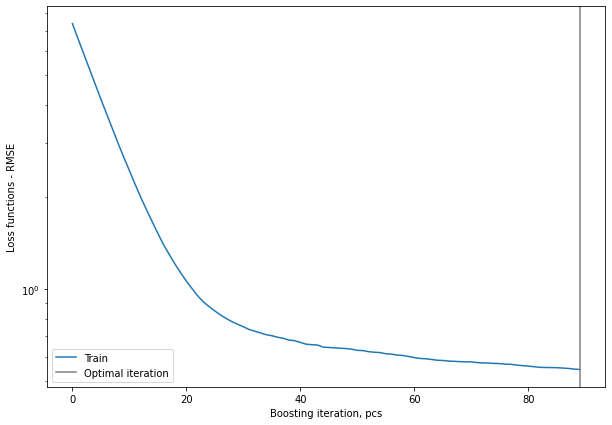

In [32]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [33]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [34]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.02
RMSE: 0.5
Relative RMSE(%):  0.063
MSE: 0.3
R square: 86.1%


In [35]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.569
a1: 0.819
R^2: 0.864
Uncertainty
a0: 1.57+/-0.28
a1: 0.819+/-0.032


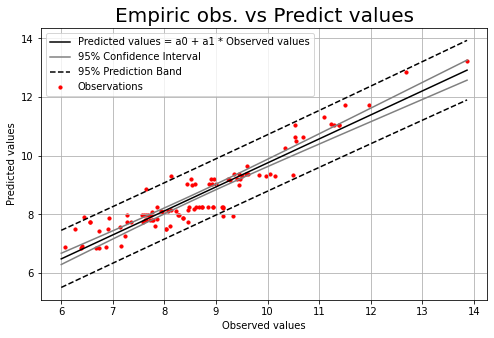

In [36]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

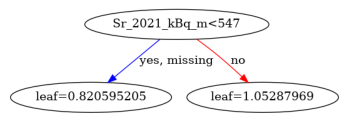

In [37]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

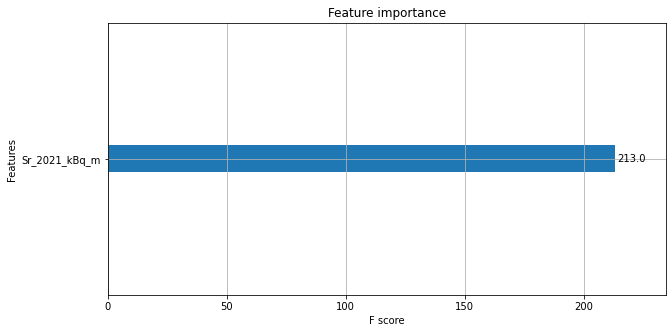

In [39]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

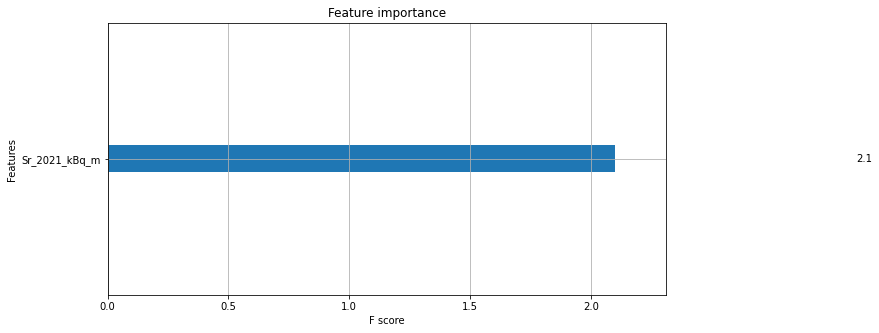

In [40]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

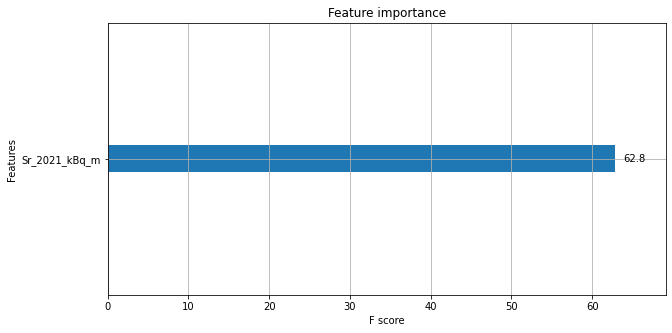

In [41]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [42]:
# Load SHAP`s library
import shap

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


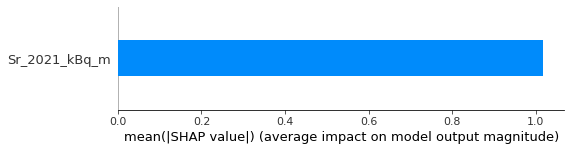

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

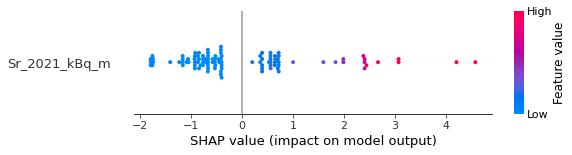

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

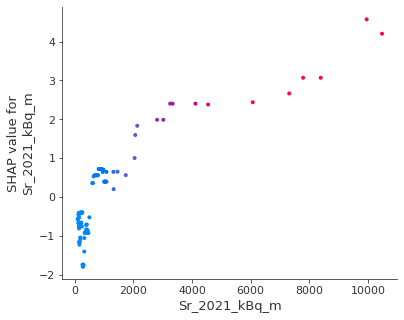

In [46]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/.txt")